In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [3]:
# pip install neuralforecast

In [4]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [5]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [6]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [7]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [8]:
# pip install neuralforecast

In [9]:
# Tiền xử lí dữ liệu

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [10]:
# Apply function to DXG
dxg_dataset["Volume"] = dxg_dataset["Volume"].apply(convert_volume_to_number)
dxg_dataset["Change %"] = dxg_dataset["Change %"].apply(convert_change_to_number)
dxg_dataset['y'] = dxg_dataset['y'].apply(convert_str_to_number)
dxg_dataset['Open'] = dxg_dataset['Open'].apply(convert_str_to_number)
dxg_dataset['High'] = dxg_dataset['High'].apply(convert_str_to_number)
dxg_dataset['Low'] = dxg_dataset['Low'].apply(convert_str_to_number)

dxg_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  18450.0  18300.0  18500.0  18150.0   9350000    0.0110       DXG
1 2024-02-29  18250.0  18150.0  18400.0  18050.0  13440000    0.0111       DXG
2 2024-02-28  18050.0  18300.0  18350.0  18000.0   6990000   -0.0082       DXG
3 2024-02-27  18200.0  18000.0  18300.0  17800.0  11250000    0.0196       DXG
4 2024-02-26  17850.0  18100.0  18150.0  17650.0   9100000   -0.0165       DXG
5 2024-02-23  18150.0  18500.0  18600.0  18000.0  14310000   -0.0189       DXG
6 2024-02-22  18500.0  18850.0  18850.0  18500.0   7650000   -0.0133       DXG
7 2024-02-21  18750.0  19050.0  19050.0  18700.0   7740000   -0.0106       DXG
8 2024-02-20  18950.0  18900.0  19100.0  18700.0  14050000    0.0080       DXG
9 2024-02-19  18800.0  19050.0  19050.0  18700.0   7340000   -0.0079       DXG

In [11]:
# Apply function to QCG
qcg_dataset["Volume"] = qcg_dataset["Volume"].apply(convert_volume_to_number)
qcg_dataset["Change %"] = qcg_dataset["Change %"].apply(convert_change_to_number)
qcg_dataset['y'] = qcg_dataset['y'].apply(convert_str_to_number)
qcg_dataset['Open'] = qcg_dataset['Open'].apply(convert_str_to_number)
qcg_dataset['High'] = qcg_dataset['High'].apply(convert_str_to_number)
qcg_dataset['Low'] = qcg_dataset['Low'].apply(convert_str_to_number)

qcg_dataset.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2024-03-01  9160.0  9170.0  9170.0  9070.0   470600    0.0033       QCG
1 2024-02-29  9130.0  9200.0  9200.0  9070.0   544100   -0.0076       QCG
2 2024-02-28  9200.0  9200.0  9210.0  9040.0   582600    0.0000       QCG
3 2024-02-27  9200.0  8920.0  9300.0  8870.0   800300    0.0268       QCG
4 2024-02-26  8960.0  8990.0  9000.0  8510.0   444100   -0.0033       QCG
5 2024-02-23  8990.0  9180.0  9180.0  8980.0   688000   -0.0207       QCG
6 2024-02-22  9180.0  8800.0  9200.0  8770.0  1160000    0.0479       QCG
7 2024-02-21  8760.0  8800.0  8800.0  8690.0   228400   -0.0023       QCG
8 2024-02-20  8780.0  8800.0  8840.0  8710.0   421700    0.0080       QCG
9 2024-02-19  8710.0  8800.0  8800.0  8620.0   359900   -0.0114       QCG

In [12]:
# Apply function to VHM
vhm_dataset["Volume"] = vhm_dataset["Volume"].apply(convert_volume_to_number)
vhm_dataset["Change %"] = vhm_dataset["Change %"].apply(convert_change_to_number)
vhm_dataset['y'] = vhm_dataset['y'].apply(convert_str_to_number)
vhm_dataset['Open'] = vhm_dataset['Open'].apply(convert_str_to_number)
vhm_dataset['High'] = vhm_dataset['High'].apply(convert_str_to_number)
vhm_dataset['Low'] = vhm_dataset['Low'].apply(convert_str_to_number)

vhm_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  43950.0  43700.0  44200.0  43300.0   6870000    0.0127       VHM
1 2024-02-29  43400.0  44550.0  44700.0  43400.0  11040000   -0.0225       VHM
2 2024-02-28  44400.0  44450.0  44900.0  44000.0   6280000    0.0045       VHM
3 2024-02-27  44200.0  43750.0  44200.0  43300.0   7160000    0.0196       VHM
4 2024-02-26  43350.0  43450.0  43850.0  43100.0   7000000   -0.0023       VHM
5 2024-02-23  43450.0  45000.0  45100.0  43250.0  11750000   -0.0301       VHM
6 2024-02-22  44800.0  45100.0  45450.0  44800.0   6810000   -0.0044       VHM
7 2024-02-21  45000.0  46100.0  46100.0  44800.0   8950000   -0.0249       VHM
8 2024-02-20  46150.0  46000.0  46700.0  45850.0  12930000    0.0132       VHM
9 2024-02-19  45550.0  43000.0  45650.0  42900.0  20160000    0.0667       VHM

In [13]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_dataset)
dxg_train_size = int(dxg_total_size * 0.8)
dxg_test_size = int(dxg_total_size * 0.2)


vhm_total_size = len(vhm_dataset)
vhm_train_size = int(vhm_total_size * 0.8)
vhm_test_size = int(vhm_total_size * 0.2)


qcg_total_size = len(qcg_dataset)
qcg_train_size = int(qcg_total_size * 0.8)
qcg_test_size = int(qcg_total_size * 0.2)


# Split the dataset
dxg_train_data = dxg_dataset.iloc[:dxg_train_size]
dxg_test_data = dxg_dataset.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_dataset.iloc[:vhm_train_size]
vhm_test_data = vhm_dataset.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_dataset.iloc[:qcg_train_size]
qcg_test_data = qcg_dataset.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [14]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [15]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [16]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [17]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [18]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [19]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [20]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [22]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [23]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [24]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [25]:
# len(dxg_pred_test)
# len(dxg_test_data)
# dxg_pred_test

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [27]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 3154.959089564875
MAPE trên tập test của DXG là: 19.746179409859575 %
MAE trên tập test của DXG là: 9953766.856828025


In [28]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 4097.034079556432
MAPE trên tập test của VHM là: 4.752282205806689 %
MAE trên tập test của VHM là: 16785688.249046814


In [29]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 1120.5602681018852
MAPE trên tập test của QCG là: 19.77630935966383 %
MAE trên tập test của QCG là: 1255655.314448569


In [30]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


0 day input [12648.1 12443.  12648.1 12443.  12511.4 12545.5 12477.2 12648.1 12819.
 12750.7 12784.8 12784.8 12887.4 12921.6 13058.3 12682.3 12443.  12306.3
 12237.9 12511.4 12579.7 12648.1 12716.5 12682.3 12477.2 12237.9 12306.3
 12169.5 12101.2 12511.4 12955.8 12955.8 12955.8 13058.3 13160.9 13331.8
 12989.9 12989.9 12921.6 12921.6 13092.5 13195.  12989.9 13126.7 13160.9
 12989.9 12237.9 12784.8 13092.5 14049.6 14425.7 14562.4 14562.4 14699.1
 14630.8 14938.4 15041.  14425.7 15041.  15177.7 15382.8 15348.6 15246.1
 15519.6 15827.2 15929.8 15417.  15314.5 15280.3 15348.6 15246.1 15382.8
 15382.8 14938.4 14733.3 15519.6 15382.8 16032.3 16066.5 16613.5 16545.1
 16818.6 16750.2 16886.9 16921.1 16510.9 17092.  17673.2 17502.2 17809.9]


INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15568.051758     15619.273438    14170.878906   
DXG       2019-06-04  15309.074219     15272.447266    13702.337891   
DXG       2019-06-05  14831.114258     14838.424805    12292.840820   
DXG       2019-06-06  15184.216797     15167.675781    13710.183594   
DXG       2019-06-07  15308.320312     15268.481445    13688.791016   
...              ...           ...              ...             ...   
DXG       2020-02-03  15149.968750     15122.198242    13635.160156   
DXG       2020-02-04  16354.587891     16332.339844    14556.284180   
DXG       2020-02-05  16054.931641     16026.329102    14669.911133   
DXG       2020-02-06  16545.414062     16534.718750    14970.374023   
DXG       2020-02-07  15415.583984     15402.435547    14273.350586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15655.238281     15695.232422    14564.350586   
DXG       2019-06-04  15252.824219     15216.307617    13651.001953   
DXG       2019-06-05  15824.779297     15828.048828    14689.232422   
DXG       2019-06-06  15203.527344     15186.742188    13707.681641   
DXG       2019-06-07  15238.967773     15191.111328    13293.574219   
...              ...           ...              ...             ...   
DXG       2020-02-03  15070.554688     15039.602539    13382.229492   
DXG       2020-02-04  16362.498047     16340.882812    14615.283203   
DXG       2020-02-05  15818.912109     15770.807617    13489.555664   
DXG       2020-02-06  16333.264648     16322.101562    14689.405273   
DXG       2020-02-07  14830.678711     14811.253906    13143.224609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15702.011719     15735.667969    14783.996094   
DXG       2019-06-04  15282.997070     15247.710938    13735.108398   
DXG       2019-06-05  15394.255859     15397.963867    14107.109375   
DXG       2019-06-06  15354.475586     15339.085938    13983.023438   
DXG       2019-06-07  15766.024414     15720.390625    13910.935547   
...              ...           ...              ...             ...   
DXG       2020-02-03  15383.293945     15347.245117    13416.920898   
DXG       2020-02-04  16662.589844     16646.269531    15343.283203   
DXG       2020-02-05  16435.642578     16413.980469    15386.719727   
DXG       2020-02-06  15781.590820     15774.011719    14665.484375   
DXG       2020-02-07  15328.214844     15314.500000    14136.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15322.906250     15365.440430    14162.699219   
DXG       2019-06-04  15235.954102     15196.553711    13507.606445   
DXG       2019-06-05  15228.686523     15232.972656    13741.004883   
DXG       2019-06-06  15325.551758     15310.632812    13996.158203   
DXG       2019-06-07  16161.746094     16123.593750    14610.789062   
...              ...           ...              ...             ...   
DXG       2020-02-03  16018.117188     15977.255859    13789.276367   
DXG       2020-02-04  16438.605469     16416.781250    14674.525391   
DXG       2020-02-05  15736.080078     15703.433594    14155.338867   
DXG       2020-02-06  15496.398438     15488.058594    14268.400391   
DXG       2020-02-07  15113.329102     15097.585938    13745.731445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15475.613281     15516.571289    14358.363281   
DXG       2019-06-04  15527.486328     15489.798828    13874.313477   
DXG       2019-06-05  15341.318359     15345.087891    14032.267578   
DXG       2019-06-06  15302.907227     15286.529297    13843.447266   
DXG       2019-06-07  16109.783203     16061.503906    14147.208984   
...              ...           ...              ...             ...   
DXG       2020-02-03  16605.849609     16575.548828    14952.931641   
DXG       2020-02-04  16592.300781     16582.957031    15836.941406   
DXG       2020-02-05  16129.560547     16109.953125    15180.145508   
DXG       2020-02-06  15569.988281     15562.228516    14427.474609   
DXG       2020-02-07  15306.955078     15279.878906    12954.841797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15382.474609     15433.603516    13987.856445   
DXG       2019-06-04  15461.593750     15424.061523    13815.207031   
DXG       2019-06-05  14989.036133     14994.266602    13172.869141   
DXG       2019-06-06  15384.448242     15368.687500    13980.034180   
DXG       2019-06-07  16270.283203     16223.986328    14388.232422   
...              ...           ...              ...             ...   
DXG       2020-02-03  16082.473633     16040.671875    13802.266602   
DXG       2020-02-04  15354.528320     15324.917969    12961.002930   
DXG       2020-02-05  15775.494141     15751.190430    14598.637695   
DXG       2020-02-06  15360.274414     15351.449219    14060.744141   
DXG       2020-02-07  16400.964844     16378.979492    14491.141602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15880.992188     15925.601562    14664.162109   
DXG       2019-06-04  15183.713867     15121.656250    12461.457031   
DXG       2019-06-05  15401.896484     15406.839844    13685.334961   
DXG       2019-06-06  15351.383789     15336.876953    14058.482422   
DXG       2019-06-07  16384.365234     16334.986328    14377.021484   
...              ...           ...              ...             ...   
DXG       2020-02-03  16572.486328     16541.640625    14890.021484   
DXG       2020-02-04  16396.277344     16385.941406    15560.749023   
DXG       2020-02-05  15568.955078     15545.451172    14430.820312   
DXG       2020-02-06  15600.293945     15592.490234    14451.189453   
DXG       2020-02-07  16341.851562     16319.191406    14373.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16303.458008     16354.078125    14922.668945   
DXG       2019-06-04  16136.915039     16089.521484    14057.894531   
DXG       2019-06-05  15978.788086     15985.779297    13551.053711   
DXG       2019-06-06  15240.458008     15223.267578    13708.446289   
DXG       2019-06-07  16743.582031     16704.132812    15139.817383   
...              ...           ...              ...             ...   
DXG       2020-02-03  16225.498047     16188.106445    14185.892578   
DXG       2020-02-04  15649.614258     15626.142578    13752.487305   
DXG       2020-02-05  15668.168945     15645.611328    14575.859375   
DXG       2020-02-06  15476.982422     15468.299805    14198.439453   
DXG       2020-02-07  16683.425781     16664.857422    15070.395508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16592.863281     16641.214844    15274.012695   
DXG       2019-06-04  16170.340820     16109.009766    13479.941406   
DXG       2019-06-05  16385.130859     16391.085938    14317.347656   
DXG       2019-06-06  15393.693359     15375.921875    13809.927734   
DXG       2019-06-07  16581.593750     16538.761719    14840.435547   
...              ...           ...              ...             ...   
DXG       2020-02-03  16297.738281     16261.264648    14308.178711   
DXG       2020-02-04  16406.607422     16392.378906    15256.535156   
DXG       2020-02-05  15702.038086     15676.214844    14451.661133   
DXG       2020-02-06  15794.698242     15785.748047    14476.974609   
DXG       2020-02-07  16756.535156     16739.455078    15272.836914   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16485.943359     16538.691406    15047.139648   
DXG       2019-06-04  16455.242188     16407.132812    14344.886719   
DXG       2019-06-05  16609.806641     16614.816406    14869.522461   
DXG       2019-06-06  15307.129883     15284.623047    13301.375977   
DXG       2019-06-07  16668.544922     16629.328125    15074.339844   
...              ...           ...              ...             ...   
DXG       2020-02-03  16619.826172     16591.080078    15051.833008   
DXG       2020-02-04  16765.326172     16753.570312    15815.085938   
DXG       2020-02-05  16153.700195     16135.407227    15267.897461   
DXG       2020-02-06  16396.798828     16386.441406    14871.711914   
DXG       2020-02-07  16728.392578     16711.253906    15239.541016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16833.785156     16871.828125    15796.109375   
DXG       2019-06-04  16833.015625     16794.945312    15162.956055   
DXG       2019-06-05  16818.384766     16822.640625    15340.271484   
DXG       2019-06-06  15927.943359     15904.296875    13820.776367   
DXG       2019-06-07  16691.664062     16655.457031    15219.845703   
...              ...           ...              ...             ...   
DXG       2020-02-03  16581.992188     16553.515625    15028.506836   
DXG       2020-02-04  16184.358398     16174.251953    15367.417969   
DXG       2020-02-05  15901.963867     15858.462891    13795.534180   
DXG       2020-02-06  16930.214844     16921.273438    15613.628906   
DXG       2020-02-07  16888.193359     16873.367188    15600.275391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16428.236328     16479.964844    15017.228516   
DXG       2019-06-04  16642.068359     16600.824219    14832.813477   
DXG       2019-06-05  16757.578125     16761.884766    15262.642578   
DXG       2019-06-06  16600.308594     16581.835938    14954.041992   
DXG       2019-06-07  16648.271484     16616.994141    15376.769531   
...              ...           ...              ...             ...   
DXG       2020-02-03  16567.402344     16539.646484    15053.429688   
DXG       2020-02-04  15863.419922     15850.835938    14846.300781   
DXG       2020-02-05  16723.519531     16696.246094    15402.943359   
DXG       2020-02-06  16859.681641     16849.169922    15311.904297   
DXG       2020-02-07  16841.802734     16827.746094    15620.839844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16538.724609     16585.332031    15267.434570   
DXG       2019-06-04  16882.357422     16845.982422    15286.728516   
DXG       2019-06-05  16690.248047     16694.095703    15354.303711   
DXG       2019-06-06  16359.982422     16338.166016    14415.829102   
DXG       2019-06-07  16301.694336     16278.804688    15371.230469   
...              ...           ...              ...             ...   
DXG       2020-02-03  16523.511719     16496.142578    15030.591797   
DXG       2020-02-04  16129.916016     16121.585938    15456.604492   
DXG       2020-02-05  17094.236328     17070.183594    15929.635742   
DXG       2020-02-06  17028.285156     17019.292969    15704.000000   
DXG       2020-02-07  16728.689453     16714.628906    15507.154297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17012.750000     17045.875000    16109.186523   
DXG       2019-06-04  16884.373047     16850.175781    15384.320312   
DXG       2019-06-05  16204.299805     16206.653320    15387.112305   
DXG       2019-06-06  16701.498047     16682.679688    15024.541016   
DXG       2019-06-07  15678.721680     15645.041016    14309.529297   
...              ...           ...              ...             ...   
DXG       2020-02-03  16424.947266     16392.054688    14630.678711   
DXG       2020-02-04  15936.994141     15927.248047    15149.126953   
DXG       2020-02-05  16757.964844     16726.044922    15212.294922   
DXG       2020-02-06  16991.828125     16981.552734    15478.402344   
DXG       2020-02-07  16687.447266     16674.152344    15532.527344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16509.644531     16563.658203    15036.304688   
DXG       2019-06-04  16779.720703     16741.568359    15106.106445   
DXG       2019-06-05  15459.362305     15463.357422    14072.571289   
DXG       2019-06-06  16765.650391     16747.398438    15139.333984   
DXG       2019-06-07  16176.034180     16155.187500    15328.589844   
...              ...           ...              ...             ...   
DXG       2020-02-03  16743.464844     16718.539062    15383.850586   
DXG       2020-02-04  15919.079102     15908.388672    15054.969727   
DXG       2020-02-05  17085.908203     17059.753906    15819.476562   
DXG       2020-02-06  16808.255859     16795.835938    14978.891602   
DXG       2020-02-07  16626.570312     16618.080078    15889.100586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16874.318359     16908.953125    15929.565430   
DXG       2019-06-04  16990.455078     16956.167969    15486.409180   
DXG       2019-06-05  15768.129883     15771.666016    14541.267578   
DXG       2019-06-06  16744.441406     16725.777344    15081.165039   
DXG       2019-06-07  15553.948242     15517.816406    14085.102539   
...              ...           ...              ...             ...   
DXG       2020-02-03  16642.667969     16622.253906    15529.135742   
DXG       2020-02-04  15758.192383     15745.425781    14726.221680   
DXG       2020-02-05  16776.587891     16743.171875    15158.584961   
DXG       2020-02-06  16827.427734     16815.935547    15135.208984   
DXG       2020-02-07  16007.702148     15998.191406    15181.598633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16594.976562     16650.085938    15091.790039   
DXG       2019-06-04  16431.361328     16381.938477    14263.333008   
DXG       2019-06-05  15571.988281     15575.879883    14220.893555   
DXG       2019-06-06  16914.638672     16897.369141    15375.738281   
DXG       2019-06-07  16116.551758     16090.318359    15050.055664   
...              ...           ...              ...             ...   
DXG       2020-02-03  16009.124023     15985.406250    14715.364258   
DXG       2020-02-04  15953.981445     15941.388672    14936.110352   
DXG       2020-02-05  17048.652344     17021.542969    15735.998047   
DXG       2020-02-06  16913.574219     16902.802734    15327.637695   
DXG       2020-02-07  15762.866211     15751.617188    14785.739258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16590.734375     16646.242188    15076.604492   
DXG       2019-06-04  16044.220703     15981.925781    13311.510742   
DXG       2019-06-05  15744.316406     15751.072266    13398.703125   
DXG       2019-06-06  16740.271484     16721.113281    15032.859375   
DXG       2019-06-07  16103.585938     16056.809570    14202.012695   
...              ...           ...              ...             ...   
DXG       2020-02-03  15815.665039     15792.767578    14566.670898   
DXG       2020-02-04  16079.736328     16065.245117    14908.484375   
DXG       2020-02-05  17022.910156     16997.816406    15807.861328   
DXG       2020-02-06  17137.800781     17129.390625    15899.095703   
DXG       2020-02-07  15930.786133     15920.960938    15077.333984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17058.058594     17093.320312    16096.156250   
DXG       2019-06-04  16785.835938     16755.001953    15433.288086   
DXG       2019-06-05  16816.882812     16820.804688    15454.478516   
DXG       2019-06-06  16774.896484     16756.677734    15151.375000   
DXG       2019-06-07  16631.617188     16605.738281    15579.596680   
...              ...           ...              ...             ...   
DXG       2020-02-03  15956.778320     15937.986328    14931.812500   
DXG       2020-02-04  16502.300781     16483.986328    15021.792969   
DXG       2020-02-05  16738.873047     16714.347656    15551.278320   
DXG       2020-02-06  16589.277344     16577.283203    14823.039062   
DXG       2020-02-07  15675.713867     15663.352539    14601.916016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16562.431641     16615.253906    15121.607422   
DXG       2019-06-04  16215.289062     16171.667969    14301.732422   
DXG       2019-06-05  16453.382812     16458.912109    14533.201172   
DXG       2019-06-06  16825.925781     16809.136719    15329.567383   
DXG       2019-06-07  16426.542969     16403.117188    15474.304688   
...              ...           ...              ...             ...   
DXG       2020-02-03  15536.803711     15509.675781    14056.974609   
DXG       2020-02-04  16784.076172     16766.320312    15348.701172   
DXG       2020-02-05  16170.887695     16148.486328    15086.133789   
DXG       2020-02-06  16920.923828     16910.371094    15366.791992   
DXG       2020-02-07  15915.261719     15904.341797    14966.596680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16713.490234     16746.253906    15819.760742   
DXG       2019-06-04  15787.077148     15741.402344    13783.474609   
DXG       2019-06-05  16735.755859     16740.517578    15082.860352   
DXG       2019-06-06  16636.343750     16620.125000    15191.278320   
DXG       2019-06-07  15749.122070     15717.311523    14455.978516   
...              ...           ...              ...             ...   
DXG       2020-02-03  15919.889648     15901.429688    14912.949219   
DXG       2020-02-04  17040.806641     17026.458984    15881.242188   
DXG       2020-02-05  15891.728516     15865.000000    14597.449219   
DXG       2020-02-06  16722.664062     16714.207031    15477.348633   
DXG       2020-02-07  15531.308594     15516.566406    14250.574219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16402.890625     16434.775391    15533.181641   
DXG       2019-06-04  16173.798828     16152.905273    15257.289062   
DXG       2019-06-05  16902.333984     16905.121094    15935.019531   
DXG       2019-06-06  16076.034180     16063.222656    14934.414062   
DXG       2019-06-07  15951.767578     15923.435547    14800.026367   
...              ...           ...              ...             ...   
DXG       2020-02-03  15856.431641     15837.927734    14847.066406   
DXG       2020-02-04  16691.302734     16671.873047    15120.776367   
DXG       2020-02-05  16470.347656     16450.433594    15505.958008   
DXG       2020-02-06  16089.776367     16080.343750    14701.028320   
DXG       2020-02-07  16108.224609     16089.228516    14458.020508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16185.217773     16220.892578    15212.125000   
DXG       2019-06-04  15611.244141     15576.637695    14093.179688   
DXG       2019-06-05  16026.946289     16030.383789    14833.329102   
DXG       2019-06-06  16021.757812     16012.708984    15215.293945   
DXG       2019-06-07  16062.318359     16025.500000    14565.585938   
...              ...           ...              ...             ...   
DXG       2020-02-03  15553.705078     15529.372070    14226.418945   
DXG       2020-02-04  16911.134766     16897.277344    15790.987305   
DXG       2020-02-05  16316.786133     16298.826172    15447.174805   
DXG       2020-02-06  16146.081055     16140.314453    15296.842773   
DXG       2020-02-07  16660.054688     16646.683594    15498.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16326.132812     16347.986328    15730.077148   
DXG       2019-06-04  16051.701172     16031.428711    15162.448242   
DXG       2019-06-05  15948.260742     15950.595703    15137.272461   
DXG       2019-06-06  15820.651367     15811.171875    14976.041992   
DXG       2019-06-07  16295.877930     16272.587891    15349.157227   
...              ...           ...              ...             ...   
DXG       2020-02-03  16166.945312     16151.941406    15348.576172   
DXG       2020-02-04  16802.433594     16791.593750    15926.096680   
DXG       2020-02-05  15833.793945     15813.453125    14848.742188   
DXG       2020-02-06  15572.988281     15564.402344    14308.700195   
DXG       2020-02-07  16149.060547     16130.748047    14558.124023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15878.348633     15900.791992    15266.169922   
DXG       2019-06-04  15794.298828     15774.546875    14927.890625   
DXG       2019-06-05  15702.067383     15704.787109    14757.571289   
DXG       2019-06-06  15804.821289     15795.592773    14982.478516   
DXG       2019-06-07  15897.954102     15866.294922    14610.981445   
...              ...           ...              ...             ...   
DXG       2020-02-03  15930.927734     15902.242188    14366.196289   
DXG       2020-02-04  16133.940430     16122.019531    15170.364258   
DXG       2020-02-05  15858.647461     15838.582031    14887.064453   
DXG       2020-02-06  15914.329102     15909.228516    15163.264648   
DXG       2020-02-07  16589.486328     16578.902344    15670.021484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15813.295898     15840.736328    15064.797852   
DXG       2019-06-04  15648.175781     15620.361328    14428.070312   
DXG       2019-06-05  15678.894531     15681.929688    14625.822266   
DXG       2019-06-06  15858.655273     15849.940430    15082.120117   
DXG       2019-06-07  16220.753906     16192.132812    15057.214844   
...              ...           ...              ...             ...   
DXG       2020-02-03  16397.970703     16376.103516    15205.199219   
DXG       2020-02-04  16206.148438     16199.994141    15708.684570   
DXG       2020-02-05  16226.589844     16209.917969    15419.295898   
DXG       2020-02-06  15895.756836     15890.689453    15149.604492   
DXG       2020-02-07  16504.923828     16492.648438    15438.731445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15990.792969     16014.041016    15356.661133   
DXG       2019-06-04  16105.577148     16087.611328    15317.500000   
DXG       2019-06-05  15761.672852     15764.638672    14732.230469   
DXG       2019-06-06  15797.300781     15787.791992    14949.932617   
DXG       2019-06-07  16475.386719     16449.042969    15404.418945   
...              ...           ...              ...             ...   
DXG       2020-02-03  16412.048828     16391.166016    15273.012695   
DXG       2020-02-04  15672.411133     15660.221680    14687.149414   
DXG       2020-02-05  16286.597656     16269.362305    15452.044922   
DXG       2020-02-06  15886.440430     15880.808594    15057.115234   
DXG       2020-02-07  16543.863281     16532.937500    15594.716797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  15977.835938     16002.089844    15316.249023   
DXG       2019-06-04  15866.301758     15824.351562    14026.065430   
DXG       2019-06-05  15765.131836     15768.189453    14703.657227   
DXG       2019-06-06  15888.704102     15880.099609    15121.905273   
DXG       2019-06-07  16526.441406     16501.828125    15525.852539   
...              ...           ...              ...             ...   
DXG       2020-02-03  16405.347656     16384.242188    15254.130859   
DXG       2020-02-04  16144.815430     16137.613281    15562.620117   
DXG       2020-02-05  16095.879883     16078.572266    15257.765625   
DXG       2020-02-06  16064.862305     16060.479492    15419.467773   
DXG       2020-02-07  16463.033203     16452.832031    15576.875977   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16123.192383     16156.154297    15224.078125   
DXG       2019-06-04  16429.187500     16400.472656    15169.601562   
DXG       2019-06-05  16091.618164     16095.392578    14781.362305   
DXG       2019-06-06  15812.318359     15801.564453    14854.117188   
DXG       2019-06-07  16616.472656     16595.564453    15766.562500   
...              ...           ...              ...             ...   
DXG       2020-02-03  16528.703125     16511.679688    15600.005859   
DXG       2020-02-04  16106.483398     16100.761719    15644.057617   
DXG       2020-02-05  16275.679688     16266.033203    15808.626953   
DXG       2020-02-06  16068.430664     16063.998047    15415.773438   
DXG       2020-02-07  16497.861328     16487.884766    15631.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16599.166016     16619.722656    16038.469727   
DXG       2019-06-04  16595.740234     16574.619141    15669.276367   
DXG       2019-06-05  16511.675781     16514.304688    15599.170898   
DXG       2019-06-06  16063.080078     16050.955078    14982.426758   
DXG       2019-06-07  16506.744141     16485.285156    15634.311523   
...              ...           ...              ...             ...   
DXG       2020-02-03  16457.896484     16440.925781    15532.291992   
DXG       2020-02-04  15857.916016     15847.251953    14995.860352   
DXG       2020-02-05  15974.894531     15959.726562    15240.388672   
DXG       2020-02-06  16056.830078     16051.853516    15324.119141   
DXG       2020-02-07  16608.007812     16599.261719    15848.370117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16458.703125     16488.046875    15658.278320   
DXG       2019-06-04  16462.318359     16439.572266    15464.510742   
DXG       2019-06-05  16530.257812     16532.593750    15719.519531   
DXG       2019-06-06  16420.707031     16410.351562    15497.871094   
DXG       2019-06-07  16637.308594     16620.289062    15945.413086   
...              ...           ...              ...             ...   
DXG       2020-02-03  16542.455078     16528.597656    15786.535156   
DXG       2020-02-04  16490.894531     16486.046875    16099.145508   
DXG       2020-02-05  16309.680664     16300.554688    15867.741211   
DXG       2020-02-06  16416.035156     16411.792969    15791.430664   
DXG       2020-02-07  16659.117188     16651.369141    15986.205078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16590.468750     16613.457031    15963.373047   
DXG       2019-06-04  16628.707031     16611.246094    15862.733398   
DXG       2019-06-05  16590.759766     16592.906250    15844.808594   
DXG       2019-06-06  16389.691406     16379.089844    15445.087891   
DXG       2019-06-07  16559.064453     16542.882812    15901.198242   
...              ...           ...              ...             ...   
DXG       2020-02-03  16553.902344     16541.308594    15867.028320   
DXG       2020-02-04  16381.280273     16376.082031    15961.106445   
DXG       2020-02-05  16227.786133     16211.597656    15443.845703   
DXG       2020-02-06  16600.972656     16596.320312    15915.895508   
DXG       2020-02-07  16690.462891     16683.896484    16120.036133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16654.435547     16675.296875    16085.403320   
DXG       2019-06-04  16641.982422     16626.271484    15952.790039   
DXG       2019-06-05  16709.562500     16711.207031    16139.354492   
DXG       2019-06-06  16585.968750     16577.310547    15814.375000   
DXG       2019-06-07  16526.695312     16508.654297    15793.250000   
...              ...           ...              ...             ...   
DXG       2020-02-03  16510.537109     16497.966797    15824.745117   
DXG       2020-02-04  16168.813477     16160.726562    15515.160156   
DXG       2020-02-05  16494.970703     16478.695312    15706.909180   
DXG       2020-02-06  16504.826172     16499.222656    15679.664062   
DXG       2020-02-07  16603.816406     16596.287109    15949.718750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16526.021484     16552.460938    15804.855469   
DXG       2019-06-04  16540.957031     16520.333984    15636.305664   
DXG       2019-06-05  16535.144531     16537.378906    15759.540039   
DXG       2019-06-06  16563.214844     16554.162109    15756.436523   
DXG       2019-06-07  16602.804688     16590.277344    16093.591797   
...              ...           ...              ...             ...   
DXG       2020-02-03  16439.054688     16423.771484    15605.406250   
DXG       2020-02-04  16508.181641     16504.699219    16226.654297   
DXG       2020-02-05  16842.332031     16833.613281    16420.095703   
DXG       2020-02-06  16761.730469     16757.664062    16162.847656   
DXG       2020-02-07  16718.640625     16713.193359    16245.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16785.398438     16799.148438    16410.318359   
DXG       2019-06-04  16739.111328     16724.580078    16101.681641   
DXG       2019-06-05  16808.742188     16809.957031    16387.472656   
DXG       2019-06-06  16559.382812     16550.218750    15742.691406   
DXG       2019-06-07  16363.280273     16348.396484    15758.179688   
...              ...           ...              ...             ...   
DXG       2020-02-03  16647.296875     16636.523438    16059.580078   
DXG       2020-02-04  16268.277344     16263.780273    15904.872070   
DXG       2020-02-05  16489.392578     16472.488281    15670.851562   
DXG       2020-02-06  16631.648438     16626.466797    15868.713867   
DXG       2020-02-07  16478.191406     16471.316406    15880.832031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16455.736328     16478.894531    15824.040039   
DXG       2019-06-04  16616.376953     16600.656250    15926.722656   
DXG       2019-06-05  16186.215820     16187.810547    15632.960938   
DXG       2019-06-06  16655.718750     16647.935547    15962.212891   
DXG       2019-06-07  16301.484375     16291.821289    15908.693359   
...              ...           ...              ...             ...   
DXG       2020-02-03  16451.910156     16440.023438    15803.374023   
DXG       2020-02-04  16114.935547     16109.046875    15638.959961   
DXG       2020-02-05  16679.410156     16666.078125    16033.820312   
DXG       2020-02-06  16600.007812     16594.757812    15827.230469   
DXG       2020-02-07  16334.362305     16330.195312    15972.388672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16480.832031     16502.000000    15903.461914   
DXG       2019-06-04  16536.906250     16515.300781    15589.190430   
DXG       2019-06-05  15959.433594     15961.488281    15246.239258   
DXG       2019-06-06  16585.251953     16576.875000    15838.833984   
DXG       2019-06-07  16090.175781     16076.640625    15539.997070   
...              ...           ...              ...             ...   
DXG       2020-02-03  16381.320312     16370.257812    15777.971680   
DXG       2020-02-04  16297.567383     16292.877930    15918.556641   
DXG       2020-02-05  16722.015625     16709.496094    16115.807617   
DXG       2020-02-06  16773.513672     16769.669922    16207.581055   
DXG       2020-02-07  16294.244141     16290.315430    15952.999023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16687.871094     16703.234375    16268.847656   
DXG       2019-06-04  16801.609375     16791.066406    16339.082031   
DXG       2019-06-05  16264.736328     16265.939453    15846.638672   
DXG       2019-06-06  16658.851562     16651.082031    15966.393555   
DXG       2019-06-07  16198.606445     16186.031250    15687.413086   
...              ...           ...              ...             ...   
DXG       2020-02-03  16386.908203     16379.566406    15986.341797   
DXG       2020-02-04  16126.613281     16120.572266    15638.324219   
DXG       2020-02-05  16651.482422     16636.998047    15950.081055   
DXG       2020-02-06  16582.892578     16577.800781    15833.308594   
DXG       2020-02-07  16017.066406     16010.618164    15456.987305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16428.964844     16456.908203    15666.679688   
DXG       2019-06-04  16244.858398     16221.641602    15226.390625   
DXG       2019-06-05  15965.625977     15967.762695    15223.841797   
DXG       2019-06-06  16623.281250     16615.667969    15945.005859   
DXG       2019-06-07  16294.028320     16282.421875    15822.225586   
...              ...           ...              ...             ...   
DXG       2020-02-03  16060.967773     16049.107422    15414.063477   
DXG       2020-02-04  16247.047852     16240.621094    15727.522461   
DXG       2020-02-05  16749.498047     16739.292969    16255.304688   
DXG       2020-02-06  16760.402344     16756.621094    16203.729492   
DXG       2020-02-07  16266.697266     16262.720703    15921.212891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16670.605469     16687.166016    16218.901367   
DXG       2019-06-04  16364.933594     16350.115234    15714.818359   
DXG       2019-06-05  16201.614258     16203.513672    15541.851562   
DXG       2019-06-06  16581.730469     16573.914062    15885.250000   
DXG       2019-06-07  16169.549805     16155.269531    15588.958984   
...              ...           ...              ...             ...   
DXG       2020-02-03  16294.166992     16287.085938    15907.937500   
DXG       2020-02-04  16552.234375     16546.972656    16126.880859   
DXG       2020-02-05  16551.169922     16539.261719    15974.564453   
DXG       2020-02-06  16393.283203     16386.722656    15427.250977   
DXG       2020-02-07  16086.504883     16081.167969    15622.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16583.193359     16602.261719    16063.027344   
DXG       2019-06-04  16375.510742     16366.298828    15971.423828   
DXG       2019-06-05  16481.714844     16483.945312    15707.059570   
DXG       2019-06-06  16547.783203     16540.003906    15854.522461   
DXG       2019-06-07  16218.197266     16206.876953    15758.036133   
...              ...           ...              ...             ...   
DXG       2020-02-03  16122.901367     16113.823242    15627.719727   
DXG       2020-02-04  16477.521484     16468.640625    15759.592773   
DXG       2020-02-05  16546.265625     16534.148438    15959.461914   
DXG       2020-02-06  16549.847656     16544.484375    15759.884766   
DXG       2020-02-07  16141.663086     16136.343750    15679.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16444.345703     16463.539062    15920.760742   
DXG       2019-06-04  16001.140625     15981.404297    15135.278320   
DXG       2019-06-05  16418.316406     16420.912109    15517.113281   
DXG       2019-06-06  16533.609375     16526.964844    15941.289062   
DXG       2019-06-07  16202.498047     16186.386719    15547.519531   
...              ...           ...              ...             ...   
DXG       2020-02-03  16090.551758     16080.553711    15545.236328   
DXG       2020-02-04  16652.822266     16645.945312    16096.918945   
DXG       2020-02-05  16541.945312     16534.812500    16196.525391   
DXG       2020-02-06  16694.978516     16692.810547    16375.765625   
DXG       2020-02-07  16221.115234     16216.924805    15856.983398   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16626.855469     16637.390625    16339.486328   
DXG       2019-06-04  16331.790039     16322.574219    15927.512695   
DXG       2019-06-05  16742.265625     16743.625000    16270.551758   
DXG       2019-06-06  16241.871094     16236.125000    15729.674805   
DXG       2019-06-07  16405.937500     16394.183594    15928.042969   
...              ...           ...              ...             ...   
DXG       2020-02-03  16237.866211     16230.832031    15854.193359   
DXG       2020-02-04  16565.992188     16558.171875    15933.821289   
DXG       2020-02-05  16301.547852     16293.167969    15895.723633   
DXG       2020-02-06  16158.361328     16153.472656    15438.602539   
DXG       2020-02-07  15969.553711     15960.835938    15212.232422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16307.688477     16319.109375    15996.129883   
DXG       2019-06-04  16112.530273     16100.285156    15575.406250   
DXG       2019-06-05  16457.472656     16459.101562    15891.029297   
DXG       2019-06-06  16215.846680     16211.765625    15852.205078   
DXG       2019-06-07  16340.186523     16328.210938    15853.351562   
...              ...           ...              ...             ...   
DXG       2020-02-03  16011.072266     15999.838867    15398.332031   
DXG       2020-02-04  16563.519531     16556.667969    16009.546875   
DXG       2020-02-05  16234.755859     16226.533203    15836.615234   
DXG       2020-02-06  16298.109375     16295.488281    15912.143555   
DXG       2020-02-07  16281.519531     16276.289062    15827.030273   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16213.450195     16227.892578    15819.488281   
DXG       2019-06-04  16126.331055     16113.389648    15558.615234   
DXG       2019-06-05  16237.629883     16239.304688    15655.916992   
DXG       2019-06-06  16151.994141     16147.389648    15741.722656   
DXG       2019-06-07  16200.960938     16186.824219    15626.265625   
...              ...           ...              ...             ...   
DXG       2020-02-03  16233.326172     16225.134766    15786.497070   
DXG       2020-02-04  16657.054688     16652.312500    16273.846680   
DXG       2020-02-05  16172.365234     16163.692383    15752.431641   
DXG       2020-02-06  16190.896484     16188.009766    15765.894531   
DXG       2020-02-07  16337.542969     16328.922852    15588.688477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16280.902344     16291.354492    15995.778320   
DXG       2019-06-04  16257.373047     16249.121094    15895.416992   
DXG       2019-06-05  16278.864258     16279.804688    15952.330078   
DXG       2019-06-06  16114.785156     16110.117188    15698.882812   
DXG       2019-06-07  16207.497070     16192.411133    15594.225586   
...              ...           ...              ...             ...   
DXG       2020-02-03  16278.509766     16267.780273    15693.219727   
DXG       2020-02-04  16341.748047     16334.308594    15740.402344   
DXG       2020-02-05  16179.555664     16170.523438    15742.160156   
DXG       2020-02-06  16106.679688     16103.673828    15664.042969   
DXG       2020-02-07  16486.773438     16480.160156    15912.231445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16112.993164     16127.136719    15727.200195   
DXG       2019-06-04  16012.196289     15997.119141    15350.871094   
DXG       2019-06-05  16089.141602     16090.386719    15656.499023   
DXG       2019-06-06  16175.628906     16171.486328    15806.393555   
DXG       2019-06-07  16423.132812     16410.509766    15910.002930   
...              ...           ...              ...             ...   
DXG       2020-02-03  16315.170898     16301.221680    15554.259766   
DXG       2020-02-04  16496.494141     16492.691406    16188.960938   
DXG       2020-02-05  16315.253906     16306.499023    15891.306641   
DXG       2020-02-06  16183.209961     16180.611328    15800.433594   
DXG       2020-02-07  16520.492188     16514.820312    16027.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16176.290039     16191.101562    15772.241211   
DXG       2019-06-04  16203.120117     16190.982422    15670.676758   
DXG       2019-06-05  16047.564453     16049.144531    15498.564453   
DXG       2019-06-06  16094.380859     16089.337891    15644.902344   
DXG       2019-06-07  16435.814453     16421.718750    15862.765625   
...              ...           ...              ...             ...   
DXG       2020-02-03  16490.087891     16479.339844    15903.798828   
DXG       2020-02-04  16375.541992     16372.291016    16112.835938   
DXG       2020-02-05  16293.066406     16283.677734    15838.504883   
DXG       2020-02-06  16105.745117     16102.603516    15643.185547   
DXG       2020-02-07  16438.199219     16431.300781    15839.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16240.432617     16252.525391    15910.568359   
DXG       2019-06-04  16331.347656     16319.109375    15794.499023   
DXG       2019-06-05  16127.723633     16129.127930    15640.430664   
DXG       2019-06-06  16103.043945     16097.652344    15622.741211   
DXG       2019-06-07  16416.986328     16401.126953    15772.215820   
...              ...           ...              ...             ...   
DXG       2020-02-03  16402.353516     16390.187500    15738.650391   
DXG       2020-02-04  16024.471680     16018.324219    15527.551758   
DXG       2020-02-05  16177.732422     16161.988281    15415.432617   
DXG       2020-02-06  16123.250977     16119.940430    15635.848633   
DXG       2020-02-07  16474.537109     16468.101562    15915.637695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16180.542969     16201.957031    15596.435547   
DXG       2019-06-04  16254.684570     16234.210938    15356.598633   
DXG       2019-06-05  16069.664062     16072.002930    15257.799805   
DXG       2019-06-06  16141.113281     16136.207031    15703.903320   
DXG       2019-06-07  16527.216797     16514.925781    16027.574219   
...              ...           ...              ...             ...   
DXG       2020-02-03  16443.029297     16432.193359    15851.877930   
DXG       2020-02-04  16244.251953     16240.427734    15935.115234   
DXG       2020-02-05  16438.613281     16433.490234    16190.457031   
DXG       2020-02-06  16292.240234     16289.884766    15945.494141   
DXG       2020-02-07  16546.548828     16541.902344    16142.988281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16500.978516     16513.562500    16157.704102   
DXG       2019-06-04  16491.310547     16478.839844    15944.292969   
DXG       2019-06-05  16410.728516     16412.316406    15860.121094   
DXG       2019-06-06  16122.631836     16114.900391    15433.645508   
DXG       2019-06-07  16510.271484     16499.109375    16056.542969   
...              ...           ...              ...             ...   
DXG       2020-02-03  16492.386719     16483.394531    16001.976562   
DXG       2020-02-04  16167.761719     16164.081055    15870.291016   
DXG       2020-02-05  16196.412109     16188.164062    15797.023438   
DXG       2020-02-06  16202.150391     16199.138672    15758.769531   
DXG       2020-02-07  16508.828125     16503.738281    16066.456055   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16486.861328     16501.556641    16085.999023   
DXG       2019-06-04  16495.968750     16484.515625    15993.556641   
DXG       2019-06-05  16504.509766     16505.875000    16029.983398   
DXG       2019-06-06  16377.214844     16370.787109    15804.471680   
DXG       2019-06-07  16515.658203     16505.191406    16090.106445   
...              ...           ...              ...             ...   
DXG       2020-02-03  16475.419922     16466.933594    16012.518555   
DXG       2020-02-04  16173.788086     16168.560547    15751.245117   
DXG       2020-02-05  16298.913086     16290.240234    15878.943359   
DXG       2020-02-06  16342.299805     16338.915039    15843.921875   
DXG       2020-02-07  16539.046875     16534.339844    16130.020508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16431.548828     16448.968750    15956.361328   
DXG       2019-06-04  16456.250000     16443.445312    15894.527344   
DXG       2019-06-05  16474.996094     16476.390625    15991.185547   
DXG       2019-06-06  16423.933594     16417.878906    15884.409180   
DXG       2019-06-07  16539.878906     16530.378906    16153.700195   
...              ...           ...              ...             ...   
DXG       2020-02-03  16471.468750     16463.320312    16027.000977   
DXG       2020-02-04  16470.902344     16468.265625    16257.802734   
DXG       2020-02-05  16534.781250     16530.458984    16325.499023   
DXG       2020-02-06  16570.894531     16568.761719    16257.200195   
DXG       2020-02-07  16610.234375     16606.824219    16314.005859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16601.886719     16611.265625    16346.063477   
DXG       2019-06-04  16599.476562     16591.863281    16265.469727   
DXG       2019-06-05  16597.371094     16598.283203    16281.306641   
DXG       2019-06-06  16486.689453     16481.609375    16033.849609   
DXG       2019-06-07  16501.144531     16491.503906    16109.226562   
...              ...           ...              ...             ...   
DXG       2020-02-03  16528.667969     16522.572266    16196.124023   
DXG       2020-02-04  16379.933594     16375.796875    16045.611328   
DXG       2020-02-05  16398.853516     16387.722656    15859.846680   
DXG       2020-02-06  16498.986328     16496.074219    16069.993164   
DXG       2020-02-07  16510.798828     16506.435547    16131.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16488.191406     16501.636719    16121.464844   
DXG       2019-06-04  16510.771484     16500.759766    16071.615234   
DXG       2019-06-05  16530.464844     16531.542969    16156.496094   
DXG       2019-06-06  16561.359375     16557.171875    16188.348633   
DXG       2019-06-07  16552.531250     16546.187500    16294.702148   
...              ...           ...              ...             ...   
DXG       2020-02-03  16423.722656     16415.298828    15964.242188   
DXG       2020-02-04  16416.248047     16413.578125    16200.420898   
DXG       2020-02-05  16549.064453     16542.066406    16210.121094   
DXG       2020-02-06  16569.968750     16567.388672    16190.078125   
DXG       2020-02-07  16581.957031     16578.582031    16288.787109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16545.734375     16556.488281    16252.377930   
DXG       2019-06-04  16543.097656     16532.927734    16097.045898   
DXG       2019-06-05  16503.574219     16504.820312    16071.579102   
DXG       2019-06-06  16497.593750     16492.705078    16061.996094   
DXG       2019-06-07  16355.451172     16347.703125    16040.475586   
...              ...           ...              ...             ...   
DXG       2020-02-03  16541.980469     16536.708984    16254.329102   
DXG       2020-02-04  16422.029297     16420.117188    16267.343750   
DXG       2020-02-05  16571.078125     16563.460938    16202.295898   
DXG       2020-02-06  16590.023438     16587.583984    16230.715820   
DXG       2020-02-07  16526.015625     16522.964844    16260.879883   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16583.970703     16592.134766    16361.282227   
DXG       2019-06-04  16626.417969     16619.906250    16340.769531   
DXG       2019-06-05  16474.525391     16475.033203    16297.824219   
DXG       2019-06-06  16533.742188     16529.283203    16136.283203   
DXG       2019-06-07  16311.879883     16305.703125    16060.724609   
...              ...           ...              ...             ...   
DXG       2020-02-03  16454.589844     16449.355469    16169.055664   
DXG       2020-02-04  16239.652344     16236.052734    15948.716797   
DXG       2020-02-05  16529.154297     16520.679688    16118.721680   
DXG       2020-02-06  16507.724609     16504.738281    16068.157227   
DXG       2020-02-07  16335.253906     16330.297852    15904.701172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16419.636719     16434.445312    16015.709961   
DXG       2019-06-04  16433.687500     16421.953125    15918.878906   
DXG       2019-06-05  16203.647461     16204.751953    15820.443359   
DXG       2019-06-06  16549.406250     16545.558594    16206.541992   
DXG       2019-06-07  16306.268555     16300.312500    16064.075195   
...              ...           ...              ...             ...   
DXG       2020-02-03  16308.906250     16300.955078    15875.187500   
DXG       2020-02-04  16386.068359     16383.738281    16197.666016   
DXG       2020-02-05  16623.808594     16617.910156    16338.154297   
DXG       2020-02-06  16623.769531     16621.783203    16331.161133   
DXG       2020-02-07  16434.298828     16432.535156    16281.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16569.566406     16577.814453    16344.655273   
DXG       2019-06-04  16586.070312     16578.945312    16273.449219   
DXG       2019-06-05  16300.719727     16301.479492    16036.947266   
DXG       2019-06-06  16513.378906     16508.607422    16088.151367   
DXG       2019-06-07  16286.061523     16279.034180    16000.355469   
...              ...           ...              ...             ...   
DXG       2020-02-03  16448.105469     16444.472656    16249.958984   
DXG       2020-02-04  16300.910156     16298.125000    16075.861328   
DXG       2020-02-05  16519.322266     16511.320312    16131.787109   
DXG       2020-02-06  16493.976562     16491.019531    16058.753906   
DXG       2020-02-07  16232.494141     16229.212891    15947.598633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16479.619141     16489.892578    16199.369141   
DXG       2019-06-04  16434.445312     16428.277344    16163.914062   
DXG       2019-06-05  16269.500000     16270.242188    16012.020508   
DXG       2019-06-06  16537.601562     16533.552734    16176.695312   
DXG       2019-06-07  16322.282227     16316.540039    16088.872070   
...              ...           ...              ...             ...   
DXG       2020-02-03  16279.525391     16274.193359    15988.635742   
DXG       2020-02-04  16274.873047     16270.893555    15953.209961   
DXG       2020-02-05  16542.853516     16535.683594    16195.607422   
DXG       2020-02-06  16524.285156     16521.523438    16117.511719   
DXG       2020-02-07  16290.889648     16288.500000    16083.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16416.066406     16430.091797    16033.480469   
DXG       2019-06-04  16232.131836     16219.224609    15665.889648   
DXG       2019-06-05  16203.230469     16204.684570    15698.292969   
DXG       2019-06-06  16516.068359     16512.199219    16171.218750   
DXG       2019-06-07  16292.734375     16285.791016    16010.487305   
...              ...           ...              ...             ...   
DXG       2020-02-03  16270.192383     16264.841797    15978.305664   
DXG       2020-02-04  16485.195312     16482.851562    16295.852539   
DXG       2020-02-05  16618.886719     16614.328125    16398.207031   
DXG       2020-02-06  16616.119141     16614.339844    16354.170898   
DXG       2020-02-07  16312.986328     16310.800781    16123.133789   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16568.144531     16575.460938    16368.549805   
DXG       2019-06-04  16451.880859     16447.304688    16251.106445   
DXG       2019-06-05  16447.876953     16448.630859    16185.650391   
DXG       2019-06-06  16464.019531     16459.296875    16043.160156   
DXG       2019-06-07  16301.956055     16293.448242    15956.053711   
...              ...           ...              ...             ...   
DXG       2020-02-03  16353.438477     16349.800781    16155.031250   
DXG       2020-02-04  16433.125000     16428.230469    16037.465820   
DXG       2020-02-05  16468.294922     16461.390625    16133.943359   
DXG       2020-02-06  16407.867188     16404.623047    15930.020508   
DXG       2020-02-07  16225.070312     16221.838867    15944.418945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16428.568359     16439.847656    16120.914062   
DXG       2019-06-04  16246.680664     16238.332031    15880.493164   
DXG       2019-06-05  16411.736328     16413.017578    15966.522461   
DXG       2019-06-06  16538.912109     16535.839844    16265.081055   
DXG       2019-06-07  16433.337891     16427.695312    16203.906250   
...              ...           ...              ...             ...   
DXG       2020-02-03  16205.512695     16199.025391    15851.661133   
DXG       2020-02-04  16483.154297     16478.900391    16139.254883   
DXG       2020-02-05  16450.623047     16446.941406    16272.433594   
DXG       2020-02-06  16508.138672     16506.750000    16303.778320   
DXG       2020-02-07  16324.633789     16322.352539    16126.456055   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16432.025391     16440.097656    16211.786133   
DXG       2019-06-04  16287.893555     16280.206055    15950.649414   
DXG       2019-06-05  16428.664062     16430.011719    15961.062500   
DXG       2019-06-06  16364.076172     16360.967773    16087.117188   
DXG       2019-06-07  16381.935547     16375.701172    16128.520508   
...              ...           ...              ...             ...   
DXG       2020-02-03  16324.986328     16320.957031    16105.232422   
DXG       2020-02-04  16569.224609     16566.099609    16316.634766   
DXG       2020-02-05  16340.238281     16335.968750    16133.498047   
DXG       2020-02-06  16327.866211     16326.106445    16068.741211   
DXG       2020-02-07  16203.534180     16200.185547    15912.591797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16425.207031     16429.984375    16294.892578   
DXG       2019-06-04  16362.485352     16358.017578    16166.502930   
DXG       2019-06-05  16573.826172     16574.384766    16380.086914   
DXG       2019-06-06  16276.740234     16274.150391    16045.958008   
DXG       2019-06-07  16288.708984     16280.607422    15959.384766   
...              ...           ...              ...             ...   
DXG       2020-02-03  16277.236328     16272.679688    16028.794922   
DXG       2020-02-04  16448.591797     16444.222656    16095.389648   
DXG       2020-02-05  16283.238281     16277.185547    15990.152344   
DXG       2020-02-06  16267.855469     16265.689453    15949.049805   
DXG       2020-02-07  16267.425781     16262.721680    15858.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16248.793945     16259.027344    15969.697266   
DXG       2019-06-04  16209.137695     16200.641602    15836.421875   
DXG       2019-06-05  16360.406250     16361.335938    16037.755859   
DXG       2019-06-06  16304.154297     16301.979492    16110.398438   
DXG       2019-06-07  16373.759766     16366.131836    16063.680664   
...              ...           ...              ...             ...   
DXG       2020-02-03  16218.917969     16212.367188    15861.589844   
DXG       2020-02-04  16539.046875     16536.126953    16303.063477   
DXG       2020-02-05  16378.579102     16375.134766    16211.736328   
DXG       2020-02-06  16363.215820     16362.024414    16187.709961   
DXG       2020-02-07  16471.273438     16468.070312    16192.944336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16385.130859     16391.421875    16213.507812   
DXG       2019-06-04  16325.105469     16319.320312    16071.333984   
DXG       2019-06-05  16310.375000     16311.042969    16078.333008   
DXG       2019-06-06  16251.169922     16248.547852    16017.434570   
DXG       2019-06-07  16409.859375     16401.439453    16067.597656   
...              ...           ...              ...             ...   
DXG       2020-02-03  16404.345703     16400.011719    16167.993164   
DXG       2020-02-04  16505.060547     16502.173828    16271.862305   
DXG       2020-02-05  16293.343750     16288.792969    16072.970703   
DXG       2020-02-06  16241.086914     16239.352539    15985.660156   
DXG       2020-02-07  16417.101562     16413.042969    16064.556641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16324.147461     16329.524414    16177.469727   
DXG       2019-06-04  16310.763672     16306.009766    16102.217773   
DXG       2019-06-05  16300.412109     16300.976562    16104.588867   
DXG       2019-06-06  16274.928711     16272.563477    16064.039062   
DXG       2019-06-07  16438.388672     16431.390625    16153.933594   
...              ...           ...              ...             ...   
DXG       2020-02-03  16380.856445     16374.029297    16008.508789   
DXG       2020-02-04  16346.203125     16342.029297    16008.828125   
DXG       2020-02-05  16269.140625     16263.435547    15992.818359   
DXG       2020-02-06  16251.606445     16249.923828    16003.937500   
DXG       2020-02-07  16449.501953     16445.921875    16138.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16221.920898     16232.074219    15945.003906   
DXG       2019-06-04  16206.651367     16195.879883    15734.158203   
DXG       2019-06-05  16173.392578     16174.527344    15779.595703   
DXG       2019-06-06  16258.033203     16255.507812    16033.084961   
DXG       2019-06-07  16408.109375     16400.574219    16101.769531   
...              ...           ...              ...             ...   
DXG       2020-02-03  16412.066406     16405.349609    16045.661133   
DXG       2020-02-04  16444.527344     16443.066406    16326.499023   
DXG       2020-02-05  16386.011719     16381.894531    16186.737305   
DXG       2020-02-06  16314.041992     16312.730469    16120.832031   
DXG       2020-02-07  16480.986328     16477.859375    16209.255859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16370.809570     16377.027344    16201.194336   
DXG       2019-06-04  16414.037109     16408.820312    16185.266602   
DXG       2019-06-05  16318.372070     16319.079102    16072.821289   
DXG       2019-06-06  16240.547852     16237.621094    15979.637695   
DXG       2019-06-07  16416.744141     16408.533203    16082.986328   
...              ...           ...              ...             ...   
DXG       2020-02-03  16454.085938     16448.601562    16154.974609   
DXG       2020-02-04  16266.267578     16263.849609    16070.847656   
DXG       2020-02-05  16317.111328     16310.791016    16011.135742   
DXG       2020-02-06  16254.816406     16253.018555    15990.046875   
DXG       2020-02-07  16433.394531     16429.966797    16135.661133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16297.951172     16307.196289    16045.753906   
DXG       2019-06-04  16371.370117     16361.272461    15928.474609   
DXG       2019-06-05  16202.346680     16203.535156    15789.907227   
DXG       2019-06-06  16293.299805     16290.841797    16074.244141   
DXG       2019-06-07  16484.882812     16478.273438    16216.297852   
...              ...           ...              ...             ...   
DXG       2020-02-03  16406.406250     16400.125000    16063.844727   
DXG       2020-02-04  16254.122070     16251.106445    16010.350586   
DXG       2020-02-05  16408.074219     16404.490234    16234.451172   
DXG       2020-02-06  16337.293945     16335.843750    16123.824219   
DXG       2020-02-07  16494.460938     16491.804688    16263.613281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16395.886719     16405.708984    16127.936523   
DXG       2019-06-04  16400.060547     16391.169922    16010.096680   
DXG       2019-06-05  16349.552734     16350.636719    15973.675781   
DXG       2019-06-06  16235.016602     16230.949219    15872.588867   
DXG       2019-06-07  16478.574219     16472.562500    16234.199219   
...              ...           ...              ...             ...   
DXG       2020-02-03  16454.578125     16449.484375    16176.703125   
DXG       2020-02-04  16380.919922     16379.390625    16257.445312   
DXG       2020-02-05  16389.027344     16385.996094    16242.152344   
DXG       2020-02-06  16365.101562     16363.843750    16179.735352   
DXG       2020-02-07  16479.066406     16476.523438    16258.065430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16505.769531     16511.250000    16356.210938   
DXG       2019-06-04  16515.007812     16509.912109    16291.493164   
DXG       2019-06-05  16475.105469     16475.773438    16242.361328   
DXG       2019-06-06  16353.824219     16349.843750    15999.025391   
DXG       2019-06-07  16458.451172     16452.460938    16214.841797   
...              ...           ...              ...             ...   
DXG       2020-02-03  16471.500000     16467.070312    16229.873047   
DXG       2020-02-04  16257.702148     16254.744141    16018.582031   
DXG       2020-02-05  16312.234375     16305.788086    16000.098633   
DXG       2020-02-06  16329.654297     16327.303711    15983.617188   
DXG       2020-02-07  16461.371094     16458.441406    16206.718750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16418.052734     16428.292969    16138.727539   
DXG       2019-06-04  16424.167969     16416.828125    16102.303711   
DXG       2019-06-05  16448.908203     16449.707031    16171.396484   
DXG       2019-06-06  16449.701172     16446.537109    16167.714844   
DXG       2019-06-07  16481.654297     16476.236328    16261.494141   
...              ...           ...              ...             ...   
DXG       2020-02-03  16434.343750     16429.310547    16159.820312   
DXG       2020-02-04  16378.832031     16376.837891    16217.588867   
DXG       2020-02-05  16475.285156     16472.152344    16323.536133   
DXG       2020-02-06  16486.207031     16484.912109    16295.361328   
DXG       2020-02-07  16524.576172     16522.718750    16363.280273   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16492.542969     16498.996094    16316.555664   
DXG       2019-06-04  16494.623047     16489.414062    16266.083984   
DXG       2019-06-05  16485.783203     16486.414062    16266.564453   
DXG       2019-06-06  16449.890625     16447.109375    16202.034180   
DXG       2019-06-07  16470.728516     16465.689453    16265.889648   
...              ...           ...              ...             ...   
DXG       2020-02-03  16496.572266     16493.484375    16328.096680   
DXG       2020-02-04  16430.982422     16429.859375    16340.217773   
DXG       2020-02-05  16510.195312     16506.257812    16319.442383   
DXG       2020-02-06  16498.330078     16496.957031    16296.314453   
DXG       2020-02-07  16489.382812     16487.308594    16309.347656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16502.765625     16508.615234    16343.189453   
DXG       2019-06-04  16517.474609     16513.300781    16334.357422   
DXG       2019-06-05  16513.943359     16514.412109    16351.257812   
DXG       2019-06-06  16485.462891     16483.089844    16273.994141   
DXG       2019-06-07  16476.744141     16472.328125    16297.170898   
...              ...           ...              ...             ...   
DXG       2020-02-03  16431.476562     16427.683594    16224.461914   
DXG       2020-02-04  16325.070312     16322.119141    16086.595703   
DXG       2020-02-05  16437.775391     16432.300781    16172.627930   
DXG       2020-02-06  16457.365234     16455.671875    16207.673828   
DXG       2020-02-07  16464.640625     16462.281250    16259.572266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16444.564453     16452.800781    16219.946289   
DXG       2019-06-04  16443.232422     16436.640625    16154.055664   
DXG       2019-06-05  16433.554688     16434.294922    16176.274414   
DXG       2019-06-06  16487.974609     16485.437500    16261.795898   
DXG       2019-06-07  16395.550781     16391.507812    16231.145508   
...              ...           ...              ...             ...   
DXG       2020-02-03  16409.689453     16405.078125    16158.045898   
DXG       2020-02-04  16457.021484     16455.839844    16361.429688   
DXG       2020-02-05  16540.107422     16537.097656    16394.265625   
DXG       2020-02-06  16536.587891     16535.390625    16360.333984   
DXG       2020-02-07  16500.660156     16499.505859    16400.291016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16523.373047     16527.921875    16399.359375   
DXG       2019-06-04  16540.734375     16536.968750    16375.443359   
DXG       2019-06-05  16511.976562     16512.277344    16407.656250   
DXG       2019-06-06  16465.638672     16462.949219    16225.873047   
DXG       2019-06-07  16359.381836     16355.445312    16199.369141   
...              ...           ...              ...             ...   
DXG       2020-02-03  16477.378906     16475.193359    16358.207031   
DXG       2020-02-04  16367.827148     16366.306641    16245.017578   
DXG       2020-02-05  16479.660156     16475.101562    16258.971680   
DXG       2020-02-06  16478.289062     16476.738281    16249.751953   
DXG       2020-02-07  16362.403320     16360.083984    16161.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16461.357422     16467.027344    16306.809570   
DXG       2019-06-04  16466.828125     16462.265625    16266.610352   
DXG       2019-06-05  16375.029297     16375.410156    16242.779297   
DXG       2019-06-06  16499.501953     16497.466797    16318.302734   
DXG       2019-06-07  16368.585938     16365.582031    16246.492188   
...              ...           ...              ...             ...   
DXG       2020-02-03  16368.097656     16364.261719    16158.807617   
DXG       2020-02-04  16349.143555     16347.234375    16194.735352   
DXG       2020-02-05  16493.046875     16488.890625    16291.880859   
DXG       2020-02-06  16490.755859     16489.337891    16281.985352   
DXG       2020-02-07  16376.941406     16375.773438    16275.514648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16436.404297     16443.472656    16243.587891   
DXG       2019-06-04  16408.912109     16401.242188    16072.493164   
DXG       2019-06-05  16282.175781     16282.859375    16045.251953   
DXG       2019-06-06  16477.578125     16475.281250    16272.877930   
DXG       2019-06-07  16359.741211     16356.498047    16227.964844   
...              ...           ...              ...             ...   
DXG       2020-02-03  16400.613281     16398.175781    16267.425781   
DXG       2020-02-04  16430.275391     16429.156250    16339.690430   
DXG       2020-02-05  16527.707031     16524.554688    16374.907227   
DXG       2020-02-06  16519.900391     16518.683594    16340.693359   
DXG       2020-02-07  16366.582031     16365.361328    16260.479492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16506.542969     16510.136719    16408.480469   
DXG       2019-06-04  16487.652344     16485.289062    16383.863281   
DXG       2019-06-05  16403.070312     16403.386719    16293.501953   
DXG       2019-06-06  16459.703125     16457.119141    16229.389648   
DXG       2019-06-07  16336.944336     16332.869141    16171.315430   
...              ...           ...              ...             ...   
DXG       2020-02-03  16387.794922     16385.734375    16275.407227   
DXG       2020-02-04  16313.173828     16310.520508    16098.635742   
DXG       2020-02-05  16449.779297     16445.033203    16219.971680   
DXG       2020-02-06  16453.041016     16451.433594    16216.474609   
DXG       2020-02-07  16306.208008     16304.368164    16146.451172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16401.904297     16409.818359    16186.007812   
DXG       2019-06-04  16333.708008     16328.183594    16091.423828   
DXG       2019-06-05  16300.157227     16300.785156    16082.120117   
DXG       2019-06-06  16493.595703     16491.748047    16328.981445   
DXG       2019-06-07  16375.524414     16372.525391    16253.637695   
...              ...           ...              ...             ...   
DXG       2020-02-03  16305.681641     16302.232422    16117.577148   
DXG       2020-02-04  16424.281250     16422.505859    16280.747070   
DXG       2020-02-05  16534.771484     16532.486328    16424.068359   
DXG       2020-02-06  16522.162109     16521.195312    16379.649414   
DXG       2020-02-07  16371.181641     16370.031250    16271.270508   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16464.964844     16469.832031    16332.250000   
DXG       2019-06-04  16383.784180     16380.165039    16224.970703   
DXG       2019-06-05  16344.198242     16344.812500    16130.685547   
DXG       2019-06-06  16430.712891     16428.326172    16218.032227   
DXG       2019-06-07  16352.570312     16348.297852    16178.851562   
...              ...           ...              ...             ...   
DXG       2020-02-03  16380.811523     16378.738281    16267.638672   
DXG       2020-02-04  16501.044922     16499.472656    16373.947266   
DXG       2020-02-05  16446.755859     16444.125000    16319.459961   
DXG       2020-02-06  16408.039062     16406.710938    16212.437500   
DXG       2020-02-07  16324.993164     16323.523438    16197.459961   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16482.017578     16484.761719    16407.185547   
DXG       2019-06-04  16405.759766     16403.525391    16307.734375   
DXG       2019-06-05  16473.710938     16473.976562    16380.531250   
DXG       2019-06-06  16441.677734     16439.730469    16268.088867   
DXG       2019-06-07  16378.532227     16374.895508    16230.693359   
...              ...           ...              ...             ...   
DXG       2020-02-03  16338.118164     16335.708984    16206.726562   
DXG       2020-02-04  16426.718750     16424.097656    16214.828125   
DXG       2020-02-05  16339.989258     16335.673828    16131.029297   
DXG       2020-02-06  16345.239258     16343.453125    16082.060547   
DXG       2020-02-07  16324.181641     16322.500000    16178.008789   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16339.086914     16346.536133    16135.907227   
DXG       2019-06-04  16301.561523     16296.193359    16066.059570   
DXG       2019-06-05  16367.511719     16368.312500    16089.519531   
DXG       2019-06-06  16390.820312     16389.488281    16272.299805   
DXG       2019-06-07  16401.105469     16398.083984    16278.327148   
...              ...           ...              ...             ...   
DXG       2020-02-03  16316.316406     16313.153320    16143.759766   
DXG       2020-02-04  16491.792969     16490.126953    16357.011719   
DXG       2020-02-05  16426.732422     16424.849609    16335.607422   
DXG       2020-02-06  16435.912109     16435.292969    16344.537109   
DXG       2020-02-07  16382.441406     16381.341797    16286.870117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16425.419922     16428.769531    16334.028320   
DXG       2019-06-04  16387.435547     16384.792969    16271.560547   
DXG       2019-06-05  16476.919922     16477.281250    16350.873047   
DXG       2019-06-06  16323.574219     16321.916992    16175.970703   
DXG       2019-06-07  16359.204102     16353.300781    16119.203125   
...              ...           ...              ...             ...   
DXG       2020-02-03  16381.631836     16379.662109    16274.246094   
DXG       2020-02-04  16463.308594     16461.265625    16298.174805   
DXG       2020-02-05  16348.095703     16344.540039    16175.893555   
DXG       2020-02-06  16339.138672     16337.986328    16169.262695   
DXG       2020-02-07  16314.589844     16311.781250    16070.530273   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16373.734375     16377.102539    16281.809570   
DXG       2019-06-04  16341.927734     16338.904297    16209.272461   
DXG       2019-06-05  16427.812500     16428.125000    16319.040039   
DXG       2019-06-06  16359.299805     16358.130859    16255.091797   
DXG       2019-06-07  16432.052734     16428.474609    16286.632812   
...              ...           ...              ...             ...   
DXG       2020-02-03  16304.307617     16300.423828    16092.446289   
DXG       2020-02-04  16446.281250     16444.128906    16272.286133   
DXG       2020-02-05  16388.662109     16386.683594    16292.846680   
DXG       2020-02-06  16356.353516     16355.583984    16242.988281   
DXG       2020-02-07  16401.757812     16399.732422    16225.950195   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16347.500977     16352.179688    16219.876953   
DXG       2019-06-04  16309.086914     16303.791016    16076.730469   
DXG       2019-06-05  16299.861328     16300.549805    16060.560547   
DXG       2019-06-06  16332.474609     16331.143555    16213.854492   
DXG       2019-06-07  16438.015625     16434.345703    16288.839844   
...              ...           ...              ...             ...   
DXG       2020-02-03  16385.619141     16382.216797    16199.996094   
DXG       2020-02-04  16500.607422     16499.503906    16411.453125   
DXG       2020-02-05  16376.052734     16374.177734    16285.213867   
DXG       2020-02-06  16366.837891     16366.175781    16269.242188   
DXG       2020-02-07  16450.003906     16448.355469    16307.029297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16400.982422     16403.865234    16322.336914   
DXG       2019-06-04  16403.160156     16400.851562    16301.862305   
DXG       2019-06-05  16385.257812     16385.562500    16279.973633   
DXG       2019-06-06  16313.204102     16311.632812    16173.217773   
DXG       2019-06-07  16409.939453     16405.562500    16232.072266   
...              ...           ...              ...             ...   
DXG       2020-02-03  16458.503906     16456.093750    16327.183594   
DXG       2020-02-04  16386.513672     16384.544922    16227.374023   
DXG       2020-02-05  16317.912109     16314.236328    16139.896484   
DXG       2020-02-06  16294.715820     16293.474609    16112.045898   
DXG       2020-02-07  16405.511719     16403.109375    16196.805664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  16303.904297     16309.496094    16151.362305   
DXG       2019-06-04  16309.070312     16303.740234    16075.318359   
DXG       2019-06-05  16288.217773     16288.806641    16084.400391   
DXG       2019-06-06  16338.766602     16337.453125    16221.784180   
DXG       2019-06-07  16424.119141     16419.746094    16246.334961   
...              ...           ...              ...             ...   
DXG       2020-02-03  16387.494141     16383.228516    16154.809570   
DXG       2020-02-04  16383.344727     16381.835938    16261.310547   
DXG       2020-02-05  16401.814453     16399.628906    16296.038086   
DXG       2020-02-06  16371.788086     16371.035156    16260.933594   
DXG       2020-02-07  16470.529297     16469.041016    16341.292969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [31]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day input [62481. 62707. 62481. 62406. 64661. 63910. 61654. 60977. 60902. 59624.
 58270. 59398. 59774. 59774. 59022. 58947. 58722. 58646. 58646. 60075.
 60150. 60150. 61579. 61654. 61804. 60376. 60601. 60601. 60601. 61654.
 62105. 62857. 62782. 63458. 63534. 65037. 65037. 65188. 65263. 65188.
 65413. 64661. 63910. 63910. 63158. 63534. 64361. 66090. 66917. 67970.
 68722. 69173. 67819. 67443. 66917. 67669. 66917. 66917. 67519. 68421.
 70150. 70300. 69549. 70526. 71128. 69624. 69173. 69173. 69323. 69473.
 68797. 70000. 67744. 67594. 66917. 68496. 66316. 69323. 70676. 70902.
 70150. 70676. 70676. 69398. 67669. 68797. 69173. 69022. 68421. 70075.]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69807.039062     69870.703125    68070.617188   
VHM       2019-06-04  68052.382812     67995.773438    65569.023438   
VHM       2019-06-05  69526.664062     69534.890625    66674.421875   
VHM       2019-06-06  68020.453125     67987.804688    65110.429688   
VHM       2019-06-07  69966.679688     69913.296875    67796.437500   
...              ...           ...              ...             ...   
VHM       2020-02-03  69095.843750     69071.375000    67761.679688   
VHM       2020-02-04  69539.414062     69508.625000    67051.187500   
VHM       2020-02-05  68575.070312     68546.531250    67192.789062   
VHM       2020-02-06  68657.460938     68646.109375    66985.804688   
VHM       2020-02-07  68414.992188     68392.375000    66450.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69486.796875     69557.312500    67563.414062   
VHM       2019-06-04  67575.023438     67498.406250    64214.250000   
VHM       2019-06-05  69702.570312     69710.265625    67030.000000   
VHM       2019-06-06  67573.085938     67542.656250    64860.589844   
VHM       2019-06-07  69794.671875     69745.773438    67806.882812   
...              ...           ...              ...             ...   
VHM       2020-02-03  67662.367188     67609.453125    64776.492188   
VHM       2020-02-04  69465.375000     69431.062500    66691.570312   
VHM       2020-02-05  68138.710938     68101.546875    66339.296875   
VHM       2020-02-06  68095.406250     68075.687500    65193.015625   
VHM       2020-02-07  69050.328125     69031.015625    67372.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69304.656250     69355.320312    67922.664062   
VHM       2019-06-04  67916.703125     67830.445312    64132.902344   
VHM       2019-06-05  69832.914062     69840.132812    67325.476562   
VHM       2019-06-06  68004.250000     67981.484375    65975.484375   
VHM       2019-06-07  69231.156250     69179.984375    67150.773438   
...              ...           ...              ...             ...   
VHM       2020-02-03  68203.968750     68163.109375    65975.609375   
VHM       2020-02-04  70387.179688     70367.437500    68792.546875   
VHM       2020-02-05  68313.703125     68275.593750    66468.617188   
VHM       2020-02-06  68918.984375     68900.523438    66200.789062   
VHM       2020-02-07  68792.609375     68755.921875    65605.640625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68530.867188     68605.421875    66496.976562   
VHM       2019-06-04  68153.085938     68076.640625    64799.761719   
VHM       2019-06-05  69864.757812     69871.398438    67561.609375   
VHM       2019-06-06  67724.312500     67700.062500    65564.203125   
VHM       2019-06-07  68093.664062     68009.875000    64687.421875   
...              ...           ...              ...             ...   
VHM       2020-02-03  68509.414062     68454.906250    65535.687500   
VHM       2020-02-04  69231.328125     69201.500000    66819.757812   
VHM       2020-02-05  68540.304688     68501.273438    66650.390625   
VHM       2020-02-06  69524.218750     69512.460938    67791.898438   
VHM       2020-02-07  69744.976562     69717.601562    67366.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68942.398438     68985.625000    67763.085938   
VHM       2019-06-04  68063.445312     67977.320312    64285.433594   
VHM       2019-06-05  69010.796875     69015.375000    67426.554688   
VHM       2019-06-06  67829.921875     67807.203125    65805.843750   
VHM       2019-06-07  69267.250000     69222.820312    67461.117188   
...              ...           ...              ...             ...   
VHM       2020-02-03  69196.078125     69152.507812    66819.726562   
VHM       2020-02-04  69220.757812     69206.046875    68030.812500   
VHM       2020-02-05  68645.585938     68591.140625    66009.429688   
VHM       2020-02-06  68224.265625     68211.203125    66300.960938   
VHM       2020-02-07  69700.289062     69674.187500    67433.437500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  67844.937500     67909.148438    66093.382812   
VHM       2019-06-04  68347.429688     68281.937500    65474.457031   
VHM       2019-06-05  67804.234375     67809.500000    65975.500000   
VHM       2019-06-06  68135.640625     68115.875000    66374.500000   
VHM       2019-06-07  68767.984375     68727.250000    67112.062500   
...              ...           ...              ...             ...   
VHM       2020-02-03  68892.015625     68829.234375    65467.558594   
VHM       2020-02-04  68282.289062     68263.250000    66743.937500   
VHM       2020-02-05  69053.695312     68987.890625    65867.500000   
VHM       2020-02-06  67592.335938     67570.640625    64398.234375   
VHM       2020-02-07  69721.343750     69696.671875    67578.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68213.640625     68273.265625    66587.203125   
VHM       2019-06-04  68209.351562     68131.390625    64789.605469   
VHM       2019-06-05  67707.570312     67713.539062    65634.515625   
VHM       2019-06-06  67625.828125     67600.140625    65336.296875   
VHM       2019-06-07  67499.132812     67422.218750    64372.484375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69394.484375     69343.515625    66614.101562   
VHM       2020-02-04  68487.843750     68471.031250    67130.062500   
VHM       2020-02-05  69368.070312     69302.484375    66191.859375   
VHM       2020-02-06  68877.085938     68860.406250    66421.023438   
VHM       2020-02-07  68916.750000     68885.500000    66202.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68504.765625     68575.312500    66580.742188   
VHM       2019-06-04  68909.382812     68820.609375    65014.761719   
VHM       2019-06-05  67954.828125     67960.437500    66007.359375   
VHM       2019-06-06  67914.054688     67883.625000    65203.000000   
VHM       2019-06-07  68852.703125     68777.953125    65814.218750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69455.187500     69407.687500    66864.445312   
VHM       2020-02-04  67483.820312     67457.578125    65362.394531   
VHM       2020-02-05  70323.078125     70285.250000    68491.257812   
VHM       2020-02-06  69241.101562     69228.687500    67412.820312   
VHM       2020-02-07  69718.148438     69699.843750    68128.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69237.335938     69318.234375    67030.679688   
VHM       2019-06-04  68767.093750     68679.453125    64922.566406   
VHM       2019-06-05  67507.343750     67516.187500    64437.718750   
VHM       2019-06-06  68649.843750     68613.687500    65427.781250   
VHM       2019-06-07  69896.234375     69845.398438    67829.867188   
...              ...           ...              ...             ...   
VHM       2020-02-03  69235.179688     69182.859375    66381.328125   
VHM       2020-02-04  67996.820312     67973.421875    66105.406250   
VHM       2020-02-05  69736.960938     69701.406250    68014.984375   
VHM       2020-02-06  68234.750000     68219.937500    66053.796875   
VHM       2020-02-07  69062.132812     69047.640625    67803.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69659.265625     69732.968750    67648.843750   
VHM       2019-06-04  69507.367188     69441.859375    66634.054688   
VHM       2019-06-05  68776.484375     68783.601562    66307.835938   
VHM       2019-06-06  69221.648438     69188.968750    66309.546875   
VHM       2019-06-07  69571.265625     69521.687500    67556.289062   
...              ...           ...              ...             ...   
VHM       2020-02-03  69725.937500     69690.601562    67798.812500   
VHM       2020-02-04  68283.968750     68263.679688    66643.460938   
VHM       2020-02-05  68319.242188     68263.015625    65596.531250   
VHM       2020-02-06  68697.648438     68678.312500    65849.992188   
VHM       2020-02-07  67670.367188     67646.703125    65614.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69403.929688     69492.156250    66997.187500   
VHM       2019-06-04  69543.601562     69482.406250    66859.171875   
VHM       2019-06-05  69464.398438     69471.593750    66963.390625   
VHM       2019-06-06  69180.140625     69147.406250    66262.312500   
VHM       2019-06-07  69463.539062     69412.617188    67393.492188   
...              ...           ...              ...             ...   
VHM       2020-02-03  69078.078125     69032.375000    66584.500000   
VHM       2020-02-04  68544.484375     68521.718750    66703.546875   
VHM       2020-02-05  69474.171875     69439.242188    67782.601562   
VHM       2020-02-06  70127.078125     70115.851562    68473.929688   
VHM       2020-02-07  68600.312500     68584.156250    67196.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69714.578125     69775.335938    68057.328125   
VHM       2019-06-04  69516.875000     69461.531250    67088.921875   
VHM       2019-06-05  69754.273438     69759.859375    67814.695312   
VHM       2019-06-06  69662.109375     69639.687500    67664.460938   
VHM       2019-06-07  69364.507812     69308.562500    67090.390625   
...              ...           ...              ...             ...   
VHM       2020-02-03  68954.984375     68919.960938    67044.390625   
VHM       2020-02-04  69383.195312     69356.937500    67261.429688   
VHM       2020-02-05  69748.453125     69727.070312    68712.804688   
VHM       2020-02-06  70169.312500     70159.156250    68674.531250   
VHM       2020-02-07  69581.921875     69569.429688    68497.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69840.140625     69895.718750    68324.140625   
VHM       2019-06-04  69833.015625     69784.265625    67694.554688   
VHM       2019-06-05  69807.507812     69812.687500    68008.632812   
VHM       2019-06-06  69770.765625     69750.078125    67926.796875   
VHM       2019-06-07  70181.382812     70151.343750    68960.359375   
...              ...           ...              ...             ...   
VHM       2020-02-03  68689.062500     68659.203125    67059.984375   
VHM       2020-02-04  69824.820312     69802.984375    68060.210938   
VHM       2020-02-05  69096.843750     69074.328125    68006.945312   
VHM       2020-02-06  69536.078125     69520.335938    67218.117188   
VHM       2020-02-07  69385.843750     69363.710938    67463.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69868.367188     69906.484375    68828.664062   
VHM       2019-06-04  69834.734375     69792.281250    67972.484375   
VHM       2019-06-05  69753.664062     69758.484375    68080.742188   
VHM       2019-06-06  69670.695312     69650.984375    67914.460938   
VHM       2019-06-07  68956.898438     68919.437500    67433.976562   
...              ...           ...              ...             ...   
VHM       2020-02-03  68758.718750     68729.734375    67177.578125   
VHM       2020-02-04  70008.882812     69993.390625    68756.539062   
VHM       2020-02-05  68564.296875     68510.640625    65965.960938   
VHM       2020-02-06  69774.078125     69760.835938    67823.601562   
VHM       2020-02-07  69360.250000     69338.781250    67495.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68971.976562     69021.203125    67629.375000   
VHM       2019-06-04  69554.882812     69506.031250    67412.570312   
VHM       2019-06-05  69506.492188     69510.242188    68204.578125   
VHM       2019-06-06  69328.257812     69307.570312    67484.304688   
VHM       2019-06-07  68580.726562     68552.390625    67428.960938   
...              ...           ...              ...             ...   
VHM       2020-02-03  69054.515625     69034.015625    67936.570312   
VHM       2020-02-04  69621.539062     69609.265625    68628.804688   
VHM       2020-02-05  69687.632812     69658.109375    68258.007812   
VHM       2020-02-06  69761.523438     69749.781250    68032.390625   
VHM       2020-02-07  69461.640625     69441.453125    67707.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69046.789062     69091.203125    67835.445312   
VHM       2019-06-04  69584.156250     69553.984375    68260.484375   
VHM       2019-06-05  68749.773438     68752.843750    67684.570312   
VHM       2019-06-06  68995.539062     68968.562500    66592.101562   
VHM       2019-06-07  68360.703125     68322.132812    66792.867188   
...              ...           ...              ...             ...   
VHM       2020-02-03  68534.445312     68507.984375    67091.273438   
VHM       2020-02-04  68466.476562     68446.437500    66845.734375   
VHM       2020-02-05  69725.468750     69694.343750    68218.453125   
VHM       2020-02-06  69773.960938     69763.718750    68265.765625   
VHM       2020-02-07  69649.328125     69635.367188    68436.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69418.796875     69441.765625    68792.296875   
VHM       2019-06-04  68462.859375     68411.296875    66201.492188   
VHM       2019-06-05  68559.218750     68562.031250    67578.257812   
VHM       2019-06-06  69316.453125     69306.140625    68397.367188   
VHM       2019-06-07  68878.156250     68856.203125    67985.640625   
...              ...           ...              ...             ...   
VHM       2020-02-03  68710.046875     68682.687500    67217.960938   
VHM       2020-02-04  69059.710938     69051.289062    68378.765625   
VHM       2020-02-05  69526.351562     69501.218750    68309.515625   
VHM       2020-02-06  69045.320312     69034.132812    67397.609375   
VHM       2020-02-07  68829.859375     68815.523438    67584.609375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68540.304688     68575.804688    67571.960938   
VHM       2019-06-04  68975.445312     68955.195312    68086.882812   
VHM       2019-06-05  68359.742188     68362.828125    67288.093750   
VHM       2019-06-06  68423.601562     68407.218750    66964.210938   
VHM       2019-06-07  68581.382812     68558.187500    67638.351562   
...              ...           ...              ...             ...   
VHM       2020-02-03  69201.742188     69184.632812    68268.679688   
VHM       2020-02-04  68554.148438     68544.125000    67743.367188   
VHM       2020-02-05  69179.382812     69145.734375    67549.875000   
VHM       2020-02-06  68407.492188     68392.875000    66255.343750   
VHM       2020-02-07  68397.195312     68386.812500    67495.640625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68809.023438     68844.109375    67852.140625   
VHM       2019-06-04  68317.023438     68280.093750    66696.992188   
VHM       2019-06-05  68403.523438     68406.671875    67311.406250   
VHM       2019-06-06  68516.765625     68497.078125    66762.257812   
VHM       2019-06-07  68347.554688     68311.093750    66865.359375   
...              ...           ...              ...             ...   
VHM       2020-02-03  68833.132812     68803.734375    67229.890625   
VHM       2020-02-04  68390.687500     68378.015625    67366.679688   
VHM       2020-02-05  69462.226562     69433.671875    68079.742188   
VHM       2020-02-06  69038.117188     69027.968750    67542.414062   
VHM       2020-02-07  68450.828125     68440.570312    67559.195312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68975.984375     69025.281250    67631.296875   
VHM       2019-06-04  68490.585938     68459.515625    67127.992188   
VHM       2019-06-05  68352.320312     68356.140625    67025.054688   
VHM       2019-06-06  69221.828125     69205.609375    67776.375000   
VHM       2019-06-07  69146.179688     69119.203125    68049.406250   
...              ...           ...              ...             ...   
VHM       2020-02-03  68851.523438     68824.406250    67372.695312   
VHM       2020-02-04  68723.796875     68710.445312    67644.117188   
VHM       2020-02-05  69782.578125     69771.359375    69239.398438   
VHM       2020-02-06  69208.109375     69201.515625    68237.218750   
VHM       2020-02-07  68625.171875     68616.687500    67888.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69518.210938     69543.015625    68841.625000   
VHM       2019-06-04  68672.421875     68631.437500    66874.468750   
VHM       2019-06-05  68929.265625     68933.500000    67461.539062   
VHM       2019-06-06  69230.257812     69214.625000    67837.460938   
VHM       2019-06-07  69386.328125     69357.242188    68203.867188   
...              ...           ...              ...             ...   
VHM       2020-02-03  69049.132812     69024.859375    67724.632812   
VHM       2020-02-04  69357.492188     69344.812500    68332.382812   
VHM       2020-02-05  68840.492188     68821.234375    67907.867188   
VHM       2020-02-06  69160.484375     69156.187500    68527.742188   
VHM       2020-02-07  68610.210938     68602.078125    67903.640625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69343.367188     69375.359375    68470.570312   
VHM       2019-06-04  69364.125000     69342.312500    68407.015625   
VHM       2019-06-05  69380.992188     69384.781250    68066.656250   
VHM       2019-06-06  68996.453125     68977.515625    67308.718750   
VHM       2019-06-07  69584.968750     69562.562500    68674.359375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69024.828125     69010.937500    68266.796875   
VHM       2020-02-04  69333.898438     69318.000000    68049.289062   
VHM       2020-02-05  68653.789062     68633.046875    67649.273438   
VHM       2020-02-06  68512.156250     68501.164062    66894.093750   
VHM       2020-02-07  68351.562500     68337.000000    67086.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69019.523438     69068.625000    67680.398438   
VHM       2019-06-04  68588.453125     68542.593750    66576.726562   
VHM       2019-06-05  69267.781250     69271.953125    67823.000000   
VHM       2019-06-06  68880.117188     68859.921875    67080.523438   
VHM       2019-06-07  69043.929688     69009.835938    67658.062500   
...              ...           ...              ...             ...   
VHM       2020-02-03  68350.898438     68321.609375    66753.304688   
VHM       2020-02-04  69344.304688     69329.101562    68115.726562   
VHM       2020-02-05  68967.726562     68952.921875    68250.593750   
VHM       2020-02-06  69280.593750     69275.195312    68486.187500   
VHM       2020-02-07  68997.070312     68988.804688    68278.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69543.195312     69569.765625    68818.320312   
VHM       2019-06-04  68727.375000     68681.125000    66698.304688   
VHM       2019-06-05  69619.789062     69622.562500    68658.656250   
VHM       2019-06-06  68731.671875     68720.632812    67747.281250   
VHM       2019-06-07  69095.773438     69060.468750    67660.695312   
...              ...           ...              ...             ...   
VHM       2020-02-03  68862.984375     68847.570312    68022.039062   
VHM       2020-02-04  69645.296875     69634.187500    68747.257812   
VHM       2020-02-05  68831.617188     68815.937500    68072.437500   
VHM       2020-02-06  69318.648438     69312.843750    68463.632812   
VHM       2020-02-07  69081.664062     69064.515625    67592.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69254.968750     69284.148438    68459.039062   
VHM       2019-06-04  68908.125000     68882.468750    67782.796875   
VHM       2019-06-05  69360.328125     69363.109375    68392.828125   
VHM       2019-06-06  68620.882812     68610.796875    67722.406250   
VHM       2019-06-07  69580.242188     69563.109375    68883.929688   
...              ...           ...              ...             ...   
VHM       2020-02-03  68659.984375     68637.625000    67440.046875   
VHM       2020-02-04  69366.437500     69353.015625    68281.531250   
VHM       2020-02-05  68699.640625     68683.906250    67937.828125   
VHM       2020-02-06  68656.570312     68650.828125    67811.578125   
VHM       2020-02-07  69497.523438     69487.179688    68599.226562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68947.187500     68966.921875    68409.085938   
VHM       2019-06-04  68412.468750     68371.296875    66606.039062   
VHM       2019-06-05  68865.914062     68869.265625    67701.664062   
VHM       2019-06-06  68672.710938     68664.265625    67919.687500   
VHM       2019-06-07  68935.601562     68914.375000    68073.195312   
...              ...           ...              ...             ...   
VHM       2020-02-03  68959.585938     68939.546875    67866.914062   
VHM       2020-02-04  69533.250000     69525.703125    68922.828125   
VHM       2020-02-05  68734.601562     68708.000000    67446.789062   
VHM       2020-02-06  68363.101562     68353.593750    66962.476562   
VHM       2020-02-07  69344.031250     69332.554688    68347.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68573.492188     68601.953125    67797.546875   
VHM       2019-06-04  68961.039062     68944.710938    68244.984375   
VHM       2019-06-05  68628.656250     68631.015625    67811.054688   
VHM       2019-06-06  68580.562500     68571.851562    67804.351562   
VHM       2019-06-07  68446.062500     68424.257812    67559.828125   
...              ...           ...              ...             ...   
VHM       2020-02-03  69138.351562     69118.382812    68049.148438   
VHM       2020-02-04  68930.093750     68922.726562    68334.203125   
VHM       2020-02-05  69365.390625     69345.546875    68404.406250   
VHM       2020-02-06  68875.437500     68865.390625    67396.054688   
VHM       2020-02-07  69210.000000     69196.289062    68018.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68750.093750     68776.312500    68035.257812   
VHM       2019-06-04  68532.335938     68491.484375    66739.984375   
VHM       2019-06-05  68495.882812     68498.382812    67625.046875   
VHM       2019-06-06  68567.320312     68556.937500    67642.296875   
VHM       2019-06-07  68701.757812     68670.132812    67416.195312   
...              ...           ...              ...             ...   
VHM       2020-02-03  69009.351562     68982.890625    67565.742188   
VHM       2020-02-04  68686.687500     68678.507812    68025.726562   
VHM       2020-02-05  69349.085938     69325.164062    68190.781250   
VHM       2020-02-06  69499.906250     69495.546875    68858.703125   
VHM       2020-02-07  69458.718750     69449.812500    68685.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68794.906250     68821.093750    68080.375000   
VHM       2019-06-04  69036.414062     69002.390625    67543.804688   
VHM       2019-06-05  68576.968750     68579.296875    67770.789062   
VHM       2019-06-06  68644.281250     68634.273438    67752.085938   
VHM       2019-06-07  69425.367188     69404.234375    68566.039062   
...              ...           ...              ...             ...   
VHM       2020-02-03  69351.445312     69333.515625    68373.421875   
VHM       2020-02-04  68591.265625     68582.078125    67849.320312   
VHM       2020-02-05  69553.390625     69536.218750    68722.187500   
VHM       2020-02-06  68575.507812     68567.468750    67392.718750   
VHM       2020-02-07  69075.179688     69065.453125    68230.585938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68906.492188     68935.718750    68109.242188   
VHM       2019-06-04  69263.578125     69229.875000    67785.132812   
VHM       2019-06-05  68500.351562     68503.484375    67412.640625   
VHM       2019-06-06  68626.125000     68607.859375    66998.437500   
VHM       2019-06-07  69125.671875     69099.203125    68049.945312   
...              ...           ...              ...             ...   
VHM       2020-02-03  69152.171875     69129.609375    67921.523438   
VHM       2020-02-04  68531.406250     68520.757812    67671.343750   
VHM       2020-02-05  69386.890625     69361.015625    68134.265625   
VHM       2020-02-06  68801.632812     68794.578125    67764.554688   
VHM       2020-02-07  68758.226562     68751.445312    68169.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69165.960938     69194.953125    68375.093750   
VHM       2019-06-04  69145.945312     69118.218750    67929.812500   
VHM       2019-06-05  68787.218750     68790.078125    67792.554688   
VHM       2019-06-06  69081.960938     69068.234375    67859.148438   
VHM       2019-06-07  68961.101562     68932.906250    67814.757812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69283.828125     69266.125000    68317.937500   
VHM       2020-02-04  68845.000000     68838.703125    68336.234375   
VHM       2020-02-05  69252.281250     69232.226562    68281.375000   
VHM       2020-02-06  69169.054688     69163.328125    68324.156250   
VHM       2020-02-07  68524.375000     68514.750000    67687.601562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69237.406250     69272.578125    68278.039062   
VHM       2019-06-04  69264.257812     69239.890625    68195.554688   
VHM       2019-06-05  69172.304688     69175.375000    68103.109375   
VHM       2019-06-06  69180.273438     69168.484375    68129.453125   
VHM       2019-06-07  69306.289062     69284.906250    68436.812500   
...              ...           ...              ...             ...   
VHM       2020-02-03  69296.242188     69281.625000    68499.398438   
VHM       2020-02-04  68601.906250     68590.984375    67718.695312   
VHM       2020-02-05  69446.250000     69438.406250    69066.789062   
VHM       2020-02-06  69488.132812     69484.367188    68932.390625   
VHM       2020-02-07  69119.343750     69113.648438    68624.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69436.867188     69459.390625    68822.195312   
VHM       2019-06-04  69313.117188     69291.125000    68348.289062   
VHM       2019-06-05  69352.734375     69355.101562    68533.140625   
VHM       2019-06-06  69345.093750     69335.492188    68489.156250   
VHM       2019-06-07  69381.382812     69361.937500    68591.031250   
...              ...           ...              ...             ...   
VHM       2020-02-03  69117.265625     69102.367188    68304.101562   
VHM       2020-02-04  69130.664062     69119.281250    68210.710938   
VHM       2020-02-05  68837.359375     68822.031250    68095.023438   
VHM       2020-02-06  69308.320312     69300.585938    68169.781250   
VHM       2020-02-07  69154.796875     69149.929688    68731.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69290.867188     69318.812500    68528.718750   
VHM       2019-06-04  69323.085938     69301.171875    68361.976562   
VHM       2019-06-05  69338.617188     69341.109375    68473.414062   
VHM       2019-06-06  69405.328125     69396.867188    68651.257812   
VHM       2019-06-07  69458.671875     69445.281250    68914.406250   
...              ...           ...              ...             ...   
VHM       2020-02-03  68932.421875     68920.195312    68265.453125   
VHM       2020-02-04  69479.187500     69470.976562    68815.859375   
VHM       2020-02-05  68994.132812     68981.234375    68369.593750   
VHM       2020-02-06  69218.335938     69211.546875    68217.898438   
VHM       2020-02-07  68865.320312     68853.250000    67817.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69389.585938     69411.140625    68801.585938   
VHM       2019-06-04  69377.156250     69356.773438    68482.976562   
VHM       2019-06-05  69383.218750     69385.445312    68609.093750   
VHM       2019-06-06  69251.906250     69241.695312    68342.437500   
VHM       2019-06-07  68925.187500     68901.531250    67963.640625   
...              ...           ...              ...             ...   
VHM       2020-02-03  68945.546875     68932.484375    68233.078125   
VHM       2020-02-04  69414.718750     69407.304688    68815.195312   
VHM       2020-02-05  69062.250000     69040.265625    67998.164062   
VHM       2020-02-06  69528.320312     69524.093750    68904.757812   
VHM       2020-02-07  69244.414062     69235.718750    68488.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69356.929688     69377.640625    68792.007812   
VHM       2019-06-04  69380.875000     69361.062500    68511.695312   
VHM       2019-06-05  69448.195312     69449.875000    68866.375000   
VHM       2019-06-06  69333.867188     69324.906250    68536.750000   
VHM       2019-06-07  69196.234375     69181.507812    68597.593750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69081.953125     69072.304688    68555.882812   
VHM       2020-02-04  69275.375000     69266.312500    68542.171875   
VHM       2020-02-05  69519.859375     69508.796875    68984.523438   
VHM       2020-02-06  69373.804688     69368.710938    68622.375000   
VHM       2020-02-07  69298.046875     69289.046875    68516.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69284.273438     69304.218750    68740.156250   
VHM       2019-06-04  69272.679688     69250.609375    68304.320312   
VHM       2019-06-05  69050.968750     69052.960938    68362.632812   
VHM       2019-06-06  69340.257812     69332.609375    68658.757812   
VHM       2019-06-07  69192.210938     69183.343750    68831.804688   
...              ...           ...              ...             ...   
VHM       2020-02-03  68804.140625     68789.742188    68018.539062   
VHM       2020-02-04  69423.242188     69417.031250    68921.812500   
VHM       2020-02-05  69401.578125     69389.625000    68822.390625   
VHM       2020-02-06  69358.820312     69353.937500    68638.710938   
VHM       2020-02-07  69416.109375     69410.906250    68964.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69192.921875     69203.046875    68916.679688   
VHM       2019-06-04  69332.539062     69320.234375    68792.867188   
VHM       2019-06-05  68938.273438     68939.421875    68536.804688   
VHM       2019-06-06  69068.000000     69062.828125    68607.140625   
VHM       2019-06-07  68863.148438     68851.375000    68384.859375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69076.804688     69069.093750    68656.242188   
VHM       2020-02-04  69257.382812     69254.078125    68990.328125   
VHM       2020-02-05  69072.671875     69053.484375    68143.742188   
VHM       2020-02-06  69081.265625     69074.500000    68086.242188   
VHM       2020-02-07  68963.726562     68954.656250    68175.601562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68712.273438     68737.242188    68030.992188   
VHM       2019-06-04  68963.523438     68952.921875    68498.414062   
VHM       2019-06-05  68834.289062     68835.515625    68406.312500   
VHM       2019-06-06  68728.328125     68719.984375    67984.820312   
VHM       2019-06-07  68793.390625     68780.210938    68257.640625   
...              ...           ...              ...             ...   
VHM       2020-02-03  68912.968750     68902.859375    68361.296875   
VHM       2020-02-04  68811.585938     68806.453125    68396.570312   
VHM       2020-02-05  69308.320312     69297.343750    68777.117188   
VHM       2020-02-06  69436.703125     69433.406250    68951.304688   
VHM       2020-02-07  69012.460938     69007.945312    68619.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69064.382812     69079.539062    68650.906250   
VHM       2019-06-04  68736.937500     68718.140625    67912.718750   
VHM       2019-06-05  68812.382812     68813.726562    68346.054688   
VHM       2019-06-06  68907.710938     68900.304688    68247.156250   
VHM       2019-06-07  68861.476562     68844.140625    68156.726562   
...              ...           ...              ...             ...   
VHM       2020-02-03  68864.117188     68848.281250    67999.898438   
VHM       2020-02-04  68824.328125     68818.796875    68377.085938   
VHM       2020-02-05  69334.625000     69324.156250    68827.828125   
VHM       2020-02-06  69135.351562     69132.539062    68720.875000   
VHM       2020-02-07  69009.101562     69005.226562    68672.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69255.554688     69268.046875    68914.867188   
VHM       2019-06-04  68979.179688     68968.523438    68511.726562   
VHM       2019-06-05  68804.968750     68806.406250    68306.429688   
VHM       2019-06-06  69144.710938     69138.898438    68626.859375   
VHM       2019-06-07  69275.992188     69266.007812    68870.140625   
...              ...           ...              ...             ...   
VHM       2020-02-03  69209.640625     69199.937500    68680.468750   
VHM       2020-02-04  68855.914062     68850.000000    68378.710938   
VHM       2020-02-05  69246.640625     69237.093750    68784.375000   
VHM       2020-02-06  68715.789062     68709.671875    67816.062500   
VHM       2020-02-07  68729.484375     68723.703125    68227.281250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68970.367188     68989.757812    68441.476562   
VHM       2019-06-04  68783.992188     68759.468750    67708.570312   
VHM       2019-06-05  68750.179688     68752.343750    67993.554688   
VHM       2019-06-06  68867.140625     68855.562500    67834.593750   
VHM       2019-06-07  69131.742188     69117.367188    68547.132812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69060.054688     69046.835938    68339.195312   
VHM       2020-02-04  69005.171875     69001.234375    68686.921875   
VHM       2020-02-05  68925.343750     68908.109375    68090.625000   
VHM       2020-02-06  69099.578125     69096.601562    68661.296875   
VHM       2020-02-07  68868.242188     68864.156250    68513.070312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69074.593750     69091.531250    68612.492188   
VHM       2019-06-04  69057.507812     69045.007812    68509.179688   
VHM       2019-06-05  69151.609375     69153.265625    68574.281250   
VHM       2019-06-06  69046.968750     69038.148438    68260.898438   
VHM       2019-06-07  69022.414062     69004.367188    68288.531250   
...              ...           ...              ...             ...   
VHM       2020-02-03  69116.890625     69110.265625    68755.289062   
VHM       2020-02-04  69009.679688     69002.265625    68410.210938   
VHM       2020-02-05  69147.359375     69138.187500    68703.593750   
VHM       2020-02-06  69156.015625     69150.828125    68393.421875   
VHM       2020-02-07  68782.242188     68776.843750    68314.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69176.328125     69195.609375    68650.359375   
VHM       2019-06-04  68872.421875     68852.742188    68008.742188   
VHM       2019-06-05  69232.445312     69234.195312    68627.671875   
VHM       2019-06-06  69239.054688     69232.812500    68682.265625   
VHM       2019-06-07  69186.187500     69171.093750    68572.625000   
...              ...           ...              ...             ...   
VHM       2020-02-03  68792.718750     68781.046875    68155.843750   
VHM       2020-02-04  69131.117188     69123.125000    68484.765625   
VHM       2020-02-05  69183.578125     69178.656250    68945.234375   
VHM       2020-02-06  69288.000000     69286.046875    69001.234375   
VHM       2020-02-07  69024.609375     69021.078125    68717.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69335.632812     69348.406250    68987.062500   
VHM       2019-06-04  68934.789062     68911.843750    67928.367188   
VHM       2019-06-05  69286.953125     69288.437500    68772.007812   
VHM       2019-06-06  69134.531250     69129.671875    68701.359375   
VHM       2019-06-07  69328.750000     69318.031250    68892.976562   
...              ...           ...              ...             ...   
VHM       2020-02-03  68965.679688     68957.843750    68537.867188   
VHM       2020-02-04  69353.328125     69348.304688    68946.851562   
VHM       2020-02-05  68941.804688     68933.726562    68550.585938   
VHM       2020-02-06  69031.578125     69029.218750    68685.195312   
VHM       2020-02-07  68912.460938     68903.859375    68165.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69184.796875     69197.890625    68827.562500   
VHM       2019-06-04  69172.406250     69163.679688    68789.421875   
VHM       2019-06-05  69228.578125     69230.109375    68700.039062   
VHM       2019-06-06  68796.867188     68790.640625    68242.257812   
VHM       2019-06-07  69191.562500     69183.109375    68848.140625   
...              ...           ...              ...             ...   
VHM       2020-02-03  68983.734375     68976.453125    68586.429688   
VHM       2020-02-04  69242.679688     69236.765625    68765.351562   
VHM       2020-02-05  68888.906250     68880.304688    68472.429688   
VHM       2020-02-06  68822.734375     68818.953125    68265.492188   
VHM       2020-02-07  69151.335938     69144.609375    68567.710938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68993.968750     69008.968750    68584.867188   
VHM       2019-06-04  68860.226562     68843.539062    68128.085938   
VHM       2019-06-05  69226.539062     69228.125000    68672.539062   
VHM       2019-06-06  68883.812500     68878.984375    68453.390625   
VHM       2019-06-07  68851.140625     68835.296875    68206.906250   
...              ...           ...              ...             ...   
VHM       2020-02-03  68878.820312     68866.015625    68180.398438   
VHM       2020-02-04  69245.789062     69239.890625    68768.718750   
VHM       2020-02-05  69037.031250     69028.687500    68632.562500   
VHM       2020-02-06  68966.562500     68963.078125    68454.046875   
VHM       2020-02-07  69250.007812     69244.703125    68789.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69082.781250     69094.421875    68765.398438   
VHM       2019-06-04  68896.062500     68881.265625    68246.562500   
VHM       2019-06-05  69203.960938     69204.968750    68852.046875   
VHM       2019-06-06  68886.171875     68881.953125    68510.710938   
VHM       2019-06-07  69010.328125     68997.718750    68497.578125   
...              ...           ...              ...             ...   
VHM       2020-02-03  69153.445312     69145.718750    68731.796875   
VHM       2020-02-04  69342.054688     69338.773438    69076.937500   
VHM       2020-02-05  69299.406250     69293.468750    69011.664062   
VHM       2020-02-06  69211.039062     69207.828125    68737.835938   
VHM       2020-02-07  69217.554688     69211.500000    68692.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69045.867188     69053.882812    68827.250000   
VHM       2019-06-04  69031.234375     69021.164062    68589.671875   
VHM       2019-06-05  68927.718750     68928.710938    68585.382812   
VHM       2019-06-06  68897.062500     68893.281250    68559.117188   
VHM       2019-06-07  69152.703125     69142.953125    68756.585938   
...              ...           ...              ...             ...   
VHM       2020-02-03  69118.960938     69108.562500    68551.335938   
VHM       2020-02-04  68935.976562     68932.078125    68621.062500   
VHM       2020-02-05  69040.210938     69025.507812    68328.742188   
VHM       2020-02-06  69039.585938     69036.687500    68612.460938   
VHM       2020-02-07  69257.429688     69253.046875    68876.320312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68841.234375     68853.812500    68498.226562   
VHM       2019-06-04  68914.226562     68894.921875    68067.757812   
VHM       2019-06-05  68851.039062     68852.078125    68490.906250   
VHM       2019-06-06  68875.351562     68871.218750    68507.515625   
VHM       2019-06-07  69123.148438     69114.234375    68760.421875   
...              ...           ...              ...             ...   
VHM       2020-02-03  69185.390625     69176.703125    68711.421875   
VHM       2020-02-04  68897.679688     68893.937500    68594.750000   
VHM       2020-02-05  69184.789062     69174.375000    68680.523438   
VHM       2020-02-06  68796.679688     68791.718750    68066.609375   
VHM       2020-02-07  69100.992188     69095.968750    68664.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68989.062500     69003.593750    68592.937500   
VHM       2019-06-04  69050.578125     69034.375000    68339.867188   
VHM       2019-06-05  68858.148438     68859.445312    68407.093750   
VHM       2019-06-06  68809.617188     68802.812500    68203.218750   
VHM       2019-06-07  68876.117188     68857.406250    68115.343750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69110.937500     69100.250000    68527.546875   
VHM       2020-02-04  68878.546875     68874.632812    68562.804688   
VHM       2020-02-05  69356.921875     69349.875000    69015.796875   
VHM       2020-02-06  69162.812500     69160.375000    68802.046875   
VHM       2020-02-07  68933.757812     68930.054688    68611.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69210.562500     69219.171875    68975.546875   
VHM       2019-06-04  69150.468750     69137.359375    68575.007812   
VHM       2019-06-05  68925.195312     68926.187500    68580.695312   
VHM       2019-06-06  69033.531250     69027.796875    68523.148438   
VHM       2019-06-07  69107.437500     69095.164062    68608.468750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69172.078125     69163.562500    68707.937500   
VHM       2020-02-04  68902.242188     68898.750000    68620.531250   
VHM       2020-02-05  69147.914062     69138.671875    68700.750000   
VHM       2020-02-06  69219.093750     69217.296875    68953.468750   
VHM       2020-02-07  68977.703125     68974.679688    68714.726562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69113.601562     69131.476562    68626.062500   
VHM       2019-06-04  69126.789062     69113.703125    68552.539062   
VHM       2019-06-05  68917.718750     68919.375000    68343.898438   
VHM       2019-06-06  69121.789062     69115.859375    68592.445312   
VHM       2019-06-07  69299.687500     69292.414062    69003.929688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69210.609375     69204.203125    68861.156250   
VHM       2020-02-04  68894.804688     68890.476562    68544.843750   
VHM       2020-02-05  69167.460938     69162.640625    68934.039062   
VHM       2020-02-06  68991.726562     68988.515625    68519.164062   
VHM       2020-02-07  69114.765625     69112.601562    68926.585938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69216.351562     69227.875000    68901.921875   
VHM       2019-06-04  69218.296875     69208.632812    68794.406250   
VHM       2019-06-05  69154.437500     69155.640625    68734.523438   
VHM       2019-06-06  69174.945312     69169.804688    68717.390625   
VHM       2019-06-07  69160.648438     69152.359375    68824.000000   
...              ...           ...              ...             ...   
VHM       2020-02-03  69111.148438     69104.359375    68740.835938   
VHM       2020-02-04  69042.718750     69038.359375    68689.664062   
VHM       2020-02-05  69096.640625     69086.507812    68605.875000   
VHM       2020-02-06  69141.187500     69138.296875    68714.171875   
VHM       2020-02-07  68978.648438     68975.968750    68745.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69187.679688     69201.257812    68817.437500   
VHM       2019-06-04  69179.710938     69168.843750    68703.062500   
VHM       2019-06-05  69214.187500     69215.312500    68823.828125   
VHM       2019-06-06  69253.875000     69249.898438    68899.640625   
VHM       2019-06-07  69112.726562     69102.062500    68679.203125   
...              ...           ...              ...             ...   
VHM       2020-02-03  69021.015625     69013.273438    68598.585938   
VHM       2020-02-04  69270.046875     69266.640625    68995.398438   
VHM       2020-02-05  69255.960938     69250.890625    69010.148438   
VHM       2020-02-06  69268.625000     69266.382812    68939.125000   
VHM       2020-02-07  68958.445312     68953.968750    68569.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69230.757812     69242.187500    68919.195312   
VHM       2019-06-04  69200.203125     69189.453125    68729.234375   
VHM       2019-06-05  69218.062500     69219.171875    68833.828125   
VHM       2019-06-06  69187.226562     69182.539062    68769.398438   
VHM       2019-06-07  69211.546875     69202.546875    68845.476562   
...              ...           ...              ...             ...   
VHM       2020-02-03  69088.140625     69082.398438    68774.640625   
VHM       2020-02-04  69235.867188     69231.843750    68910.960938   
VHM       2020-02-05  69216.898438     69213.210938    69038.484375   
VHM       2020-02-06  69306.523438     69304.968750    69078.773438   
VHM       2020-02-07  69244.031250     69241.828125    69052.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69300.906250     69308.437500    69095.171875   
VHM       2019-06-04  69303.390625     69296.132812    68984.562500   
VHM       2019-06-05  69282.750000     69283.578125    68996.335938   
VHM       2019-06-06  69241.921875     69237.945312    68887.515625   
VHM       2019-06-07  69293.585938     69287.968750    69064.937500   
...              ...           ...              ...             ...   
VHM       2020-02-03  69097.078125     69092.406250    68842.023438   
VHM       2020-02-04  69196.914062     69192.195312    68815.523438   
VHM       2020-02-05  68965.476562     68956.937500    68551.960938   
VHM       2020-02-06  69085.539062     69082.218750    68595.820312   
VHM       2020-02-07  69130.906250     69126.812500    68775.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69109.570312     69120.375000    68814.835938   
VHM       2019-06-04  69164.460938     69154.773438    68739.296875   
VHM       2019-06-05  69152.453125     69153.531250    68776.562500   
VHM       2019-06-06  69228.195312     69224.914062    68936.054688   
VHM       2019-06-07  69084.484375     69079.640625    68887.304688   
...              ...           ...              ...             ...   
VHM       2020-02-03  68975.343750     68968.203125    68585.851562   
VHM       2020-02-04  69295.265625     69292.484375    69069.812500   
VHM       2020-02-05  69168.476562     69162.062500    68858.093750   
VHM       2020-02-06  69191.585938     69189.171875    68836.164062   
VHM       2020-02-07  69149.890625     69146.156250    68826.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69118.093750     69124.945312    68931.218750   
VHM       2019-06-04  69180.593750     69171.710938    68790.710938   
VHM       2019-06-05  69169.953125     69170.546875    68958.835938   
VHM       2019-06-06  69044.726562     69039.890625    68613.265625   
VHM       2019-06-07  68925.304688     68916.812500    68580.218750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69108.617188     69104.710938    68895.460938   
VHM       2020-02-04  69219.726562     69217.601562    69047.687500   
VHM       2020-02-05  69198.304688     69190.453125    68818.546875   
VHM       2020-02-06  69292.828125     69291.085938    69035.953125   
VHM       2020-02-07  69106.460938     69101.765625    68698.664062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69076.546875     69084.601562    68856.718750   
VHM       2019-06-04  69139.703125     69134.921875    68929.664062   
VHM       2019-06-05  69058.890625     69059.398438    68881.906250   
VHM       2019-06-06  69053.046875     69049.640625    68749.179688   
VHM       2019-06-07  69060.062500     69053.945312    68811.437500   
...              ...           ...              ...             ...   
VHM       2020-02-03  69023.968750     69019.562500    68783.578125   
VHM       2020-02-04  68923.960938     68919.734375    68582.437500   
VHM       2020-02-05  69269.015625     69263.984375    69025.453125   
VHM       2020-02-06  69138.046875     69136.218750    68868.914062   
VHM       2020-02-07  69200.968750     69197.968750    68941.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69095.179688     69103.156250    68877.726562   
VHM       2019-06-04  68934.320312     68922.984375    68436.953125   
VHM       2019-06-05  68945.468750     68946.132812    68716.492188   
VHM       2019-06-06  69105.750000     69103.859375    68936.726562   
VHM       2019-06-07  69129.023438     69125.078125    68968.585938   
...              ...           ...              ...             ...   
VHM       2020-02-03  68978.531250     68971.554688    68597.945312   
VHM       2020-02-04  69088.203125     69085.968750    68907.531250   
VHM       2020-02-05  69171.804688     69166.953125    68936.695312   
VHM       2020-02-06  68978.265625     68976.562500    68727.687500   
VHM       2020-02-07  69088.382812     69086.531250    68927.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69140.515625     69145.117188    69015.015625   
VHM       2019-06-04  69096.140625     69091.484375    68891.562500   
VHM       2019-06-05  68978.585938     68979.234375    68752.992188   
VHM       2019-06-06  68940.304688     68936.843750    68632.140625   
VHM       2019-06-07  68981.406250     68976.085938    68765.007812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69171.101562     69167.546875    68976.726562   
VHM       2020-02-04  69063.023438     69061.351562    68927.312500   
VHM       2020-02-05  69040.335938     69031.265625    68601.343750   
VHM       2020-02-06  68967.359375     68964.570312    68557.695312   
VHM       2020-02-07  68905.203125     68901.414062    68575.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68975.437500     68988.617188    68616.000000   
VHM       2019-06-04  68976.226562     68969.000000    68659.546875   
VHM       2019-06-05  68918.226562     68919.117188    68608.968750   
VHM       2019-06-06  68963.453125     68958.890625    68556.226562   
VHM       2019-06-07  68985.585938     68977.203125    68644.554688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69066.515625     69060.023438    68712.476562   
VHM       2020-02-04  68928.671875     68925.671875    68685.890625   
VHM       2020-02-05  69197.578125     69192.328125    68943.562500   
VHM       2020-02-06  69178.484375     69177.265625    68999.687500   
VHM       2020-02-07  69051.601562     69049.664062    68883.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69117.132812     69124.859375    68906.773438   
VHM       2019-06-04  68976.781250     68968.031250    68592.757812   
VHM       2019-06-05  69044.226562     69045.101562    68740.578125   
VHM       2019-06-06  69123.195312     69120.156250    68853.226562   
VHM       2019-06-07  69131.171875     69124.601562    68864.257812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69095.406250     69090.734375    68840.632812   
VHM       2020-02-04  69052.140625     69049.406250    68831.085938   
VHM       2020-02-05  69247.234375     69244.945312    69136.328125   
VHM       2020-02-06  69122.914062     69121.867188    68969.453125   
VHM       2020-02-07  69051.906250     69050.468750    68927.523438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69215.187500     69220.187500    69078.734375   
VHM       2019-06-04  69142.859375     69139.218750    68983.656250   
VHM       2019-06-05  69158.687500     69159.453125    68890.937500   
VHM       2019-06-06  69164.906250     69162.437500    68945.398438   
VHM       2019-06-07  69218.937500     69214.218750    69027.054688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69073.468750     69069.593750    68861.773438   
VHM       2020-02-04  69135.367188     69131.781250    68844.984375   
VHM       2020-02-05  69051.039062     69047.468750    68877.695312   
VHM       2020-02-06  68995.000000     68992.687500    68655.414062   
VHM       2020-02-07  68958.531250     68956.140625    68750.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69127.906250     69134.117188    68958.250000   
VHM       2019-06-04  69050.171875     69041.296875    68660.921875   
VHM       2019-06-05  69142.335938     69143.140625    68864.117188   
VHM       2019-06-06  69033.859375     69030.679688    68750.523438   
VHM       2019-06-07  69153.851562     69148.843750    68950.656250   
...              ...           ...              ...             ...   
VHM       2020-02-03  69006.265625     69000.585938    68696.570312   
VHM       2020-02-04  69213.039062     69210.921875    69041.882812   
VHM       2020-02-05  69007.906250     69003.812500    68809.445312   
VHM       2020-02-06  69143.242188     69142.375000    69017.093750   
VHM       2020-02-07  69011.242188     69009.023438    68818.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69119.007812     69126.875000    68904.515625   
VHM       2019-06-04  69134.078125     69127.421875    68841.585938   
VHM       2019-06-05  69169.921875     69170.625000    68927.921875   
VHM       2019-06-06  68978.976562     68974.687500    68597.031250   
VHM       2019-06-07  69081.445312     69074.671875    68806.179688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69089.546875     69086.789062    68939.117188   
VHM       2020-02-04  69162.460938     69159.812500    68948.039062   
VHM       2020-02-05  69090.867188     69087.906250    68947.875000   
VHM       2020-02-06  69089.101562     69087.812500    68898.625000   
VHM       2020-02-07  69116.851562     69114.078125    68875.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69179.421875     69184.789062    69033.125000   
VHM       2019-06-04  69096.343750     69090.640625    68846.320312   
VHM       2019-06-05  69203.460938     69203.984375    69025.554688   
VHM       2019-06-06  69067.507812     69065.242188    68866.593750   
VHM       2019-06-07  69133.054688     69126.625000    68871.351562   
...              ...           ...              ...             ...   
VHM       2020-02-03  69003.890625     68998.625000    68716.781250   
VHM       2020-02-04  69154.265625     69151.156250    68903.351562   
VHM       2020-02-05  69066.718750     69063.984375    68934.054688   
VHM       2020-02-06  69052.812500     69051.312500    68831.046875   
VHM       2020-02-07  69181.343750     69179.062500    68983.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69147.554688     69152.648438    69008.468750   
VHM       2019-06-04  69003.359375     68993.062500    68551.742188   
VHM       2019-06-05  69129.648438     69130.218750    68929.570312   
VHM       2019-06-06  69056.820312     69055.203125    68912.500000   
VHM       2019-06-07  69186.578125     69183.031250    69042.148438   
...              ...           ...              ...             ...   
VHM       2020-02-03  69102.312500     69098.656250    68903.328125   
VHM       2020-02-04  69245.703125     69244.289062    69131.562500   
VHM       2020-02-05  69030.765625     69027.085938    68852.484375   
VHM       2020-02-06  69061.117188     69059.929688    68886.070312   
VHM       2020-02-07  69168.398438     69165.890625    68950.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69057.890625     69062.078125    68943.695312   
VHM       2019-06-04  69125.023438     69121.820312    68984.507812   
VHM       2019-06-05  69018.382812     69018.921875    68829.507812   
VHM       2019-06-06  68998.593750     68996.671875    68827.429688   
VHM       2019-06-07  69040.046875     69036.078125    68878.156250   
...              ...           ...              ...             ...   
VHM       2020-02-03  69152.226562     69149.460938    69001.359375   
VHM       2020-02-04  69077.921875     69076.015625    68923.812500   
VHM       2020-02-05  69077.343750     69071.718750    68804.859375   
VHM       2020-02-06  69002.703125     69000.429688    68667.406250   
VHM       2020-02-07  69166.367188     69164.156250    68974.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69017.773438     69023.570312    68859.578125   
VHM       2019-06-04  69025.898438     69020.406250    68785.343750   
VHM       2019-06-05  69029.562500     69029.968750    68883.945312   
VHM       2019-06-06  69028.843750     69026.992188    68864.070312   
VHM       2019-06-07  69002.484375     68996.390625    68754.914062   
...              ...           ...              ...             ...   
VHM       2020-02-03  69070.984375     69065.570312    68776.078125   
VHM       2020-02-04  69014.960938     69012.843750    68844.406250   
VHM       2020-02-05  69174.562500     69170.742188    68989.648438   
VHM       2020-02-06  69097.375000     69095.421875    68809.523438   
VHM       2020-02-07  69148.000000     69145.781250    68955.320312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69077.562500     69084.039062    68900.843750   
VHM       2019-06-04  69041.851562     69034.421875    68716.273438   
VHM       2019-06-05  68991.414062     68991.945312    68810.203125   
VHM       2019-06-06  69019.421875     69017.500000    68848.429688   
VHM       2019-06-07  69132.132812     69127.578125    68946.929688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69119.273438     69114.812500    68875.710938   
VHM       2020-02-04  69078.515625     69077.250000    68977.070312   
VHM       2020-02-05  69197.343750     69194.929688    69080.132812   
VHM       2020-02-06  69198.796875     69198.007812    69082.445312   
VHM       2020-02-07  69157.773438     69156.296875    69029.695312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69161.632812     69164.460938    69084.523438   
VHM       2019-06-04  69177.750000     69173.625000    68996.710938   
VHM       2019-06-05  69041.468750     69041.890625    68897.539062   
VHM       2019-06-06  69011.281250     69008.117188    68729.953125   
VHM       2019-06-07  69150.921875     69146.031250    68952.132812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69166.257812     69162.687500    68971.195312   
VHM       2020-02-04  69007.421875     69005.625000    68861.929688   
VHM       2020-02-05  69056.109375     69050.437500    68780.992188   
VHM       2020-02-06  69046.406250     69044.859375    68818.562500   
VHM       2020-02-07  69041.742188     69039.992188    68890.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69025.867188     69034.328125    68795.171875   
VHM       2019-06-04  69122.054688     69116.171875    68863.812500   
VHM       2019-06-05  68970.421875     68971.195312    68702.421875   
VHM       2019-06-06  69092.257812     69089.046875    68805.843750   
VHM       2019-06-07  69142.382812     69138.773438    68995.531250   
...              ...           ...              ...             ...   
VHM       2020-02-03  69133.085938     69129.437500    68934.062500   
VHM       2020-02-04  69013.679688     69011.578125    68843.578125   
VHM       2020-02-05  69148.054688     69144.828125    68991.828125   
VHM       2020-02-06  69076.468750     69074.921875    68848.015625   
VHM       2020-02-07  69053.609375     69052.382812    68946.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69121.062500     69127.312500    68950.523438   
VHM       2019-06-04  69124.718750     69119.289062    68886.296875   
VHM       2019-06-05  69100.187500     69100.789062    68890.062500   
VHM       2019-06-06  69127.421875     69124.960938    68908.335938   
VHM       2019-06-07  69077.320312     69071.890625    68856.718750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69111.296875     69107.601562    68909.906250   
VHM       2020-02-04  69094.523438     69093.164062    68985.062500   
VHM       2020-02-05  69218.476562     69216.468750    69121.046875   
VHM       2020-02-06  69178.773438     69177.968750    69059.523438   
VHM       2020-02-07  69053.046875     69051.875000    68950.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69193.179688     69197.031250    69088.000000   
VHM       2019-06-04  69182.992188     69179.265625    69019.585938   
VHM       2019-06-05  69190.960938     69191.335938    69058.039062   
VHM       2019-06-06  69170.273438     69168.578125    69019.406250   
VHM       2019-06-07  69143.726562     69139.843750    68985.695312   
...              ...           ...              ...             ...   
VHM       2020-02-03  69159.796875     69157.343750    69025.851562   
VHM       2020-02-04  69120.195312     69118.125000    68953.429688   
VHM       2020-02-05  69112.632812     69110.250000    68996.898438   
VHM       2020-02-06  69186.421875     69185.445312    69042.710938   
VHM       2020-02-07  69050.570312     69048.593750    68879.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69143.101562     69148.812500    68987.632812   
VHM       2019-06-04  69131.343750     69126.179688    68904.718750   
VHM       2019-06-05  69133.937500     69134.484375    68945.328125   
VHM       2019-06-06  69154.937500     69152.960938    68979.367188   
VHM       2019-06-07  69191.750000     69188.804688    69072.367188   
...              ...           ...              ...             ...   
VHM       2020-02-03  69110.187500     69106.906250    68931.382812   
VHM       2020-02-04  69141.398438     69139.359375    68976.640625   
VHM       2020-02-05  69095.820312     69093.703125    68993.539062   
VHM       2020-02-06  69149.054688     69148.234375    69028.835938   
VHM       2020-02-07  69158.539062     69157.789062    69093.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69187.812500     69191.046875    69099.710938   
VHM       2019-06-04  69186.460938     69183.000000    69034.812500   
VHM       2019-06-05  69167.171875     69167.640625    69000.398438   
VHM       2019-06-06  69158.398438     69156.437500    68984.226562   
VHM       2019-06-07  69124.125000     69120.703125    68984.523438   
...              ...           ...              ...             ...   
VHM       2020-02-03  69105.343750     69103.328125    68994.921875   
VHM       2020-02-04  69175.875000     69174.218750    69042.093750   
VHM       2020-02-05  69061.554688     69057.468750    68864.242188   
VHM       2020-02-06  69102.148438     69100.648438    68880.492188   
VHM       2020-02-07  69071.281250     69069.265625    68896.351562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69136.421875     69141.585938    68995.625000   
VHM       2019-06-04  69155.304688     69151.835938    69003.031250   
VHM       2019-06-05  69174.203125     69174.593750    69037.039062   
VHM       2019-06-06  69166.679688     69165.039062    69020.632812   
VHM       2019-06-07  69057.007812     69053.687500    68922.000000   
...              ...           ...              ...             ...   
VHM       2020-02-03  69056.531250     69053.625000    68898.390625   
VHM       2020-02-04  69178.031250     69176.484375    69052.507812   
VHM       2020-02-05  69161.554688     69159.109375    69042.906250   
VHM       2020-02-06  69174.351562     69173.382812    69031.914062   
VHM       2020-02-07  69117.554688     69115.515625    68939.890625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69149.046875     69153.187500    69036.101562   
VHM       2019-06-04  69099.218750     69093.453125    68846.781250   
VHM       2019-06-05  69151.210938     69151.609375    69009.617188   
VHM       2019-06-06  69122.390625     69120.468750    68950.750000   
VHM       2019-06-07  69076.515625     69072.109375    68897.609375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69099.507812     69097.515625    68991.093750   
VHM       2020-02-04  69183.929688     69182.968750    69106.468750   
VHM       2020-02-05  69200.398438     69198.359375    69101.320312   
VHM       2020-02-06  69187.148438     69186.601562    69106.562500   
VHM       2020-02-07  69189.648438     69188.531250    69092.242188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69176.859375     69179.039062    69117.148438   
VHM       2019-06-04  69171.523438     69169.765625    69094.382812   
VHM       2019-06-05  69119.789062     69120.000000    69048.921875   
VHM       2019-06-06  69122.992188     69121.843750    69020.507812   
VHM       2019-06-07  69157.140625     69155.609375    69094.648438   
...              ...           ...              ...             ...   
VHM       2020-02-03  69102.460938     69100.953125    69020.359375   
VHM       2020-02-04  69082.765625     69080.671875    68913.992188   
VHM       2020-02-05  69121.898438     69118.343750    68950.062500   
VHM       2020-02-06  69067.906250     69066.671875    68887.250000   
VHM       2020-02-07  69125.296875     69123.687500    68985.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69055.812500     69059.562500    68953.812500   
VHM       2019-06-04  69072.351562     69068.937500    68922.375000   
VHM       2019-06-05  69049.562500     69049.859375    68944.585938   
VHM       2019-06-06  69090.812500     69089.953125    69013.679688   
VHM       2019-06-07  69079.406250     69077.375000    68996.859375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69041.257812     69038.179688    68873.796875   
VHM       2020-02-04  69136.765625     69136.000000    69074.781250   
VHM       2020-02-05  69146.382812     69143.648438    69013.812500   
VHM       2020-02-06  69113.187500     69112.414062    69000.867188   
VHM       2020-02-07  69097.789062     69097.015625    69031.320312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69093.414062     69096.234375    69016.414062   
VHM       2019-06-04  69077.789062     69074.851562    68948.773438   
VHM       2019-06-05  69068.210938     69068.460938    68981.937500   
VHM       2019-06-06  69037.492188     69036.000000    68904.460938   
VHM       2019-06-07  69043.570312     69040.648438    68925.093750   
...              ...           ...              ...             ...   
VHM       2020-02-03  69126.593750     69124.843750    69031.585938   
VHM       2020-02-04  69103.203125     69102.484375    69045.984375   
VHM       2020-02-05  69156.109375     69153.531250    69031.140625   
VHM       2020-02-06  69180.203125     69179.562500    69084.609375   
VHM       2020-02-07  69037.882812     69036.000000    68874.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69104.773438     69107.390625    69033.328125   
VHM       2019-06-04  69103.812500     69102.039062    69025.882812   
VHM       2019-06-05  69070.000000     69070.242188    68989.351562   
VHM       2019-06-06  69073.171875     69071.531250    68927.320312   
VHM       2019-06-07  69091.250000     69088.093750    68963.265625   
...              ...           ...              ...             ...   
VHM       2020-02-03  69121.789062     69119.500000    68996.476562   
VHM       2020-02-04  69028.492188     69026.796875    68890.804688   
VHM       2020-02-05  69166.765625     69164.539062    69059.281250   
VHM       2020-02-06  69114.960938     69114.281250    69014.539062   
VHM       2020-02-07  69113.898438     69113.242188    69056.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69095.132812     69099.218750    68983.820312   
VHM       2019-06-04  69051.671875     69046.937500    68843.953125   
VHM       2019-06-05  69034.945312     69035.320312    68903.617188   
VHM       2019-06-06  69142.781250     69141.804688    69055.742188   
VHM       2019-06-07  69168.601562     69166.492188    69083.132812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69096.156250     69093.257812    68937.742188   
VHM       2020-02-04  69100.851562     69099.671875    69006.210938   
VHM       2020-02-05  69164.484375     69162.945312    69089.968750   
VHM       2020-02-06  69064.710938     69064.007812    68961.195312   
VHM       2020-02-07  69085.734375     69084.976562    69019.703125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69130.039062     69132.968750    69049.929688   
VHM       2019-06-04  69134.937500     69132.890625    69045.046875   
VHM       2019-06-05  69071.992188     69072.421875    68925.164062   
VHM       2019-06-06  69064.773438     69062.656250    68875.906250   
VHM       2019-06-07  69118.562500     69115.859375    69008.734375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69152.898438     69151.531250    69078.664062   
VHM       2020-02-04  69164.554688     69163.890625    69111.148438   
VHM       2020-02-05  69068.375000     69065.234375    68916.125000   
VHM       2020-02-06  69078.765625     69077.679688    68917.968750   
VHM       2020-02-07  69026.687500     69025.195312    68897.023438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69101.375000     69105.851562    68979.226562   
VHM       2019-06-04  69095.929688     69092.640625    68951.531250   
VHM       2019-06-05  69133.437500     69133.796875    69008.257812   
VHM       2019-06-06  69091.296875     69089.578125    68937.750000   
VHM       2019-06-07  69086.070312     69081.929688    68917.984375   
...              ...           ...              ...             ...   
VHM       2020-02-03  69078.351562     69075.460938    68920.265625   
VHM       2020-02-04  69081.710938     69079.750000    68923.046875   
VHM       2020-02-05  69116.085938     69114.000000    69015.000000   
VHM       2020-02-06  69160.539062     69160.070312    69092.070312   
VHM       2020-02-07  69084.093750     69083.164062    69003.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69127.406250     69131.343750    69020.125000   
VHM       2019-06-04  69085.351562     69081.000000    68894.796875   
VHM       2019-06-05  69137.195312     69137.546875    69016.734375   
VHM       2019-06-06  69130.062500     69128.593750    68998.742188   
VHM       2019-06-07  69148.335938     69145.820312    69046.132812   
...              ...           ...              ...             ...   
VHM       2020-02-03  69098.921875     69097.312500    69010.914062   
VHM       2020-02-04  69146.242188     69145.046875    69050.429688   
VHM       2020-02-05  69128.507812     69127.562500    69082.601562   
VHM       2020-02-06  69120.703125     69120.328125    69066.882812   
VHM       2020-02-07  69130.429688     69129.679688    69064.445312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69173.679688     69175.734375    69117.562500   
VHM       2019-06-04  69148.296875     69146.578125    69073.046875   
VHM       2019-06-05  69154.203125     69154.484375    69055.273438   
VHM       2019-06-06  69123.390625     69122.203125    69016.609375   
VHM       2019-06-07  69159.195312     69157.312500    69082.804688   
...              ...           ...              ...             ...   
VHM       2020-02-03  69084.976562     69082.984375    68976.625000   
VHM       2020-02-04  69148.414062     69147.125000    69043.632812   
VHM       2020-02-05  69071.000000     69069.250000    68985.687500   
VHM       2020-02-06  69056.546875     69055.671875    68929.601562   
VHM       2020-02-07  69114.906250     69113.437500    68987.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69106.000000     69108.937500    69025.937500   
VHM       2019-06-04  69097.078125     69094.015625    68962.617188   
VHM       2019-06-05  69137.187500     69137.484375    69029.703125   
VHM       2019-06-06  69098.218750     69097.421875    69026.968750   
VHM       2019-06-07  69109.265625     69107.257812    69027.625000   
...              ...           ...              ...             ...   
VHM       2020-02-03  69090.546875     69088.578125    68982.906250   
VHM       2020-02-04  69164.625000     69163.781250    69096.070312   
VHM       2020-02-05  69086.289062     69084.234375    68986.640625   
VHM       2020-02-06  69102.265625     69101.492188    68988.968750   
VHM       2020-02-07  69125.445312     69124.101562    69008.703125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [32]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [4400. 4400. 4380. 4380. 4360. 4480. 4390. 4490. 4570. 4530. 4600. 4700.
 4760. 4790. 4840. 4880. 4850. 4850. 4860. 4900. 4980. 5050. 4990. 5070.
 5050. 4900. 4900. 4960. 5130. 5150. 5150. 5140. 5140. 5140. 5150. 5090.
 5220. 5300. 5350. 5370. 5400. 5300. 4960. 4960. 4940. 4950. 5100. 5190.
 5100. 5250. 5300. 5240. 5350. 5400. 5450. 5270. 5500. 5290. 5550. 5960.
 6400. 6360. 5950. 6000. 5760. 5390. 5390. 5300. 5480. 5510. 5390. 5250.
 5220. 5230. 5210. 5290. 5290. 5300. 5310. 5600. 5910. 6070. 6090. 6090.
 5990. 5650. 5370. 5020. 4700. 4790.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5198.861816      5217.257812     4697.062012   
QCG       2019-06-04  5223.769531      5205.611328     4427.215332   
QCG       2019-06-05  5040.715332      5042.538086     4407.812500   
QCG       2019-06-06  5159.080566      5152.171875     4543.426270   
QCG       2019-06-07  5521.743164      5500.362305     4652.601074   
...              ...          ...              ...             ...   
QCG       2020-02-03  5527.662109      5512.295898     4689.496094   
QCG       2020-02-04  5570.411133      5560.421875     4762.921875   
QCG       2020-02-05  5254.748047      5245.564453     4810.062988   
QCG       2020-02-06  5111.441895      5107.877930     4586.528809   
QCG       2020-02-07  4947.834473      4940.161133     4281.230957   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5345.110352      5365.857422     4779.195312   
QCG       2019-06-04  5226.711914      5197.637207     3951.301270   
QCG       2019-06-05  5124.175781      5126.841797     4198.769531   
QCG       2019-06-06  5019.372070      5011.340820     4303.742676   
QCG       2019-06-07  5545.742676      5524.601562     4686.323730   
...              ...          ...              ...             ...   
QCG       2020-02-03  5543.931152      5529.092285     4734.499023   
QCG       2020-02-04  5593.714844      5583.792480     4791.648438   
QCG       2020-02-05  5183.470215      5173.837891     4717.075195   
QCG       2020-02-06  5140.638184      5137.278320     4645.998535   
QCG       2020-02-07  5143.715332      5134.877441     4375.931152   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5496.751953      5521.671875     4817.020996   
QCG       2019-06-04  5348.775879      5321.652344     4158.981445   
QCG       2019-06-05  5467.275391      5469.934082     4544.306152   
QCG       2019-06-06  5023.097168      5014.451172     4252.666992   
QCG       2019-06-07  5594.780762      5575.034180     4792.050781   
...              ...          ...              ...             ...   
QCG       2020-02-03  5505.288086      5490.425781     4694.596680   
QCG       2020-02-04  5627.757324      5618.119629     4848.733398   
QCG       2020-02-05  5139.103027      5128.887695     4644.465820   
QCG       2020-02-06  5069.750977      5065.631348     4463.078125   
QCG       2020-02-07  5521.002441      5511.031250     4654.782227   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5577.375977      5602.153320     4901.528320   
QCG       2019-06-04  5248.452148      5216.500977     3846.874023   
QCG       2019-06-05  5574.033691      5576.556152     4698.186035   
QCG       2019-06-06  5049.568359      5042.293457     4401.254883   
QCG       2019-06-07  5546.563965      5525.042480     4671.663086   
...              ...          ...              ...             ...   
QCG       2020-02-03  5382.816895      5365.468750     4436.496094   
QCG       2020-02-04  5646.736816      5637.287109     4882.861816   
QCG       2020-02-05  5134.276367      5123.810059     4627.475098   
QCG       2020-02-06  5092.332520      5087.520020     4383.717285   
QCG       2020-02-07  5600.642090      5591.285156     4787.812012   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5621.031738      5644.611328     4977.842285   
QCG       2019-06-04  5352.738281      5323.631836     4075.935303   
QCG       2019-06-05  5663.389160      5665.693848     4863.310547   
QCG       2019-06-06  4951.476562      4943.267578     4219.945801   
QCG       2019-06-07  5597.535645      5578.112305     4807.931152   
...              ...          ...              ...             ...   
QCG       2020-02-03  5367.445312      5350.285156     4431.401367   
QCG       2020-02-04  5661.426758      5652.981934     4978.808105   
QCG       2020-02-05  5115.539551      5104.545898     4583.204102   
QCG       2020-02-06  5335.043945      5329.691406     4546.872070   
QCG       2020-02-07  5614.565430      5605.269531     4807.069336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5612.146973      5635.899414     4964.239746   
QCG       2019-06-04  5495.997070      5470.736328     4387.905762   
QCG       2019-06-05  5644.910645      5647.130859     4874.148438   
QCG       2019-06-06  4928.368164      4918.739258     4070.297363   
QCG       2019-06-07  5619.294434      5601.972656     4915.105469   
...              ...          ...              ...             ...   
QCG       2020-02-03  5434.407227      5417.447266     4509.270020   
QCG       2020-02-04  5627.543457      5619.761719     4998.538574   
QCG       2020-02-05  5172.439941      5159.291504     4535.789551   
QCG       2020-02-06  5525.857910      5519.266602     4555.283691   
QCG       2020-02-07  5657.747070      5649.337891     4927.288574   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5571.978516      5590.738281     5060.280273   
QCG       2019-06-04  5546.596191      5522.389160     4484.733398   
QCG       2019-06-05  5602.168945      5604.259766     4876.155273   
QCG       2019-06-06  4984.793945      4975.506836     4157.197266   
QCG       2019-06-07  5589.391602      5571.508301     4862.425781   
...              ...          ...              ...             ...   
QCG       2020-02-03  5495.505859      5478.885742     4588.922363   
QCG       2020-02-04  5457.959961      5452.562500     5021.657227   
QCG       2020-02-05  5450.446777      5433.991211     4653.606934   
QCG       2020-02-06  5561.484863      5555.065430     4616.179199   
QCG       2020-02-07  5685.951660      5677.987305     4994.150391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5395.926758      5411.507812     4970.913086   
QCG       2019-06-04  5643.214355      5621.595215     4694.827148   
QCG       2019-06-05  5467.032715      5468.726074     4878.883301   
QCG       2019-06-06  5031.243164      5020.518555     4075.592041   
QCG       2019-06-07  5350.454102      5335.668945     4749.425293   
...              ...          ...              ...             ...   
QCG       2020-02-03  5618.245605      5603.738281     4826.913086   
QCG       2020-02-04  5297.664062      5293.183594     4935.567383   
QCG       2020-02-05  5681.680664      5665.912598     4918.155273   
QCG       2020-02-06  5749.387207      5744.513672     5031.846680   
QCG       2020-02-07  5686.073242      5678.391602     5018.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5343.053223      5362.647461     4808.569336   
QCG       2019-06-04  5675.476074      5654.346191     4748.582520   
QCG       2019-06-05  5203.559082      5204.960449     4717.093750   
QCG       2019-06-06  5253.702148      5241.223145     4141.671387   
QCG       2019-06-07  5186.495117      5171.692383     4584.737793   
...              ...          ...              ...             ...   
QCG       2020-02-03  5580.692383      5566.947266     4830.931641   
QCG       2020-02-04  5171.523438      5166.201172     4741.354980   
QCG       2020-02-05  5709.395996      5693.793945     4953.896973   
QCG       2020-02-06  5715.923828      5710.670898     4942.395996   
QCG       2020-02-07  5684.651367      5677.883301     5096.648926   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5387.117188      5412.512695     4694.403809   
QCG       2019-06-04  5618.627441      5598.352539     4729.249512   
QCG       2019-06-05  5093.731445      5095.431641     4503.591797   
QCG       2019-06-06  5576.070801      5564.919922     4582.352539   
QCG       2019-06-07  5134.333496      5115.570312     4371.560059   
...              ...          ...              ...             ...   
QCG       2020-02-03  5560.954590      5547.268555     4814.405273   
QCG       2020-02-04  5116.711914      5110.333496     4601.193848   
QCG       2020-02-05  5764.767090      5750.525391     5075.156738   
QCG       2020-02-06  5644.513184      5638.054688     4693.539062   
QCG       2020-02-07  5467.846191      5462.939453     5041.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5548.455078      5573.619141     4862.036133   
QCG       2019-06-04  5615.382324      5592.858887     4627.338867   
QCG       2019-06-05  5075.288086      5077.113281     4441.488770   
QCG       2019-06-06  5611.854980      5601.305664     4671.793945   
QCG       2019-06-07  5188.555176      5169.380371     4409.065430   
...              ...          ...              ...             ...   
QCG       2020-02-03  5539.461914      5524.270508     4710.783691   
QCG       2020-02-04  5161.094238      5154.573242     4634.027344   
QCG       2020-02-05  5784.601074      5770.928711     5122.545898   
QCG       2020-02-06  5694.523926      5688.054199     4741.814941   
QCG       2020-02-07  5172.724121      5167.581543     4725.970703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5662.051270      5688.683594     4935.598145   
QCG       2019-06-04  5664.605957      5641.714355     4660.441406   
QCG       2019-06-05  4992.356445      4994.697266     4179.824707   
QCG       2019-06-06  5608.051758      5597.614746     4677.964355   
QCG       2019-06-07  5380.526855      5361.929688     4624.533691   
...              ...          ...              ...             ...   
QCG       2020-02-03  5570.495117      5555.798828     4768.886230   
QCG       2020-02-04  5177.045410      5170.867676     4677.704102   
QCG       2020-02-05  5737.348145      5721.692383     4979.250488   
QCG       2020-02-06  5751.987793      5745.989258     4868.645020   
QCG       2020-02-07  5157.435547      5151.785156     4666.568848   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5615.132324      5645.251465     4793.576172   
QCG       2019-06-04  5612.516602      5588.731445     4569.162109   
QCG       2019-06-05  5249.266113      5252.258301     4210.401855   
QCG       2019-06-06  5670.887695      5661.023438     4791.866699   
QCG       2019-06-07  5529.806152      5509.242676     4693.887695   
...              ...          ...              ...             ...   
QCG       2020-02-03  5484.625977      5471.546875     4771.202148   
QCG       2020-02-04  5143.594238      5135.147461     4460.828613   
QCG       2020-02-05  5827.724121      5813.159668     5122.494629   
QCG       2020-02-06  5714.369629      5708.088867     4789.599121   
QCG       2020-02-07  5195.606445      5190.097168     4717.044434   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5684.652832      5710.364258     4983.333496   
QCG       2019-06-04  5593.991211      5568.994141     4497.480469   
QCG       2019-06-05  5632.778809      5635.274414     4766.412598   
QCG       2019-06-06  5706.672852      5697.676758     4904.955566   
QCG       2019-06-07  5554.251465      5534.215820     4739.789062   
...              ...          ...              ...             ...   
QCG       2020-02-03  5293.552734      5282.213379     4675.032227   
QCG       2020-02-04  5528.620117      5518.838867     4738.058594   
QCG       2020-02-05  5846.777832      5833.862305     5221.369141   
QCG       2020-02-06  5795.289551      5790.154785     5039.281738   
QCG       2020-02-07  5173.470215      5167.718262     4673.852539   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5692.401367      5716.930664     5023.329102   
QCG       2019-06-04  5491.077148      5462.702637     4246.370117   
QCG       2019-06-05  5686.348633      5688.603516     4903.306152   
QCG       2019-06-06  5735.133301      5726.768066     4989.633301   
QCG       2019-06-07  5619.860840      5601.662109     4880.076660   
...              ...          ...              ...             ...   
QCG       2020-02-03  5156.676758      5145.255371     4533.641113   
QCG       2020-02-04  5687.583008      5678.284180     4935.934082   
QCG       2020-02-05  5637.949707      5625.839844     5051.590332   
QCG       2020-02-06  5861.091797      5856.508301     5186.173828   
QCG       2020-02-07  5162.514648      5156.063477     4602.110352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5729.756836      5749.850586     5181.664551   
QCG       2019-06-04  5594.996582      5572.224609     4596.085449   
QCG       2019-06-05  5696.637695      5698.681641     4986.948730   
QCG       2019-06-06  5676.075684      5668.046875     4960.589355   
QCG       2019-06-07  5508.445801      5494.034668     4922.616211   
...              ...          ...              ...             ...   
QCG       2020-02-03  5196.180176      5186.020020     4641.969238   
QCG       2020-02-04  5725.459473      5717.189453     5056.976562   
QCG       2020-02-05  5430.884277      5418.850586     4848.180664   
QCG       2020-02-06  5740.238770      5735.781250     5083.868652   
QCG       2020-02-07  5088.149902      5080.519043     4425.260254   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5723.389160      5738.859863     5301.397461   
QCG       2019-06-04  5424.345215      5408.258789     4718.691895   
QCG       2019-06-05  5683.436035      5685.232910     5059.414551   
QCG       2019-06-06  5535.585938      5528.676758     4919.895508   
QCG       2019-06-07  5313.006348      5301.816406     4858.107422   
...              ...          ...              ...             ...   
QCG       2020-02-03  5175.155273      5165.579102     4652.792480   
QCG       2020-02-04  5723.854980      5716.013184     5090.003906   
QCG       2020-02-05  5343.305176      5333.348633     4861.197754   
QCG       2020-02-06  5415.101074      5410.018555     4666.740234   
QCG       2020-02-07  5312.641113      5303.256836     4497.398926   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5442.769043      5458.379883     5016.947754   
QCG       2019-06-04  5275.807129      5261.463867     4646.616211   
QCG       2019-06-05  5503.341309      5504.841309     4982.669434   
QCG       2019-06-06  5303.594238      5298.427734     4843.213379   
QCG       2019-06-07  5230.608398      5217.308594     4689.985352   
...              ...          ...              ...             ...   
QCG       2020-02-03  5160.895996      5151.062500     4624.529297   
QCG       2020-02-04  5740.306641      5733.778320     5212.679199   
QCG       2020-02-05  5178.486816      5164.794922     4515.441895   
QCG       2020-02-06  5288.483887      5284.352539     4680.147461   
QCG       2020-02-07  5524.466309      5515.274414     4725.895996   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5251.738770      5267.411133     4824.257812   
QCG       2019-06-04  5237.042480      5225.275391     4720.855957   
QCG       2019-06-05  5292.988770      5294.139648     4893.466309   
QCG       2019-06-06  5219.448242      5214.672852     4793.860840   
QCG       2019-06-07  5115.923828      5100.779297     4500.293945   
...              ...          ...              ...             ...   
QCG       2020-02-03  5224.184082      5215.347656     4742.203613   
QCG       2020-02-04  5629.534180      5624.673828     5236.689453   
QCG       2020-02-05  5318.347168      5301.400391     4497.760742   
QCG       2020-02-06  5222.759277      5218.878906     4651.360840   
QCG       2020-02-07  5545.162109      5537.448730     4875.104004   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5214.920898      5227.910156     4860.633789   
QCG       2019-06-04  5191.058105      5180.937500     4747.110352   
QCG       2019-06-05  5191.328613      5192.450195     4802.082031   
QCG       2019-06-06  5186.247559      5181.386719     4753.050781   
QCG       2019-06-07  5199.478516      5186.896484     4687.992676   
...              ...          ...              ...             ...   
QCG       2020-02-03  5249.422363      5238.522461     4654.841309   
QCG       2020-02-04  5219.991211      5214.803711     4800.684082   
QCG       2020-02-05  5617.478516      5604.370117     4982.751953   
QCG       2020-02-06  5144.011719      5140.219727     4585.644531   
QCG       2020-02-07  5509.115234      5502.837891     4963.809082   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5198.840820      5212.511719     4825.944824   
QCG       2019-06-04  5132.318359      5119.990234     4591.525391   
QCG       2019-06-05  5134.994141      5136.242676     4701.550293   
QCG       2019-06-06  5163.895996      5159.128418     4739.036621   
QCG       2019-06-07  5395.352051      5380.960938     4810.343750   
...              ...          ...              ...             ...   
QCG       2020-02-03  5366.389160      5353.509277     4663.829102   
QCG       2020-02-04  5250.414062      5246.058594     4898.369629   
QCG       2020-02-05  5637.871582      5627.773438     5148.909180   
QCG       2020-02-06  5193.375977      5190.469727     4765.403809   
QCG       2020-02-07  5385.664551      5380.648438     4949.909668   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5206.661621      5220.308594     4834.405273   
QCG       2019-06-04  5193.290039      5179.730469     4598.480957   
QCG       2019-06-05  5113.609863      5114.982910     4636.989746   
QCG       2019-06-06  5136.749512      5131.585938     4676.640625   
QCG       2019-06-07  5527.774902      5513.941406     4965.438477   
...              ...          ...              ...             ...   
QCG       2020-02-03  5485.252441      5473.976562     4870.194824   
QCG       2020-02-04  5218.295410      5214.376465     4901.551270   
QCG       2020-02-05  5434.756836      5424.792969     4952.282715   
QCG       2020-02-06  5170.076172      5167.186523     4744.599121   
QCG       2020-02-07  5112.435059      5107.512695     4684.809082   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5200.613770      5214.733887     4815.475586   
QCG       2019-06-04  5232.840820      5213.634766     4390.302246   
QCG       2019-06-05  5178.556152      5180.284180     4578.424805   
QCG       2019-06-06  5154.029785      5147.829102     4601.494629   
QCG       2019-06-07  5496.417480      5481.884766     4905.657715   
...              ...          ...              ...             ...   
QCG       2020-02-03  5479.090332      5467.437988     4843.483398   
QCG       2020-02-04  5102.750000      5097.094727     4645.650879   
QCG       2020-02-05  5285.278809      5276.315430     4851.240723   
QCG       2020-02-06  5249.041016      5246.239258     4836.479004   
QCG       2020-02-07  5159.854980      5155.885742     4815.073242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5336.689941      5353.337891     4882.578613   
QCG       2019-06-04  5329.923828      5312.162109     4550.766602   
QCG       2019-06-05  5417.279297      5418.916016     4849.137695   
QCG       2019-06-06  5226.924316      5220.148926     4623.144043   
QCG       2019-06-07  5527.670410      5515.920898     5050.043457   
...              ...          ...              ...             ...   
QCG       2020-02-03  5493.289062      5483.657227     4967.923828   
QCG       2020-02-04  5264.389160      5259.476074     4867.261719   
QCG       2020-02-05  5359.216797      5353.383789     5076.743652   
QCG       2020-02-06  5361.863281      5359.668945     5038.713379   
QCG       2020-02-07  5303.669434      5300.061523     4990.228027   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5509.388184      5522.169434     5160.750977   
QCG       2019-06-04  5500.356445      5489.033203     5003.641113   
QCG       2019-06-05  5523.040039      5524.175781     5128.617676   
QCG       2019-06-06  5365.899902      5359.162109     4765.516113   
QCG       2019-06-07  5542.385742      5533.096191     5164.765625   
...              ...          ...              ...             ...   
QCG       2020-02-03  5494.867188      5486.943848     5062.654785   
QCG       2020-02-04  5482.333984      5477.250977     5071.463379   
QCG       2020-02-05  5336.408691      5331.248047     5086.553223   
QCG       2020-02-06  5367.947266      5366.206055     5111.508301   
QCG       2020-02-07  5502.256836      5498.278320     5156.627441   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5541.769043      5553.796387     5213.706543   
QCG       2019-06-04  5527.499023      5517.067871     5069.927734   
QCG       2019-06-05  5543.101074      5544.201660     5160.960938   
QCG       2019-06-06  5425.303223      5419.142578     4876.270020   
QCG       2019-06-07  5564.832031      5556.305664     5218.243652   
...              ...          ...              ...             ...   
QCG       2020-02-03  5472.096191      5463.931641     5026.759766   
QCG       2020-02-04  5568.255859      5563.791016     5207.285156   
QCG       2020-02-05  5349.618652      5344.447266     5099.199707   
QCG       2020-02-06  5332.752441      5330.471680     4996.808594   
QCG       2020-02-07  5556.349609      5552.023438     5180.559570   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5549.320801      5561.578125     5214.972656   
QCG       2019-06-04  5550.828125      5540.744629     5108.488281   
QCG       2019-06-05  5562.438477      5563.586914     5163.766602   
QCG       2019-06-06  5451.347656      5445.634766     4942.277832   
QCG       2019-06-07  5555.082031      5546.522949     5207.155762   
...              ...          ...              ...             ...   
QCG       2020-02-03  5495.486328      5488.081055     5091.525879   
QCG       2020-02-04  5600.477051      5596.649902     5291.145996   
QCG       2020-02-05  5343.932129      5338.846680     5097.699219   
QCG       2020-02-06  5392.426270      5389.637695     4981.744141   
QCG       2020-02-07  5577.038086      5572.705566     5200.678711   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5586.403809      5596.525879     5310.313965   
QCG       2019-06-04  5589.582520      5580.541504     5192.968750   
QCG       2019-06-05  5602.731934      5603.721680     5259.081543   
QCG       2019-06-06  5493.106934      5487.717773     5012.865234   
QCG       2019-06-07  5513.644531      5504.580078     5145.149902   
...              ...          ...              ...             ...   
QCG       2020-02-03  5515.530762      5508.045898     5107.225586   
QCG       2020-02-04  5580.434082      5577.160156     5315.797363   
QCG       2020-02-05  5324.596191      5317.071289     4960.218262   
QCG       2020-02-06  5546.113281      5543.259277     5125.932129   
QCG       2020-02-07  5596.537109      5592.449219     5241.442383   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5537.527832      5548.092773     5249.340332   
QCG       2019-06-04  5566.916016      5557.125977     5137.479004   
QCG       2019-06-05  5581.439941      5582.375000     5256.864746   
QCG       2019-06-06  5512.739258      5507.895996     5081.078125   
QCG       2019-06-07  5489.452148      5481.859375     5180.785156   
...              ...          ...              ...             ...   
QCG       2020-02-03  5552.829590      5546.428711     5203.713379   
QCG       2020-02-04  5479.136719      5477.020508     5308.030762   
QCG       2020-02-05  5510.483887      5502.455566     5121.749023   
QCG       2020-02-06  5600.262695      5597.700195     5222.962402   
QCG       2020-02-07  5595.703125      5592.038086     5277.319824   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5502.396973      5512.043457     5239.271973   
QCG       2019-06-04  5580.360352      5570.330078     5140.334473   
QCG       2019-06-05  5457.598145      5458.388184     5183.154297   
QCG       2019-06-06  5442.765137      5437.495117     4973.135742   
QCG       2019-06-07  5406.498047      5399.905273     5138.521973   
...              ...          ...              ...             ...   
QCG       2020-02-03  5512.208008      5505.808594     5163.126953   
QCG       2020-02-04  5363.131836      5360.911133     5183.592285   
QCG       2020-02-05  5604.049316      5597.150391     5269.958496   
QCG       2020-02-06  5586.607910      5584.070312     5212.940918   
QCG       2020-02-07  5579.779785      5576.480469     5293.107422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5538.293457      5547.442383     5288.731934   
QCG       2019-06-04  5581.334473      5571.818359     5163.877930   
QCG       2019-06-05  5351.435547      5352.067383     5132.038574   
QCG       2019-06-06  5484.700195      5479.548828     5025.686035   
QCG       2019-06-07  5341.754883      5335.372559     5082.301270   
...              ...          ...              ...             ...   
QCG       2020-02-03  5474.481445      5467.079590     5070.745117   
QCG       2020-02-04  5348.983887      5346.580078     5154.633301   
QCG       2020-02-05  5588.835449      5582.019531     5258.805176   
QCG       2020-02-06  5564.570801      5561.894531     5170.431152   
QCG       2020-02-07  5477.268066      5473.900879     5184.846680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5529.047852      5540.450195     5218.016602   
QCG       2019-06-04  5541.370117      5531.644531     5114.747070   
QCG       2019-06-05  5274.013184      5274.845703     4985.186035   
QCG       2019-06-06  5520.284180      5515.116699     5059.770020   
QCG       2019-06-07  5335.384766      5328.528320     5056.658691   
...              ...          ...              ...             ...   
QCG       2020-02-03  5490.750977      5484.123047     5129.186523   
QCG       2020-02-04  5331.796875      5329.194336     5121.402832   
QCG       2020-02-05  5610.695801      5604.070312     5289.899414   
QCG       2020-02-06  5584.145020      5581.530273     5199.111816   
QCG       2020-02-07  5378.251953      5376.199219     5199.928223   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5567.811035      5577.833496     5294.412109   
QCG       2019-06-04  5572.416992      5562.894531     5154.681152   
QCG       2019-06-05  5274.236816      5275.125977     4965.592773   
QCG       2019-06-06  5527.865234      5522.810547     5077.446289   
QCG       2019-06-07  5320.317871      5313.616211     5047.886719   
...              ...          ...              ...             ...   
QCG       2020-02-03  5510.672363      5504.857422     5193.486328   
QCG       2020-02-04  5305.210938      5302.131348     5056.246094   
QCG       2020-02-05  5582.886230      5575.083008     5205.048340   
QCG       2020-02-06  5580.479980      5577.588867     5154.795410   
QCG       2020-02-07  5344.307617      5341.949707     5139.492676   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5518.809570      5533.059570     5130.113770   
QCG       2019-06-04  5481.510742      5470.106445     4981.263672   
QCG       2019-06-05  5247.654297      5248.720215     4877.652344   
QCG       2019-06-06  5568.228027      5563.625488     5158.073730   
QCG       2019-06-07  5346.986816      5340.104492     5067.214844   
...              ...          ...              ...             ...   
QCG       2020-02-03  5388.665039      5382.515137     5053.194824   
QCG       2020-02-04  5332.270996      5328.876953     5057.916992   
QCG       2020-02-05  5622.831055      5615.938477     5289.042480   
QCG       2020-02-06  5595.270996      5592.574219     5198.113770   
QCG       2020-02-07  5345.979004      5343.460449     5127.221191   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5530.547852      5543.878906     5166.934570   
QCG       2019-06-04  5368.652832      5353.910156     4721.942871   
QCG       2019-06-05  5354.689941      5356.145508     4849.049316   
QCG       2019-06-06  5572.902832      5568.513672     5181.732422   
QCG       2019-06-07  5354.732910      5345.916016     4996.309570   
...              ...          ...              ...             ...   
QCG       2020-02-03  5337.640137      5332.157227     5038.584961   
QCG       2020-02-04  5446.602539      5443.286621     5178.540039   
QCG       2020-02-05  5649.571777      5643.674805     5364.026367   
QCG       2020-02-06  5637.657227      5635.349609     5297.916016   
QCG       2020-02-07  5335.363770      5332.848633     5116.847168   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5597.687012      5608.637695     5298.988281   
QCG       2019-06-04  5453.389160      5444.312500     5055.229004   
QCG       2019-06-05  5550.454590      5551.625000     5144.144531   
QCG       2019-06-06  5568.280273      5563.996094     5186.488770   
QCG       2019-06-07  5470.363770      5461.405273     5106.161621   
...              ...          ...              ...             ...   
QCG       2020-02-03  5354.193359      5349.585938     5102.854980   
QCG       2020-02-04  5532.837402      5528.291016     5165.356445   
QCG       2020-02-05  5602.225586      5596.864258     5342.626465   
QCG       2020-02-06  5585.519531      5583.125488     5232.963867   
QCG       2020-02-07  5314.166992      5311.369141     5071.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5580.942383      5591.468262     5293.827148   
QCG       2019-06-04  5361.579102      5351.141602     4903.723633   
QCG       2019-06-05  5539.918945      5541.090332     5133.458008   
QCG       2019-06-06  5577.439941      5573.611328     5236.295410   
QCG       2019-06-07  5563.706055      5557.940430     5329.324219   
...              ...          ...              ...             ...   
QCG       2020-02-03  5307.837891      5302.623047     5023.393066   
QCG       2020-02-04  5566.681152      5562.289062     5211.684570   
QCG       2020-02-05  5445.600098      5440.975586     5221.650391   
QCG       2020-02-06  5546.986328      5544.199219     5136.590820   
QCG       2020-02-07  5331.608887      5328.947754     5100.487793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5577.367188      5585.157227     5364.860840   
QCG       2019-06-04  5378.767090      5371.080566     5041.589355   
QCG       2019-06-05  5558.348145      5559.423340     5185.008789   
QCG       2019-06-06  5521.198242      5517.576172     5198.491699   
QCG       2019-06-07  5400.013184      5394.041016     5157.259766   
...              ...          ...              ...             ...   
QCG       2020-02-03  5338.196289      5333.828125     5099.911621   
QCG       2020-02-04  5604.410156      5600.631836     5299.013672   
QCG       2020-02-05  5345.437012      5339.805664     5072.739258   
QCG       2020-02-06  5437.639160      5434.705566     5005.671387   
QCG       2020-02-07  5275.632812      5272.060547     4965.262207   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5451.077148      5458.625977     5245.165039   
QCG       2019-06-04  5363.979492      5357.614258     5084.749023   
QCG       2019-06-05  5590.394043      5591.238770     5297.185547   
QCG       2019-06-06  5373.460938      5370.679688     5125.618652   
QCG       2019-06-07  5329.936523      5323.266602     5058.813965   
...              ...          ...              ...             ...   
QCG       2020-02-03  5318.558594      5314.121094     5076.539551   
QCG       2020-02-04  5588.636230      5584.832031     5281.162109   
QCG       2020-02-05  5381.828125      5376.602539     5128.811523   
QCG       2020-02-06  5428.916016      5427.071289     5157.313477   
QCG       2020-02-07  5395.930664      5391.418945     5004.012207   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5394.723145      5403.360352     5159.111816   
QCG       2019-06-04  5332.400879      5325.674316     5037.334961   
QCG       2019-06-05  5481.997070      5482.713379     5233.314941   
QCG       2019-06-06  5354.852539      5352.415039     5137.681641   
QCG       2019-06-07  5340.229004      5331.318359     4977.991211   
...              ...          ...              ...             ...   
QCG       2020-02-03  5298.755371      5293.730469     5024.667969   
QCG       2020-02-04  5579.255859      5575.733398     5294.490723   
QCG       2020-02-05  5399.818848      5394.665039     5150.264648   
QCG       2020-02-06  5400.664551      5399.134277     5175.333984   
QCG       2020-02-07  5513.725098      5509.600586     5155.401855   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5420.436035      5426.456055     5256.229980   
QCG       2019-06-04  5350.837891      5345.229492     5104.792480   
QCG       2019-06-05  5366.917480      5367.511230     5160.818359   
QCG       2019-06-06  5337.134766      5334.755371     5125.028809   
QCG       2019-06-07  5406.043945      5399.030273     5120.916016   
...              ...          ...              ...             ...   
QCG       2020-02-03  5351.108398      5346.084961     5077.089355   
QCG       2020-02-04  5568.702637      5565.762695     5331.088867   
QCG       2020-02-05  5374.090332      5369.503906     5152.020996   
QCG       2020-02-06  5303.078125      5301.319336     5044.089844   
QCG       2020-02-07  5485.535156      5481.672852     5150.005371   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5344.350586      5350.490234     5176.861816   
QCG       2019-06-04  5329.209961      5323.876465     5095.237305   
QCG       2019-06-05  5310.675293      5311.320312     5086.883789   
QCG       2019-06-06  5325.737793      5323.442383     5121.160156   
QCG       2019-06-07  5418.585938      5412.479492     5170.353516   
...              ...          ...              ...             ...   
QCG       2020-02-03  5415.675293      5409.204102     5062.659180   
QCG       2020-02-04  5498.139648      5496.384277     5356.247559   
QCG       2020-02-05  5327.609375      5321.707031     5041.822754   
QCG       2020-02-06  5307.471191      5305.925293     5079.865723   
QCG       2020-02-07  5483.409180      5480.003906     5187.633301   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5316.657715      5323.885742     5119.491699   
QCG       2019-06-04  5291.881348      5285.079102     4993.470703   
QCG       2019-06-05  5283.046875      5283.848633     5004.747070   
QCG       2019-06-06  5312.818848      5310.240234     5083.061035   
QCG       2019-06-07  5405.332520      5397.126953     5071.758301   
...              ...          ...              ...             ...   
QCG       2020-02-03  5468.733887      5462.527832     5130.190430   
QCG       2020-02-04  5361.898438      5359.873047     5198.170898   
QCG       2020-02-05  5414.548828      5408.542969     5123.740234   
QCG       2020-02-06  5323.522461      5322.038574     5105.037598   
QCG       2020-02-07  5501.126953      5497.862793     5217.569336   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5344.107910      5351.398438     5145.250488   
QCG       2019-06-04  5334.893066      5328.201172     5041.328125   
QCG       2019-06-05  5300.259277      5301.068359     5019.540527   
QCG       2019-06-06  5315.928223      5313.299805     5081.731445   
QCG       2019-06-07  5472.198242      5464.606934     5163.591309   
...              ...          ...              ...             ...   
QCG       2020-02-03  5475.907227      5469.972656     5152.181641   
QCG       2020-02-04  5291.617188      5288.815430     5065.128418   
QCG       2020-02-05  5496.102539      5491.449219     5270.796387   
QCG       2020-02-06  5336.617188      5335.146484     5120.038086   
QCG       2020-02-07  5512.332520      5509.534668     5269.279785   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5381.230469      5388.392090     5185.891602   
QCG       2019-06-04  5359.776367      5349.073242     4890.261230   
QCG       2019-06-05  5323.027832      5323.926758     5011.127441   
QCG       2019-06-06  5331.937012      5329.482910     5113.284668   
QCG       2019-06-07  5506.458496      5499.746582     5233.611328   
...              ...          ...              ...             ...   
QCG       2020-02-03  5479.504883      5474.007324     5179.636719   
QCG       2020-02-04  5366.987793      5364.836426     5193.108398   
QCG       2020-02-05  5424.081543      5420.666504     5258.728027   
QCG       2020-02-06  5380.732910      5379.547363     5206.177734   
QCG       2020-02-07  5495.129883      5492.793945     5292.180664   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5457.327148      5465.207031     5242.382324   
QCG       2019-06-04  5475.064941      5467.888672     5160.280762   
QCG       2019-06-05  5426.729004      5427.650391     5106.936523   
QCG       2019-06-06  5310.452637      5307.129395     5014.333008   
QCG       2019-06-07  5528.362793      5523.014648     5310.941406   
...              ...          ...              ...             ...   
QCG       2020-02-03  5502.160156      5497.519043     5249.015137   
QCG       2020-02-04  5358.448242      5356.631348     5211.599609   
QCG       2020-02-05  5386.349609      5382.814453     5215.191406   
QCG       2020-02-06  5364.511719      5363.155762     5164.935059   
QCG       2020-02-07  5492.573242      5489.969727     5266.418457   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5502.402832      5509.768555     5301.488281   
QCG       2019-06-04  5507.219238      5501.544922     5258.331055   
QCG       2019-06-05  5495.657227      5496.372070     5247.470215   
QCG       2019-06-06  5403.024902      5399.494629     5088.406738   
QCG       2019-06-07  5512.125977      5506.901855     5299.774902   
...              ...          ...              ...             ...   
QCG       2020-02-03  5493.542480      5489.250000     5259.426758   
QCG       2020-02-04  5353.044922      5350.122559     5116.837891   
QCG       2020-02-05  5401.716797      5398.278320     5235.214844   
QCG       2020-02-06  5404.804199      5403.464844     5207.644043   
QCG       2020-02-07  5530.852051      5528.719238     5345.568848   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5509.636230      5516.464355     5323.386230   
QCG       2019-06-04  5503.557129      5498.268555     5271.583008   
QCG       2019-06-05  5518.707520      5519.271484     5322.915039   
QCG       2019-06-06  5482.617188      5479.956055     5245.472656   
QCG       2019-06-07  5527.050781      5522.736328     5351.652832   
...              ...          ...              ...             ...   
QCG       2020-02-03  5505.275879      5501.663086     5308.212402   
QCG       2020-02-04  5513.819336      5512.199707     5382.878418   
QCG       2020-02-05  5450.706543      5448.408203     5339.415527   
QCG       2020-02-06  5496.306152      5495.220703     5336.410645   
QCG       2020-02-07  5540.923828      5538.986328     5372.630371   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5536.229980      5541.559570     5390.862793   
QCG       2019-06-04  5536.154785      5532.003906     5354.041992   
QCG       2019-06-05  5537.182617      5537.661133     5371.173340   
QCG       2019-06-06  5506.160156      5503.827637     5298.280273   
QCG       2019-06-07  5524.556641      5520.595703     5363.549805   
...              ...          ...              ...             ...   
QCG       2020-02-03  5516.882812      5513.760254     5346.553711   
QCG       2020-02-04  5521.537598      5519.958984     5393.952637   
QCG       2020-02-05  5418.328125      5414.509766     5233.429199   
QCG       2020-02-06  5521.409668      5520.174805     5339.625000   
QCG       2020-02-07  5545.106934      5543.341797     5391.776367   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5525.644043      5531.424805     5367.969238   
QCG       2019-06-04  5531.421875      5527.253906     5348.560547   
QCG       2019-06-05  5544.043457      5544.482422     5391.699219   
QCG       2019-06-06  5526.685059      5524.493652     5331.404297   
QCG       2019-06-07  5511.863770      5507.900391     5350.715820   
...              ...          ...              ...             ...   
QCG       2020-02-03  5505.133789      5502.028320     5335.725098   
QCG       2020-02-04  5472.502930      5470.822754     5336.679688   
QCG       2020-02-05  5494.765625      5490.667969     5296.356445   
QCG       2020-02-06  5518.951660      5517.668945     5330.142578   
QCG       2020-02-07  5538.396484      5536.642578     5386.054199   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5515.103027      5520.891602     5357.220703   
QCG       2019-06-04  5525.602051      5521.019531     5324.585938   
QCG       2019-06-05  5527.996582      5528.453125     5369.463379   
QCG       2019-06-06  5514.185547      5511.846191     5305.713379   
QCG       2019-06-07  5472.476562      5469.234375     5340.678711   
...              ...          ...              ...             ...   
QCG       2020-02-03  5496.566895      5493.223145     5314.171875   
QCG       2020-02-04  5485.669922      5484.829102     5417.713867   
QCG       2020-02-05  5560.341309      5557.431641     5419.440918   
QCG       2020-02-06  5550.305176      5549.203125     5388.002930   
QCG       2020-02-07  5534.104004      5532.475586     5392.621582   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5549.687500      5553.750977     5438.836914   
QCG       2019-06-04  5545.816895      5541.868164     5372.579590   
QCG       2019-06-05  5496.257812      5496.543945     5396.956055   
QCG       2019-06-06  5519.418945      5517.181641     5320.017578   
QCG       2019-06-07  5435.424316      5432.347168     5310.328125   
...              ...          ...              ...             ...   
QCG       2020-02-03  5497.661133      5494.358398     5317.526367   
QCG       2020-02-04  5439.669922      5438.626953     5355.358398   
QCG       2020-02-05  5531.501953      5528.066406     5365.142090   
QCG       2020-02-06  5537.774902      5536.620117     5367.802734   
QCG       2020-02-07  5503.186035      5501.550293     5361.103516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5514.351074      5519.259766     5380.458984   
QCG       2019-06-04  5531.692383      5527.704102     5356.714844   
QCG       2019-06-05  5397.627441      5397.982422     5274.371094   
QCG       2019-06-06  5528.711914      5526.737305     5352.738770   
QCG       2019-06-07  5438.450195      5435.982422     5338.156250   
...              ...          ...              ...             ...   
QCG       2020-02-03  5508.484375      5505.845703     5364.564453   
QCG       2020-02-04  5421.740234      5420.534180     5324.292480   
QCG       2020-02-05  5540.575195      5537.193848     5376.845215   
QCG       2020-02-06  5527.087891      5525.831055     5342.078613   
QCG       2020-02-07  5457.718262      5456.682617     5367.727051   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5502.326660      5506.971680     5375.603027   
QCG       2019-06-04  5527.935547      5523.526855     5334.549316   
QCG       2019-06-05  5390.252930      5390.657227     5249.892578   
QCG       2019-06-06  5521.433105      5519.367188     5337.395020   
QCG       2019-06-07  5407.403320      5404.436523     5286.796875   
...              ...          ...              ...             ...   
QCG       2020-02-03  5480.520996      5478.207031     5354.312988   
QCG       2020-02-04  5418.297852      5416.999023     5313.284180   
QCG       2020-02-05  5541.357910      5538.026855     5380.056152   
QCG       2020-02-06  5542.003906      5540.817383     5367.200684   
QCG       2020-02-07  5428.639648      5427.599609     5338.281738   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5518.527344      5523.861816     5373.030762   
QCG       2019-06-04  5509.676270      5505.093750     5308.673828   
QCG       2019-06-05  5399.155273      5399.528320     5269.781250   
QCG       2019-06-06  5526.981934      5524.899414     5341.345703   
QCG       2019-06-07  5415.143066      5411.926758     5284.432129   
...              ...          ...              ...             ...   
QCG       2020-02-03  5432.655273      5430.253906     5301.645508   
QCG       2020-02-04  5417.504395      5416.070312     5301.576660   
QCG       2020-02-05  5540.828125      5537.457520     5377.641113   
QCG       2020-02-06  5539.295410      5538.092773     5362.156738   
QCG       2020-02-07  5402.767090      5401.483398     5291.256348   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5498.439453      5504.737305     5326.648438   
QCG       2019-06-04  5402.902832      5396.526367     5123.161621   
QCG       2019-06-05  5376.074219      5376.600586     5193.369141   
QCG       2019-06-06  5525.171875      5523.223633     5351.525391   
QCG       2019-06-07  5431.304199      5427.779297     5288.014648   
...              ...          ...              ...             ...   
QCG       2020-02-03  5406.381348      5403.918457     5272.033691   
QCG       2020-02-04  5437.701172      5436.211426     5317.275879   
QCG       2020-02-05  5561.050781      5558.520508     5438.496094   
QCG       2020-02-06  5554.013672      5552.998047     5404.402832   
QCG       2020-02-07  5424.680664      5423.599121     5330.747559   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5539.530762      5544.139648     5413.844727   
QCG       2019-06-04  5461.110352      5457.593750     5306.843262   
QCG       2019-06-05  5436.028809      5436.545898     5256.665527   
QCG       2019-06-06  5517.772949      5515.725586     5335.393555   
QCG       2019-06-07  5456.852539      5453.386230     5315.946289   
...              ...          ...              ...             ...   
QCG       2020-02-03  5427.734375      5425.711914     5317.420898   
QCG       2020-02-04  5491.801270      5489.913086     5339.199707   
QCG       2020-02-05  5515.476562      5512.745117     5383.230469   
QCG       2020-02-06  5494.374512      5492.945312     5284.009766   
QCG       2020-02-07  5401.303223      5400.011719     5289.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5523.312012      5528.342285     5386.083496   
QCG       2019-06-04  5435.356934      5432.074219     5291.369629   
QCG       2019-06-05  5485.585938      5486.215820     5267.035156   
QCG       2019-06-06  5520.102539      5518.254883     5355.399902   
QCG       2019-06-07  5462.979492      5460.441895     5359.837402   
...              ...          ...              ...             ...   
QCG       2020-02-03  5399.770996      5397.422852     5271.670898   
QCG       2020-02-04  5515.520020      5513.488281     5351.320801   
QCG       2020-02-05  5455.754395      5453.250000     5334.442871   
QCG       2020-02-06  5495.481934      5493.790527     5246.466797   
QCG       2020-02-07  5409.110352      5407.800781     5295.350586   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5499.093262      5503.203613     5386.988770   
QCG       2019-06-04  5397.881836      5394.026367     5228.775879   
QCG       2019-06-05  5503.557617      5504.138672     5301.750000   
QCG       2019-06-06  5490.660156      5488.866211     5330.753906   
QCG       2019-06-07  5411.663574      5408.125000     5267.798828   
...              ...          ...              ...             ...   
QCG       2020-02-03  5405.876953      5403.598633     5281.633301   
QCG       2020-02-04  5534.259277      5532.386719     5382.891113   
QCG       2020-02-05  5455.771484      5453.504395     5345.997559   
QCG       2020-02-06  5556.931152      5556.212402     5451.106934   
QCG       2020-02-07  5406.365234      5405.036621     5291.004883   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5505.661133      5508.614746     5425.086426   
QCG       2019-06-04  5433.244629      5430.534180     5314.365234   
QCG       2019-06-05  5550.288086      5550.673828     5416.293945   
QCG       2019-06-06  5422.514160      5421.100586     5296.546387   
QCG       2019-06-07  5423.849121      5420.024902     5268.395996   
...              ...          ...              ...             ...   
QCG       2020-02-03  5414.358887      5412.320312     5303.154785   
QCG       2020-02-04  5521.424805      5519.432617     5360.367676   
QCG       2020-02-05  5452.520996      5450.352539     5347.514160   
QCG       2020-02-06  5459.660156      5458.825195     5336.835938   
QCG       2020-02-07  5397.230957      5395.104492     5212.469727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5464.270020      5467.472168     5376.920898   
QCG       2019-06-04  5404.508789      5401.327148     5264.942383   
QCG       2019-06-05  5487.991211      5488.395508     5347.507324   
QCG       2019-06-06  5424.175781      5423.081055     5326.596680   
QCG       2019-06-07  5467.398926      5464.368652     5344.230957   
...              ...          ...              ...             ...   
QCG       2020-02-03  5385.003906      5382.418457     5243.934570   
QCG       2020-02-04  5526.112305      5524.335938     5382.484863   
QCG       2020-02-05  5446.118164      5444.252930     5355.803711   
QCG       2020-02-06  5433.902832      5433.202148     5330.784668   
QCG       2020-02-07  5486.836426      5484.986328     5326.110352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5450.326172      5453.200195     5371.929199   
QCG       2019-06-04  5411.109863      5408.322266     5288.797363   
QCG       2019-06-05  5423.966797      5424.313477     5303.721191   
QCG       2019-06-06  5410.516602      5409.360352     5307.478516   
QCG       2019-06-07  5440.350098      5436.986328     5303.604004   
...              ...          ...              ...             ...   
QCG       2020-02-03  5425.518066      5423.291016     5304.054199   
QCG       2020-02-04  5534.342773      5533.022949     5427.628418   
QCG       2020-02-05  5408.884766      5406.558594     5296.249023   
QCG       2020-02-06  5398.820801      5398.011719     5279.595215   
QCG       2020-02-07  5475.407227      5473.436523     5304.263672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5425.053223      5428.082031     5342.430176   
QCG       2019-06-04  5416.278320      5413.939453     5313.677246   
QCG       2019-06-05  5419.101562      5419.386719     5319.977539   
QCG       2019-06-06  5401.449707      5400.303223     5299.297363   
QCG       2019-06-07  5421.575684      5418.082031     5279.576172   
...              ...          ...              ...             ...   
QCG       2020-02-03  5442.949219      5440.018066     5283.061035   
QCG       2020-02-04  5483.286133      5481.919434     5372.824219   
QCG       2020-02-05  5420.777832      5418.382324     5304.763184   
QCG       2020-02-06  5400.335449      5399.561523     5286.462891   
QCG       2020-02-07  5488.898438      5487.143066     5336.401367   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5402.358398      5405.990234     5303.307129   
QCG       2019-06-04  5383.483398      5380.072266     5233.832520   
QCG       2019-06-05  5384.400879      5384.792969     5248.445801   
QCG       2019-06-06  5408.431152      5407.271484     5305.104492   
QCG       2019-06-07  5446.858398      5442.994141     5289.771973   
...              ...          ...              ...             ...   
QCG       2020-02-03  5460.189453      5456.773438     5273.842773   
QCG       2020-02-04  5437.535645      5436.545898     5357.555176   
QCG       2020-02-05  5451.509277      5448.908203     5325.553711   
QCG       2020-02-06  5414.913574      5414.250977     5317.308105   
QCG       2020-02-07  5509.327148      5507.889648     5384.481445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5421.293457      5424.716797     5327.913574   
QCG       2019-06-04  5415.566895      5412.331543     5273.634766   
QCG       2019-06-05  5392.492188      5392.876953     5258.904297   
QCG       2019-06-06  5403.162598      5401.947266     5294.865234   
QCG       2019-06-07  5487.366211      5483.846680     5344.304688   
...              ...          ...              ...             ...   
QCG       2020-02-03  5489.601074      5486.786133     5336.007812   
QCG       2020-02-04  5418.382324      5417.308594     5331.539062   
QCG       2020-02-05  5469.910156      5467.238281     5340.532227   
QCG       2020-02-06  5401.066895      5400.289062     5286.483887   
QCG       2020-02-07  5491.715820      5490.152344     5355.889160   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5424.619629      5428.026367     5331.693848   
QCG       2019-06-04  5429.845703      5425.019043     5218.130859   
QCG       2019-06-05  5396.311035      5396.683594     5267.089844   
QCG       2019-06-06  5400.840820      5399.519043     5283.007324   
QCG       2019-06-07  5494.621094      5491.135742     5352.951172   
...              ...          ...              ...             ...   
QCG       2020-02-03  5482.125977      5479.244141     5324.921387   
QCG       2020-02-04  5407.500000      5406.376953     5316.699219   
QCG       2020-02-05  5440.891113      5438.257324     5313.349609   
QCG       2020-02-06  5416.728516      5416.017578     5312.040039   
QCG       2020-02-07  5491.830078      5490.410645     5368.511230   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5432.480469      5436.827148     5313.909180   
QCG       2019-06-04  5466.805176      5462.144531     5262.354492   
QCG       2019-06-05  5414.543945      5415.036621     5243.610840   
QCG       2019-06-06  5407.316406      5405.990234     5289.143066   
QCG       2019-06-07  5502.733398      5499.681641     5378.671387   
...              ...          ...              ...             ...   
QCG       2020-02-03  5488.275879      5485.574707     5340.947754   
QCG       2020-02-04  5428.586914      5427.666016     5354.111328   
QCG       2020-02-05  5458.812988      5457.249512     5383.090820   
QCG       2020-02-06  5442.104980      5441.489258     5351.313477   
QCG       2020-02-07  5498.653320      5497.465820     5395.430176   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5492.396973      5495.943359     5395.655762   
QCG       2019-06-04  5497.332031      5494.246094     5361.959473   
QCG       2019-06-05  5482.390137      5482.760742     5353.900391   
QCG       2019-06-06  5427.765137      5425.908203     5262.318848   
QCG       2019-06-07  5501.575195      5498.827637     5389.892090   
...              ...          ...              ...             ...   
QCG       2020-02-03  5497.184082      5494.986328     5377.302246   
QCG       2020-02-04  5407.347168      5406.220215     5316.273926   
QCG       2020-02-05  5438.524902      5436.744141     5352.298828   
QCG       2020-02-06  5432.735840      5431.999512     5324.299316   
QCG       2020-02-07  5505.847168      5504.646484     5401.546387   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5498.936035      5502.360352     5405.523438   
QCG       2019-06-04  5493.663086      5490.915039     5373.137207   
QCG       2019-06-05  5498.988281      5499.289062     5394.509766   
QCG       2019-06-06  5481.237793      5479.796875     5352.779297   
QCG       2019-06-07  5507.234863      5504.915039     5412.919434   
...              ...          ...              ...             ...   
QCG       2020-02-03  5495.319824      5493.416992     5391.545410   
QCG       2020-02-04  5446.290527      5445.299805     5366.176270   
QCG       2020-02-05  5456.190430      5454.646973     5381.440430   
QCG       2020-02-06  5475.241211      5474.639160     5386.650391   
QCG       2020-02-07  5518.351562      5517.431641     5438.469727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5498.137695      5501.471680     5407.199707   
QCG       2019-06-04  5502.339844      5499.891602     5394.930664   
QCG       2019-06-05  5501.952637      5502.224609     5407.639648   
QCG       2019-06-06  5491.225098      5490.005371     5382.531250   
QCG       2019-06-07  5511.294922      5509.390137     5433.873047   
...              ...          ...              ...             ...   
QCG       2020-02-03  5501.849121      5500.243164     5414.251953   
QCG       2020-02-04  5497.862793      5497.249023     5448.226074   
QCG       2020-02-05  5477.231445      5475.820801     5408.906738   
QCG       2020-02-06  5501.795410      5501.185547     5411.938965   
QCG       2020-02-07  5516.630371      5515.736816     5438.998535   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5513.872070      5516.553711     5440.725586   
QCG       2019-06-04  5515.882812      5513.934570     5430.398926   
QCG       2019-06-05  5516.039062      5516.267578     5436.497070   
QCG       2019-06-06  5500.735840      5499.642578     5403.260254   
QCG       2019-06-07  5496.831543      5494.589844     5405.662109   
...              ...          ...              ...             ...   
QCG       2020-02-03  5497.771973      5496.221680     5413.197754   
QCG       2020-02-04  5474.440430      5473.396484     5390.031738   
QCG       2020-02-05  5494.492188      5492.310547     5388.882812   
QCG       2020-02-06  5503.084961      5502.445312     5408.795410   
QCG       2020-02-07  5510.394531      5509.489258     5431.723145   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5505.682129      5508.615234     5425.664551   
QCG       2019-06-04  5505.108887      5502.852051     5406.103516   
QCG       2019-06-05  5513.004883      5513.239258     5431.569824   
QCG       2019-06-06  5508.561523      5507.500488     5413.979492   
QCG       2019-06-07  5506.816895      5505.123047     5437.938477   
...              ...          ...              ...             ...   
QCG       2020-02-03  5488.463867      5486.622070     5388.048340   
QCG       2020-02-04  5497.895996      5497.399414     5457.743164   
QCG       2020-02-05  5523.819824      5522.334961     5451.911621   
QCG       2020-02-06  5517.875000      5517.320312     5436.188965   
QCG       2020-02-07  5514.225586      5513.386719     5441.391113   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5518.259766      5520.513672     5456.779297   
QCG       2019-06-04  5517.019043      5514.971191     5427.179199   
QCG       2019-06-05  5510.445801      5510.676758     5430.300781   
QCG       2019-06-06  5504.610352      5503.492188     5404.930176   
QCG       2019-06-07  5479.020996      5477.504395     5417.352051   
...              ...          ...              ...             ...   
QCG       2020-02-03  5505.723633      5504.303223     5428.250488   
QCG       2020-02-04  5477.914551      5477.447266     5440.159668   
QCG       2020-02-05  5509.743652      5507.931641     5422.019043   
QCG       2020-02-06  5516.930664      5516.333984     5429.131836   
QCG       2020-02-07  5506.967773      5506.229492     5442.791504   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5511.318848      5513.397461     5454.615234   
QCG       2019-06-04  5519.980957      5518.223633     5442.894531   
QCG       2019-06-05  5476.204590      5476.347168     5426.553223   
QCG       2019-06-06  5509.869629      5508.895996     5423.102539   
QCG       2019-06-07  5459.831055      5458.552734     5407.867188   
...              ...          ...              ...             ...   
QCG       2020-02-03  5492.321289      5491.055664     5423.253906   
QCG       2020-02-04  5447.209473      5446.530273     5392.337402   
QCG       2020-02-05  5507.833984      5505.961914     5417.192871   
QCG       2020-02-06  5503.711426      5503.063477     5408.237793   
QCG       2020-02-07  5474.585938      5473.810547     5407.238770   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5485.619629      5488.627930     5403.546387   
QCG       2019-06-04  5498.157715      5495.728516     5391.579590   
QCG       2019-06-05  5434.906738      5435.117676     5361.733887   
QCG       2019-06-06  5508.491211      5507.554688     5425.068848   
QCG       2019-06-07  5449.420898      5448.005371     5391.866699   
...              ...          ...              ...             ...   
QCG       2020-02-03  5469.951172      5468.629883     5397.860840   
QCG       2020-02-04  5465.797363      5465.231445     5420.058594   
QCG       2020-02-05  5522.124512      5520.624512     5449.509277   
QCG       2020-02-06  5520.876953      5520.360352     5444.778320   
QCG       2020-02-07  5465.637695      5465.166016     5424.670898   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5508.787109      5510.818359     5453.400391   
QCG       2019-06-04  5522.719238      5520.860352     5441.190430   
QCG       2019-06-05  5453.383789      5453.541016     5398.640625   
QCG       2019-06-06  5502.939941      5501.849121     5405.735840   
QCG       2019-06-07  5450.873047      5449.324219     5387.876953   
...              ...          ...              ...             ...   
QCG       2020-02-03  5474.080566      5473.148438     5423.241211   
QCG       2020-02-04  5455.587891      5454.958984     5404.743652   
QCG       2020-02-05  5508.647461      5506.928711     5425.435059   
QCG       2020-02-06  5510.210938      5509.644043     5426.684082   
QCG       2020-02-07  5443.736816      5443.106934     5389.018555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5498.923340      5501.477539     5429.263184   
QCG       2019-06-04  5477.265625      5475.350586     5393.231445   
QCG       2019-06-05  5440.710938      5440.893555     5377.189941   
QCG       2019-06-06  5507.604004      5506.674805     5424.747559   
QCG       2019-06-07  5460.941406      5459.601562     5406.485352   
...              ...          ...              ...             ...   
QCG       2020-02-03  5451.374023      5450.260254     5390.610840   
QCG       2020-02-04  5448.917969      5448.104980     5383.189453   
QCG       2020-02-05  5512.513672      5510.982422     5438.389648   
QCG       2020-02-06  5503.219238      5502.586914     5410.162109   
QCG       2020-02-07  5451.715332      5451.170898     5404.442383   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5494.954102      5497.729004     5419.266113   
QCG       2019-06-04  5441.670898      5439.097656     5328.777344   
QCG       2019-06-05  5437.355957      5437.623047     5344.583008   
QCG       2019-06-06  5501.969238      5501.043945     5419.504883   
QCG       2019-06-07  5454.641113      5453.182129     5395.346191   
...              ...          ...              ...             ...   
QCG       2020-02-03  5450.828613      5449.760742     5392.552246   
QCG       2020-02-04  5484.308105      5483.653320     5431.414062   
QCG       2020-02-05  5517.754395      5516.551270     5459.502441   
QCG       2020-02-06  5512.504883      5511.862305     5417.874023   
QCG       2020-02-07  5451.677734      5451.138672     5404.817383   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5511.017578      5513.071289     5454.997070   
QCG       2019-06-04  5473.912109      5472.704102     5420.885742   
QCG       2019-06-05  5474.922852      5475.150879     5395.683105   
QCG       2019-06-06  5495.349121      5494.321289     5403.695312   
QCG       2019-06-07  5449.198242      5447.472168     5379.057617   
...              ...          ...              ...             ...   
QCG       2020-02-03  5454.441895      5453.481445     5402.065918   
QCG       2020-02-04  5495.842773      5494.889648     5418.771973   
QCG       2020-02-05  5500.813477      5499.208008     5423.073242   
QCG       2020-02-06  5495.296875      5494.528320     5382.117676   
QCG       2020-02-07  5442.072266      5441.406250     5384.177246   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5489.017578      5491.590820     5418.825195   
QCG       2019-06-04  5439.865234      5438.070801     5361.173340   
QCG       2019-06-05  5485.805664      5486.111328     5379.484375   
QCG       2019-06-06  5502.057129      5501.241211     5429.327637   
QCG       2019-06-07  5464.941895      5463.295410     5397.997559   
...              ...          ...              ...             ...   
QCG       2020-02-03  5438.840332      5437.600586     5371.192383   
QCG       2020-02-04  5499.312988      5498.303711     5417.756836   
QCG       2020-02-05  5496.524902      5495.680664     5455.637695   
QCG       2020-02-06  5516.851562      5516.516602     5467.513184   
QCG       2020-02-07  5454.762695      5454.196289     5405.576172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5497.627441      5499.230957     5453.894531   
QCG       2019-06-04  5453.390137      5451.876953     5387.020508   
QCG       2019-06-05  5503.287598      5503.539062     5416.233398   
QCG       2019-06-06  5467.955078      5467.255859     5405.651855   
QCG       2019-06-07  5477.071777      5475.498047     5413.078613   
...              ...          ...              ...             ...   
QCG       2020-02-03  5452.908203      5451.936035     5399.893555   
QCG       2020-02-04  5507.875977      5506.993164     5436.502930   
QCG       2020-02-05  5465.693848      5464.691895     5417.162598   
QCG       2020-02-06  5463.400879      5462.978516     5401.242676   
QCG       2020-02-07  5431.679199      5430.904297     5364.367188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5479.450684      5480.636719     5447.088867   
QCG       2019-06-04  5455.518555      5454.265625     5400.566895   
QCG       2019-06-05  5505.973145      5506.161621     5440.619141   
QCG       2019-06-06  5452.418945      5451.862305     5402.784180   
QCG       2019-06-07  5465.812012      5464.281250     5403.583008   
...              ...          ...              ...             ...   
QCG       2020-02-03  5441.961914      5440.801758     5378.651855   
QCG       2020-02-04  5498.565918      5497.648438     5424.431152   
QCG       2020-02-05  5454.664062      5453.498535     5398.246582   
QCG       2020-02-06  5453.659180      5453.236328     5391.447754   
QCG       2020-02-07  5443.852051      5442.832031     5355.250488   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5447.484863      5449.410156     5394.969238   
QCG       2019-06-04  5439.670898      5438.007812     5366.712891   
QCG       2019-06-05  5473.407715      5473.639648     5392.842773   
QCG       2019-06-06  5450.319824      5449.776855     5401.880859   
QCG       2019-06-07  5454.617676      5452.769531     5379.491211   
...              ...          ...              ...             ...   
QCG       2020-02-03  5441.723633      5440.446289     5372.044434   
QCG       2020-02-04  5507.912109      5507.202637     5450.565430   
QCG       2020-02-05  5457.137207      5456.137695     5408.755371   
QCG       2020-02-06  5459.337402      5459.018555     5412.392090   
QCG       2020-02-07  5481.340820      5480.382812     5398.093262   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5464.931641      5466.344238     5426.382812   
QCG       2019-06-04  5454.557617      5453.247070     5397.066895   
QCG       2019-06-05  5463.918945      5464.055664     5416.408691   
QCG       2019-06-06  5443.978027      5443.373047     5390.090820   
QCG       2019-06-07  5462.104980      5460.030762     5377.803223   
...              ...          ...              ...             ...   
QCG       2020-02-03  5467.461426      5466.284668     5403.253418   
QCG       2020-02-04  5495.950195      5495.206055     5435.835938   
QCG       2020-02-05  5455.001465      5454.007812     5406.888672   
QCG       2020-02-06  5442.770020      5442.393555     5387.240234   
QCG       2020-02-07  5486.193359      5485.286133     5407.347168   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5451.837891      5453.287109     5412.311035   
QCG       2019-06-04  5445.000000      5443.545898     5381.210938   
QCG       2019-06-05  5446.059082      5446.211914     5392.772461   
QCG       2019-06-06  5447.131348      5446.568359     5396.932129   
QCG       2019-06-07  5488.294434      5486.690430     5423.081055   
...              ...          ...              ...             ...   
QCG       2020-02-03  5471.591797      5469.897461     5379.179688   
QCG       2020-02-04  5482.233887      5481.532227     5425.480469   
QCG       2020-02-05  5452.950195      5451.812012     5397.843262   
QCG       2020-02-06  5445.334473      5444.978516     5392.817871   
QCG       2020-02-07  5492.860840      5492.078125     5424.853516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5443.382812      5445.316406     5390.642090   
QCG       2019-06-04  5435.027832      5432.936523     5343.254883   
QCG       2019-06-05  5430.015137      5430.235352     5353.623047   
QCG       2019-06-06  5443.477051      5442.872070     5389.543457   
QCG       2019-06-07  5482.594238      5480.820312     5410.487793   
...              ...          ...              ...             ...   
QCG       2020-02-03  5483.807129      5482.274902     5400.222168   
QCG       2020-02-04  5477.621094      5477.232422     5446.206055   
QCG       2020-02-05  5459.422363      5458.143555     5397.490723   
QCG       2020-02-06  5443.392578      5443.022949     5388.946777   
QCG       2020-02-07  5490.228516      5489.415039     5419.513672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5456.400391      5458.083496     5410.500488   
QCG       2019-06-04  5469.819824      5468.280273     5402.263672   
QCG       2019-06-05  5443.515625      5443.706055     5377.374512   
QCG       2019-06-06  5438.401855      5437.692383     5375.237793   
QCG       2019-06-07  5482.110840      5480.132812     5401.709473   
...              ...          ...              ...             ...   
QCG       2020-02-03  5485.854980      5484.426758     5407.962402   
QCG       2020-02-04  5440.125000      5439.501953     5389.795898   
QCG       2020-02-05  5462.925781      5461.489746     5393.379395   
QCG       2020-02-06  5444.032227      5443.623047     5383.788574   
QCG       2020-02-07  5487.740234      5486.909180     5415.580078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5452.898438      5455.130859     5391.998535   
QCG       2019-06-04  5465.326660      5462.611328     5346.192383   
QCG       2019-06-05  5434.123047      5434.379883     5344.884766   
QCG       2019-06-06  5447.352051      5446.716309     5390.727051   
QCG       2019-06-07  5493.625977      5491.950684     5425.518555   
...              ...          ...              ...             ...   
QCG       2020-02-03  5481.311035      5479.830078     5400.549805   
QCG       2020-02-04  5445.715332      5445.105469     5396.367188   
QCG       2020-02-05  5479.325684      5478.560547     5442.258301   
QCG       2020-02-06  5462.861816      5462.547852     5416.571777   
QCG       2020-02-07  5498.277832      5497.647949     5443.561035   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5484.047852      5486.056152     5429.278809   
QCG       2019-06-04  5481.143555      5479.216797     5396.628906   
QCG       2019-06-05  5470.853027      5471.090820     5388.076660   
QCG       2019-06-06  5441.387207      5440.458008     5358.583008   
QCG       2019-06-07  5496.492676      5495.094727     5439.674316   
...              ...          ...              ...             ...   
QCG       2020-02-03  5490.668457      5489.489258     5426.350586   
QCG       2020-02-04  5458.157227      5457.723633     5423.129883   
QCG       2020-02-05  5463.811035      5462.974609     5423.325195   
QCG       2020-02-06  5456.301270      5455.944336     5403.771973   
QCG       2020-02-07  5495.625977      5494.992676     5440.577637   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5496.411133      5498.041992     5451.925781   
QCG       2019-06-04  5497.223145      5495.825195     5435.911133   
QCG       2019-06-05  5490.229004      5490.404297     5429.125977   
QCG       2019-06-06  5467.322266      5466.358887     5381.460449   
QCG       2019-06-07  5494.887207      5493.573242     5441.509766   
...              ...          ...              ...             ...   
QCG       2020-02-03  5491.693359      5490.614746     5432.854980   
QCG       2020-02-04  5443.774902      5443.106445     5389.719727   
QCG       2020-02-05  5458.442383      5457.216797     5399.100586   
QCG       2020-02-06  5464.663574      5464.202637     5396.804199   
QCG       2020-02-07  5498.340332      5497.751465     5447.195312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [33]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


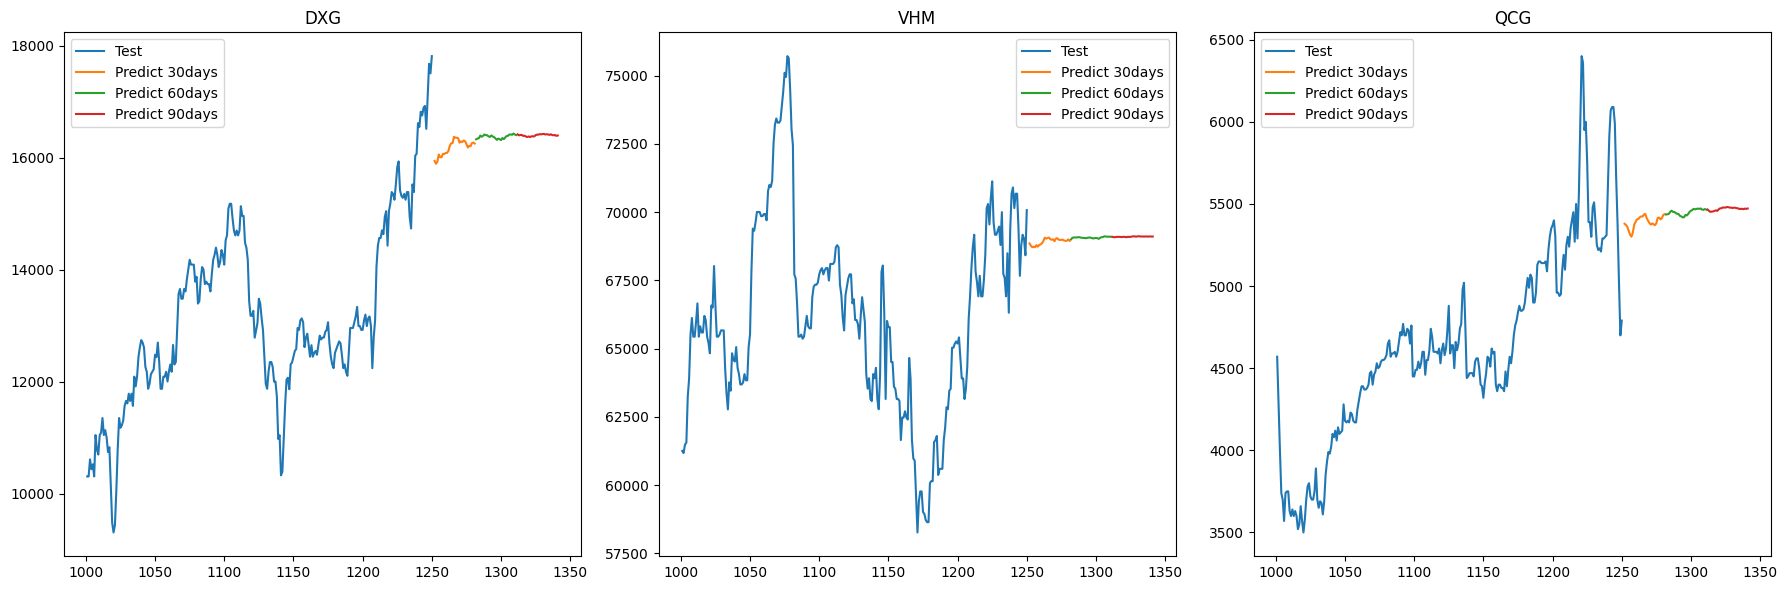

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()